# <div style="width:750px; background-color:#0d1b2a; margin: 50px; text-align:center; padding:10px; font: bold 5rem 'Fira Sans', sans-serif; border-radius:25px">Binary Classification with a Bank Churn Dataset</div>

<hr style="width:100%; color: #B31312; backgorund-color: #B31312; height:2px; margin-bottom:50px;">

<img src="https://storage.googleapis.com/cdn-website-bolddesk/2023/09/a18d8067-750_400@2x.png" style="border-radius: 10rem; padding-bottom: 10px; margin-top: 40px; margin-bottom: 35px" alt="churn-customer">

<div style="margin-top: 10px; font:caption; font-size: 18px">This notebook looks into using various Python based machine learning and data science libaries in an attempt to build machine learning model capable of predicting a customers continues their account or close it. We're going to take the following approach:
    <ol>
        <li>Problem definition</li>
        <li>Data</li>
        <li>Evaluation</li>
        <li>Features</li>
        <li>Modeling</li>
        <li>Experimentation</li>
    </ol><br>
    <h2>1. Problem Definition</h2>
        <p style="margin-left:40px">In statement,<br> Given many features of Bank Churn Dataset can we predict their account (continue/close) ? </p>
    <h2>2. Data</h2>
    <p style="margin-left:40px; margin-bottom:25px;">The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. <br></p>
    <a href="https://www.kaggle.com/competitions/playground-series-s4e1/data" style="margin-left:35%; margin-bottom:25px;">Dataset download here</a>
    <h2>3. Evaluation</h2>
     <p style="margin-left:40px; margin-bottom:25px;">Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.<p>
    <h2>4. Features</h2>
    <ul style="margin-left:40px; margin-bottom:25px;">
        <li>Customer ID: A unique identifier for each customer</li>
        <li>Surname: The customer's surname or last name</li>
        <li>Credit Score: A numerical value representing the customer's credit score</li>
        <li>Geography: The country where the customer resides (France, Spain or Germany)</li>
        <li>Gender: The customer's gender (Male or Female)</li>
        <li>Age: The customer's age.</li>
        <li>Tenure: The number of years the customer has been with the bank</li>
        <li>Balance: The customer's account balance</li>
        <li>NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit
            card)</li>
        <li>HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)</li>
        <li>IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)</li>
        <li>EstimatedSalary: The estimated salary of the customer</li>
        <li>Exited: Whether the customer has churned (1 = yes, 0 = no)</li>
    </ul><br>
</div>

# <div style="width:500px; background-color:#0d1b2a; margin-left: 150px; text-align:center; padding:10px; font: bold 5rem 'Fira Sans', sans-serif; border-radius:25px">Preparing Tools and Exploring Dataset</div>


In [1]:
# Import tools for EDA's
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_theme(style='darkgrid')

# import Zipfile
import zipfile

# ISO Countries
from iso3166 import countries

In [2]:
with zipfile.ZipFile('playground-series-s4e1.zip', 'r') as f:
    f.printdir()
    with f.open("train.csv") as train:
        df_train = pd.read_csv(train)
    with f.open("test.csv") as test:
        df_test = pd.read_csv(test)
    with f.open('sample_submission.csv') as submission:
        df_submission = pd.read_csv(submission)

File Name                                             Modified             Size
sample_submission.csv                          2023-12-31 21:34:52      1210263
test.csv                                       2023-12-31 21:34:52      8086863
train.csv                                      2023-12-31 21:34:52     12350130


In [3]:
df_train

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited  
0             181449.97       0  
1              49503.50       0  
2             184866.69       0  
3              84560.88       0  
4              15068.83       0  
...                 ...     ...  
165029        131834.75       0  
165030        131834.45       0  
165031        127429.56       0  
165032         71173.03       0  
165033         61581.79       1  

[165034 rows x 14 columns]

In [4]:
df_submission

id  Exited
0       165034     0.5
1       165035     0.5
2       165036     0.5
3       165037     0.5
4       165038     0.5
...        ...     ...
110018  275052     0.5
110019  275053     0.5
110020  275054     0.5
110021  275055     0.5
110022  275056     0.5

[110023 rows x 2 columns]

In [5]:
# Function to analyzed dataframe
def analyzed_dataframe(df):
    """
    Analyzed a pandas dataframe and provide summary of its characteristic.
    
    Parameters:
    df (pandas.Dataframe) : The input dataframe to analyzed
    
    return None
    """
    print("Data Information : ")
    print("-----------------------------")
    display(df.info())
    print("\n")
    
    print("Dataframe values : ")
    print("-----------------------------")
    display(df.head().T)
    print('\n')
    
    print("Dataframe descriptions : ")
    print("-----------------------------")
    display(df.describe().T)
    print('\n')
    
    print("Numbers of NaN Values : ")
    print("-----------------------------")
    display(df.isnull().sum())
    print('\n')
    
    print("Numbers of Duplicated values : ")
    print('-------------------------------')
    display(df.duplicated().sum())
    print('\n')
    
    print('Dataframe Shape : ')
    print("-------------------")
    display(f"Rows:{df.shape[0]}, Columns:{df.shape[1]}")

In [6]:
analyzed_dataframe(df_train)

Data Information : 
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


None



Dataframe values : 
-----------------------------


0              1          2          3  \
id                            0              1          2          3   
CustomerId             15674932       15749177   15694510   15741417   
Surname          Okwudilichukwu  Okwudiliolisa      Hsueh        Kao   
CreditScore                 668            627        678        581   
Geography                France         France     France     France   
Gender                     Male           Male       Male       Male   
Age                        33.0           33.0       40.0       34.0   
Tenure                        3              1         10          2   
Balance                     0.0            0.0        0.0  148882.54   
NumOfProducts                 2              2          2          1   
HasCrCard                   1.0            1.0        1.0        1.0   
IsActiveMember              0.0            1.0        0.0        1.0   
EstimatedSalary       181449.97        49503.5  184866.69   84560.88   
Exited                        0              0          0          0   

                         4  
id                       4  
CustomerId        15766172  
Surname          Chiemenam  
CreditScore            716  
Geography            Spain  
Gender                Male  
Age                   33.0  
Tenure                   5  
Balance                0.0  
NumOfProducts            2  
HasCrCard              1.0  
IsActiveMember         1.0  
EstimatedSalary   15068.83  
Exited                   0



Dataframe descriptions : 
-----------------------------


count          mean           std          min  \
id               165034.0  8.251650e+04  47641.356500         0.00   
CustomerId       165034.0  1.569201e+07  71397.816791  15565701.00   
CreditScore      165034.0  6.564544e+02     80.103340       350.00   
Age              165034.0  3.812589e+01      8.867205        18.00   
Tenure           165034.0  5.020353e+00      2.806159         0.00   
Balance          165034.0  5.547809e+04  62817.663278         0.00   
NumOfProducts    165034.0  1.554455e+00      0.547154         1.00   
HasCrCard        165034.0  7.539537e-01      0.430707         0.00   
IsActiveMember   165034.0  4.977702e-01      0.499997         0.00   
EstimatedSalary  165034.0  1.125748e+05  50292.865585        11.58   
Exited           165034.0  2.115988e-01      0.408443         0.00   

                         25%         50%           75%          max  
id                  41258.25     82516.5  1.237748e+05    165033.00  
CustomerId       15633141.00  15690169.0  1.575682e+07  15815690.00  
CreditScore           597.00       659.0  7.100000e+02       850.00  
Age                    32.00        37.0  4.200000e+01        92.00  
Tenure                  3.00         5.0  7.000000e+00        10.00  
Balance                 0.00         0.0  1.199395e+05    250898.09  
NumOfProducts           1.00         2.0  2.000000e+00         4.00  
HasCrCard               1.00         1.0  1.000000e+00         1.00  
IsActiveMember          0.00         0.0  1.000000e+00         1.00  
EstimatedSalary     74637.57    117948.0  1.551525e+05    199992.48  
Exited                  0.00         0.0  0.000000e+00         1.00



Numbers of NaN Values : 
-----------------------------


id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64



Numbers of Duplicated values : 
-------------------------------


0



Dataframe Shape : 
-------------------


'Rows:165034, Columns:14'

In [7]:
# Checking for unique values in each columns
def check_uniques_value(df):
    """
    Explore unique values of each columns and provide their characterictis
    
    Parameters :
    df (pandas.Dataframe) : The input Dataframe to analyzed
    
    Returns
    None
    
    """
    
    for col in df.columns:
        print(f"Columns : {col}, '-->', Length : {len(df[col].unique())}, '-->', Unique Values : {df[col].unique()}")

In [8]:
check_uniques_value(df_train)

Columns : id, '-->', Length : 165034, '-->', Unique Values : [     0      1      2 ... 165031 165032 165033]
Columns : CustomerId, '-->', Length : 23221, '-->', Unique Values : [15674932 15749177 15694510 ... 15673571 15692656 15815050]
Columns : Surname, '-->', Length : 2797, '-->', Unique Values : ['Okwudilichukwu' 'Okwudiliolisa' 'Hsueh' ... 'Aliyev' 'McMinn' 'Elkins']
Columns : CreditScore, '-->', Length : 457, '-->', Unique Values : [668 627 678 581 716 588 593 676 583 599 687 759 681 703 549 602 636 645
 559 773 554 553 714 616 586 785 834 632 746 797 753 749 413 611 752 551
 747 683 684 696 591 488 685 579 607 742 677 461 634 647 577 809 686 633
 494 699 663 756 648 563 682 620 721 652 535 584 701 640 711 707 631 637
 622 775 817 592 743 726 431 571 659 639 618 722 712 672 804 730 506 569
 558 507 594 796 615 619 471 434 706 758 762 635 630 709 661 644 731 748
 613 727 649 835 587 765 667 479 850 674 715 655 723 590 539 788 359 660
 517 740 694 578 610 718 705 542 624 601 625 59

# <div style="width:500px; background-color:#0d1b2a; margin-left: 150px; text-align:center; padding:10px; font: bold 5rem 'Fira Sans', sans-serif; border-radius:25px">Analysis of Variance</div>

<p>The purpose of using anovs is to compare the difference between the means of two or more groups of data, and measure the degree to which levels or groups of an independent variable differ from each other. The purpose of an ANOVA test is to determine if there is a significant difference between the groups being studied by using variance. This is done using the 'f-test' in statistics to determine if the variables are significant.</p>



## $ F = \frac{MST}{MSE} $

where : <br>
F is ANOVA.<br>
MST is the mean of the sum of the squares due to treatment.<br>
MSE is the mean of the sum of the squares due to error.<br>
Soruce: <a href="https://study.com/academy/lesson/analysis-of-variance-anova-examples-definition-application.html"> ANOVA Test Definition, Purpose & Examples</a>


In [9]:
# Import Libaries
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [10]:
def perform_one_way_anova(df, var_1, var_2, target='Exited'):
    """
    Compare the difference between the means of two or more groups
    
    Parameters:
    ------------------------
    df : Input dataframe to analyzed
    var_1 : is the variable that is manipulated in an experiment
    var_2 : is the variable that is manipulated in an experiment
    target :  it is the variable being measured
    
    Returns
    Rejecting Null Hypotesis or Fail to reject null hypotesis
    """
    
    # Perform One-Way Anova
    statistic, p_value = f_oneway(df[target] ,df[var_1], df[var_2])
    
    print("Anova Statistic : ")
    print("<-------------------------------->")
    display(np.round(statistic, 2))
    print('\n')
    
    print('P-Value : ')
    print("<------------------------------->")
    display(np.round(p_value, 2))
    print("\n")
    
    # determine p-value
    alpha = 0.05
    if p_value < alpha:
        print("Reject null hypotesis")
        print("\n")
    else:
        print("Fail to reject null hypotesis")
        print("\n")

In [11]:
perform_one_way_anova(df=df_train, var_1='Age', var_2='CreditScore')

Anova Statistic : 
<-------------------------------->


10346445.74



P-Value : 
<------------------------------->


0.0



Reject null hypotesis




In [12]:
num_col = df_train.select_dtypes(include=np.number)
num_col

id  CustomerId  CreditScore   Age  Tenure    Balance  \
0            0    15674932          668  33.0       3       0.00   
1            1    15749177          627  33.0       1       0.00   
2            2    15694510          678  40.0      10       0.00   
3            3    15741417          581  34.0       2  148882.54   
4            4    15766172          716  33.0       5       0.00   
...        ...         ...          ...   ...     ...        ...   
165029  165029    15667085          667  33.0       2       0.00   
165030  165030    15665521          792  35.0       3       0.00   
165031  165031    15664752          565  31.0       5       0.00   
165032  165032    15689614          554  30.0       7  161533.00   
165033  165033    15732798          850  31.0       1       0.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                   2        1.0             0.0        181449.97       0  
1                   2        1.0             1.0         49503.50       0  
2                   2        1.0             0.0        184866.69       0  
3                   1        1.0             1.0         84560.88       0  
4                   2        1.0             1.0         15068.83       0  
...               ...        ...             ...              ...     ...  
165029              1        1.0             1.0        131834.75       0  
165030              1        0.0             0.0        131834.45       0  
165031              1        1.0             1.0        127429.56       0  
165032              1        0.0             1.0         71173.03       0  
165033              1        1.0             0.0         61581.79       1  

[165034 rows x 11 columns]

In [13]:
for i in num_col.iloc[:, 2:-1:1].columns:
    for j in num_col.iloc[:, 2:-1:1].columns:
        if i != j :
            print(f"Perform ANOVA of variabels {i} and variables {j} to Exited")
            print("\n")
            perform_one_way_anova(df=df_train, var_1=i, var_2=j)
        else:
            pass
    

Perform ANOVA of variabels CreditScore and variables Age to Exited


Anova Statistic : 
<-------------------------------->


10346445.74



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels CreditScore and variables Tenure to Exited


Anova Statistic : 
<-------------------------------->


10982133.15



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels CreditScore and variables Balance to Exited


Anova Statistic : 
<-------------------------------->


127216.21



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels CreditScore and variables NumOfProducts to Exited


Anova Statistic : 
<-------------------------------->


11053044.29



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels CreditScore and variables HasCrCard to Exited


Anova Statistic : 
<-------------------------------->


11066712.23



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels CreditScore and variables IsActiveMember to Exited


Anova Statistic : 
<-------------------------------->


11070919.3



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels CreditScore and variables EstimatedSalary to Exited


Anova Statistic : 
<-------------------------------->


822084.07



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Age and variables CreditScore to Exited


Anova Statistic : 
<-------------------------------->


10346445.74



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Age and variables Tenure to Exited


Anova Statistic : 
<-------------------------------->


2434125.93



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Age and variables Balance to Exited


Anova Statistic : 
<-------------------------------->


128633.12



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Age and variables NumOfProducts to Exited


Anova Statistic : 
<-------------------------------->


2896955.65



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Age and variables HasCrCard to Exited


Anova Statistic : 
<-------------------------------->


2961398.5



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Age and variables IsActiveMember to Exited


Anova Statistic : 
<-------------------------------->


2978818.82



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Age and variables EstimatedSalary to Exited


Anova Statistic : 
<-------------------------------->


826599.84



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Tenure and variables CreditScore to Exited


Anova Statistic : 
<-------------------------------->


10982133.15



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Tenure and variables Age to Exited


Anova Statistic : 
<-------------------------------->


2434125.93



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Tenure and variables Balance to Exited


Anova Statistic : 
<-------------------------------->


128709.87



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Tenure and variables NumOfProducts to Exited


Anova Statistic : 
<-------------------------------->


365455.38



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Tenure and variables HasCrCard to Exited


Anova Statistic : 
<-------------------------------->


417461.02



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Tenure and variables IsActiveMember to Exited


Anova Statistic : 
<-------------------------------->


434509.98



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Tenure and variables EstimatedSalary to Exited


Anova Statistic : 
<-------------------------------->


826842.94



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Balance and variables CreditScore to Exited


Anova Statistic : 
<-------------------------------->


127216.21



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Balance and variables Age to Exited


Anova Statistic : 
<-------------------------------->


128633.12



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Balance and variables Tenure to Exited


Anova Statistic : 
<-------------------------------->


128709.87



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Balance and variables NumOfProducts to Exited


Anova Statistic : 
<-------------------------------->


128717.91



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Balance and variables HasCrCard to Exited


Anova Statistic : 
<-------------------------------->


128719.77



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Balance and variables IsActiveMember to Exited


Anova Statistic : 
<-------------------------------->


128720.37



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels Balance and variables EstimatedSalary to Exited


Anova Statistic : 
<-------------------------------->


242257.29



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels NumOfProducts and variables CreditScore to Exited


Anova Statistic : 
<-------------------------------->


11053044.29



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels NumOfProducts and variables Age to Exited


Anova Statistic : 
<-------------------------------->


2896955.65



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels NumOfProducts and variables Tenure to Exited


Anova Statistic : 
<-------------------------------->


365455.38



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels NumOfProducts and variables Balance to Exited


Anova Statistic : 
<-------------------------------->


128717.91



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels NumOfProducts and variables HasCrCard to Exited


Anova Statistic : 
<-------------------------------->


346701.47



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels NumOfProducts and variables IsActiveMember to Exited


Anova Statistic : 
<-------------------------------->


345846.01



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels NumOfProducts and variables EstimatedSalary to Exited


Anova Statistic : 
<-------------------------------->


826868.4



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels HasCrCard and variables CreditScore to Exited


Anova Statistic : 
<-------------------------------->


11066712.23



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels HasCrCard and variables Age to Exited


Anova Statistic : 
<-------------------------------->


2961398.5



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels HasCrCard and variables Tenure to Exited


Anova Statistic : 
<-------------------------------->


417461.02



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels HasCrCard and variables Balance to Exited


Anova Statistic : 
<-------------------------------->


128719.77



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels HasCrCard and variables NumOfProducts to Exited


Anova Statistic : 
<-------------------------------->


346701.47



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels HasCrCard and variables IsActiveMember to Exited


Anova Statistic : 
<-------------------------------->


60507.47



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels HasCrCard and variables EstimatedSalary to Exited


Anova Statistic : 
<-------------------------------->


826874.28



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels IsActiveMember and variables CreditScore to Exited


Anova Statistic : 
<-------------------------------->


11070919.3



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels IsActiveMember and variables Age to Exited


Anova Statistic : 
<-------------------------------->


2978818.82



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels IsActiveMember and variables Tenure to Exited


Anova Statistic : 
<-------------------------------->


434509.98



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels IsActiveMember and variables Balance to Exited


Anova Statistic : 
<-------------------------------->


128720.37



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels IsActiveMember and variables NumOfProducts to Exited


Anova Statistic : 
<-------------------------------->


345846.01



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels IsActiveMember and variables HasCrCard to Exited


Anova Statistic : 
<-------------------------------->


60507.47



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels IsActiveMember and variables EstimatedSalary to Exited


Anova Statistic : 
<-------------------------------->


826876.16



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels EstimatedSalary and variables CreditScore to Exited


Anova Statistic : 
<-------------------------------->


822084.07



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels EstimatedSalary and variables Age to Exited


Anova Statistic : 
<-------------------------------->


826599.84



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels EstimatedSalary and variables Tenure to Exited


Anova Statistic : 
<-------------------------------->


826842.94



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels EstimatedSalary and variables Balance to Exited


Anova Statistic : 
<-------------------------------->


242257.29



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels EstimatedSalary and variables NumOfProducts to Exited


Anova Statistic : 
<-------------------------------->


826868.4



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels EstimatedSalary and variables HasCrCard to Exited


Anova Statistic : 
<-------------------------------->


826874.28



P-Value : 
<------------------------------->


0.0



Reject null hypotesis


Perform ANOVA of variabels EstimatedSalary and variables IsActiveMember to Exited


Anova Statistic : 
<-------------------------------->


826876.16



P-Value : 
<------------------------------->


0.0



Reject null hypotesis




In [14]:
turkey = pairwise_tukeyhsd(endog=df_train['Exited'],
                          groups=df_train['Gender'],
                          alpha=0.05)
print(turkey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
Female   Male  -0.1206  -0.0 -0.1246 -0.1167   True
---------------------------------------------------


In [15]:
turkey = pairwise_tukeyhsd(endog=df_train['Exited'],
                          groups=df_train['Geography'],
                          alpha=0.05)
print(turkey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
 France Germany   0.2137   -0.0  0.2078  0.2196   True
 France   Spain   0.0069 0.0145  0.0011  0.0127   True
Germany   Spain  -0.2068   -0.0 -0.2138 -0.1997   True
------------------------------------------------------


<p>Summary of Statistic
    <ol>
        <li>We're succsesfull to reject null hypotesis for all numerical variable</li>
        <li>We're fail to reject null hypotesis for columns Geography and Gender</li>
        <li></li>
    </ol>
</p>

# <div style="width:500px; background-color:#0d1b2a; margin-left: 150px; text-align:center; padding:10px; font: bold 5rem 'Fira Sans', sans-serif; border-radius:25px">Vizualization</div>


In [16]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center', fontdict={'family':'Tahoma', 'weight':'normal', 'size':22})
        
def different_colors(col_count, f_colors, s_colors):
    """
    Given different color to gain insight for the visualization.
    
    Parameters :
    ----------------------------------------------------------------
    col_count : The total count of each values in the column
    f_color : first color, better used the bright color
    s_color : second color
    
    Return
    
    Selected new colors
    """
    
    new_colors = []
    compare_value = 0
    for val in col_count.values:
        if val > compare_value:
            compare_value = val
            new_colors.append(f_colors)
        else :
            new_colors.append(s_colors)
        
    return new_colors


def bar_plot_for_dataset(df, col, col_title, x_name, y_name, colors, hatch='/'):
    """
    ---This function is to visualize data to bar plot---
    parameteres:
    data :  The input Dataframe to analyzed
    col 
    \n
    """
    cols_sum = df[col].value_counts()
    labels = list(cols_sum.index)
    plt.figure(figsize=(10,8))
    ax = plt.subplot()
    make_colors = different_colors(col_count=cols_sum, f_colors=colors[0], s_colors=colors[1])
    plt.bar(x=cols_sum.index, height=cols_sum.values, data=cols_sum, color=make_colors, hatch='/')
    add_labels(cols_sum.index, cols_sum.values)
    plt.title(col_title, fontdict={'family': 'Arial','weight': 'normal','size': 30,})
    plt.xlabel(x_name, fontdict={'family': 'Arial','weight': 'normal','size': 14,})
    plt.ylabel(y_name, fontdict={'family': 'Arial','weight': 'normal','size': 14,})
    plt.xticks(rotation=30, ha='right')
    plt.show()

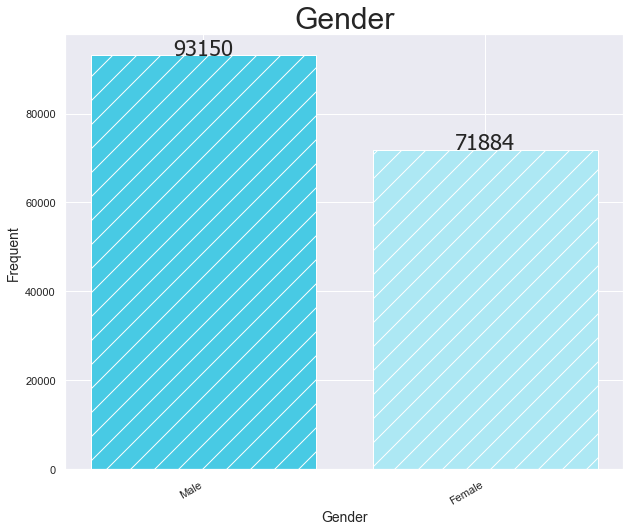

In [17]:
colors = ["#48cae4", "#ade8f4"]
bar_plot_for_dataset(df_train, col="Gender", col_title="Gender", x_name='Gender', 
                     y_name='Frequent', colors=colors,)

In [18]:
# Selecting categorical object from dataframe
cols_object = []
for col in df_train.columns:
    if len(df_train[col].unique()) <= 6:
        cols_object.append(col)

cols_object

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

<Figure size 1080x720 with 0 Axes>

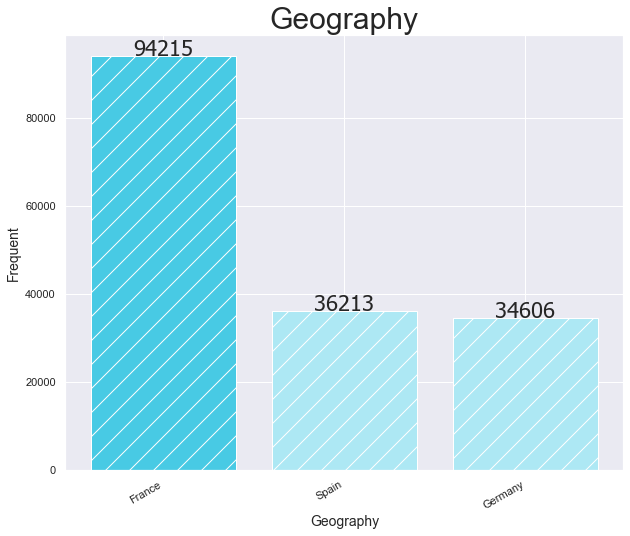

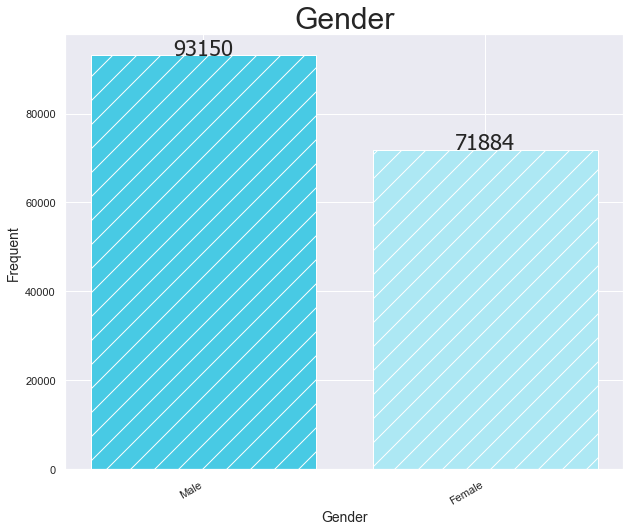

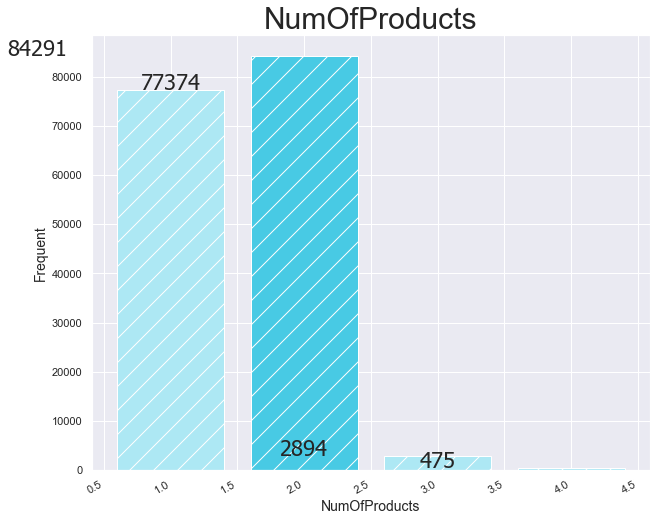

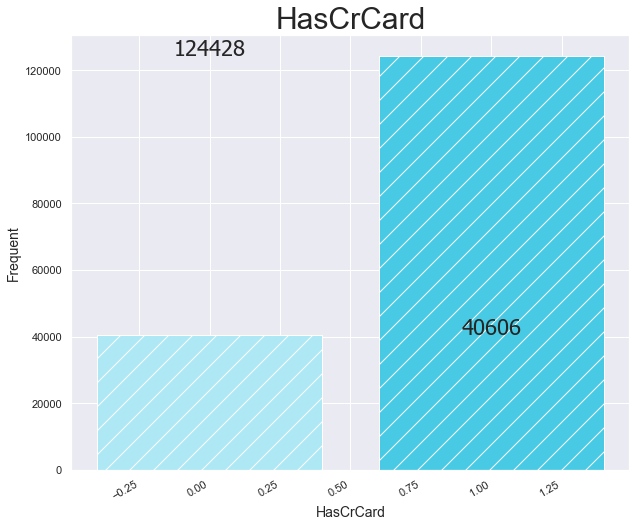

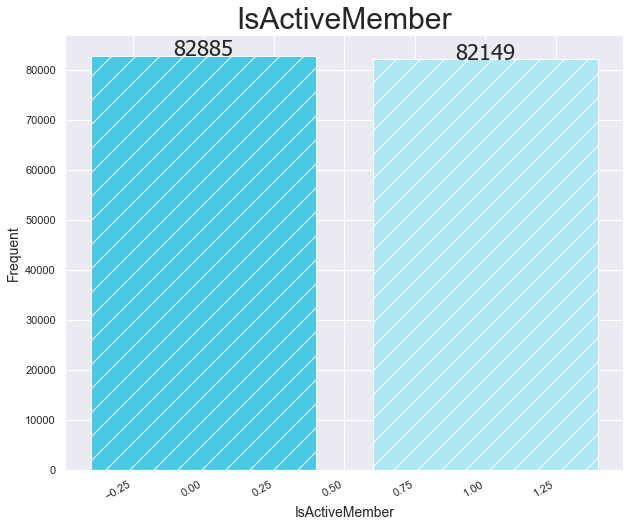

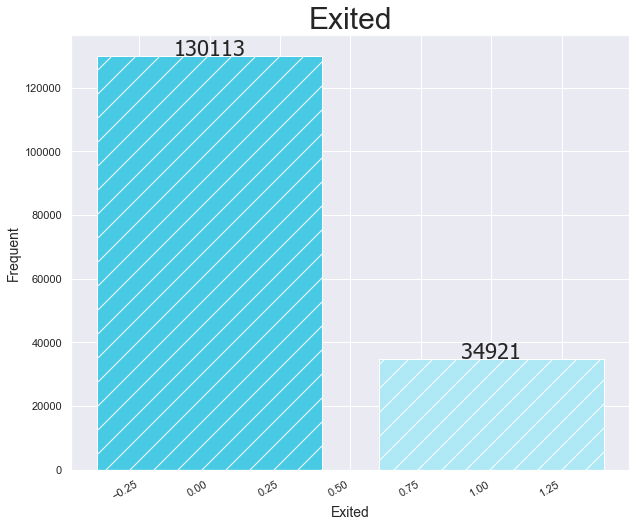

In [19]:
# Looping for object columns and create bar plot
# col_df = df_train[cols_object]

fig = plt.figure(figsize=(15,10))

for col in cols_object:
    bar_plot_for_dataset(df=df_train, col=col, col_title=col, x_name=col, y_name='Frequent',
                        colors=colors)

In [20]:
df_exited_vs_gender = df_train.groupby(['Gender', 'Exited'], as_index=False).agg({'HasCrCard':pd.Series.count})
df_exited_vs_gender

Gender  Exited  HasCrCard
0  Female       0      51779
1  Female       1      20105
2    Male       0      78334
3    Male       1      14816

In [21]:
g_bar = px.histogram(df_exited_vs_gender,
               x='Gender',
               y='HasCrCard',
               title='Male vs Female Has Credit Card by Exited Churn',
               color='Exited',
               barmode='group')
 
g_bar.update_layout(xaxis_title='Exited Churn',
                    yaxis_title='Number of Gender',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
g_bar.update_traces(textposition="outside")
 
g_bar.show()

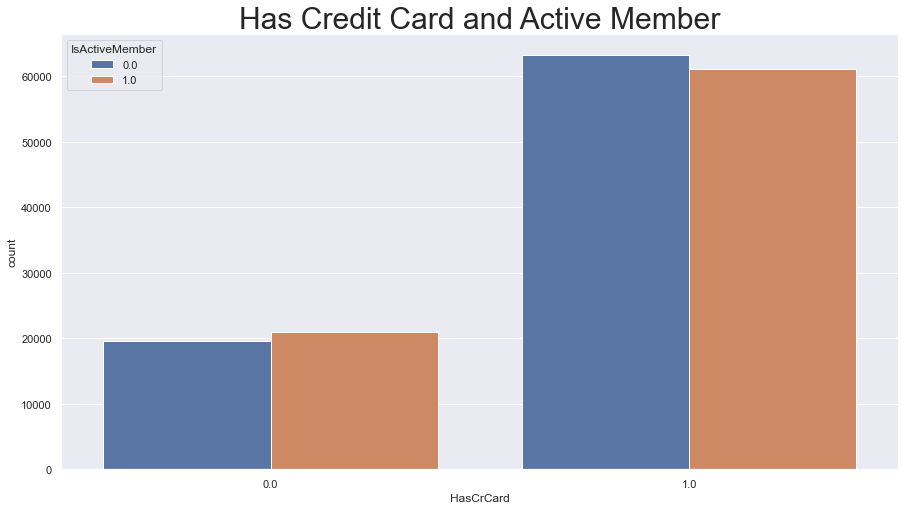

In [22]:
plt.figure(figsize=(15,8))
plt.title("Has Credit Card and Active Member", fontdict={'family': 'Arial','weight': 'normal','size': 30,})
sns.countplot(df_train, x='HasCrCard', hue='IsActiveMember')
plt.show();

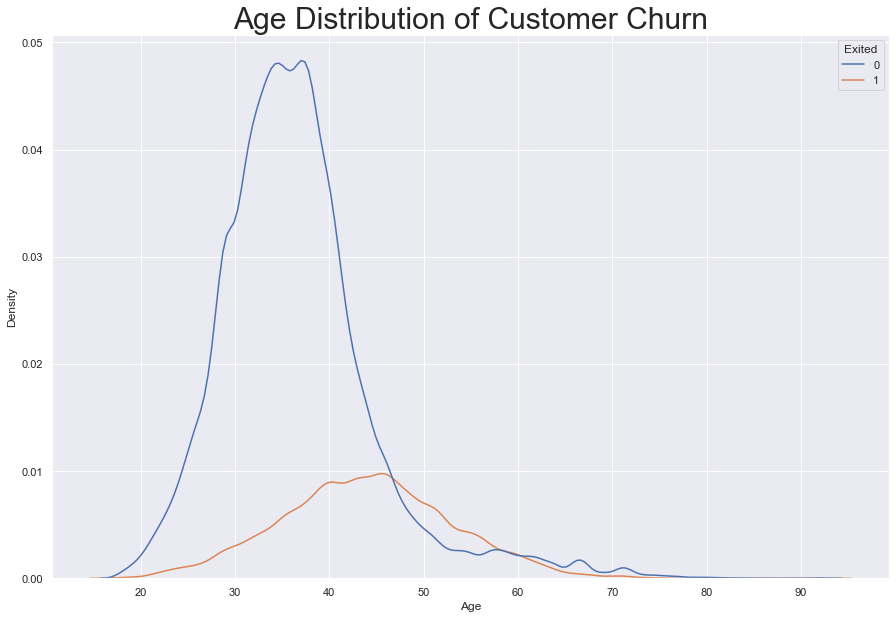

In [23]:
plt.figure(figsize=(15,10))
sns.kdeplot(df_train, x='Age', hue='Exited')
plt.title("Age Distribution of Customer Churn", fontdict={'family': 'Arial','weight': 'normal','size': 30,})
plt.show()

'Total customer with Balance $0 is 54.32 %'

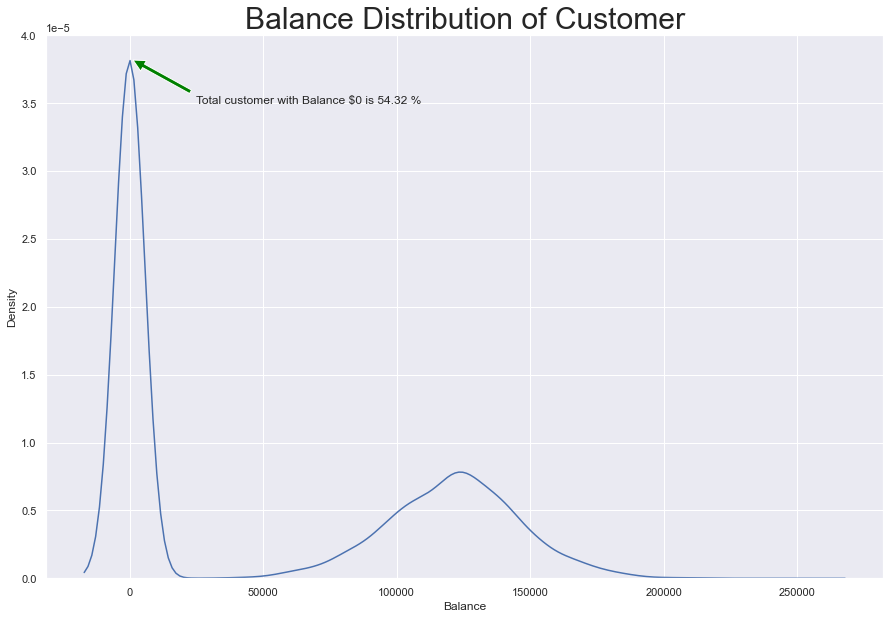

In [24]:
plt.figure(figsize=(15,10))
display(f"Total customer with Balance $0 is {np.round((df_train[df_train['Balance']==0].shape[0]/df_train.shape[0])*100,2)} %")
sns.kdeplot(df_train, x='Balance')
plt.title("Balance Distribution of Customer", fontdict={'family': 'Arial','weight': 'normal','size': 30,})
plt.annotate(text="Total customer with Balance $0 is 54.32 %",xy=(0,0.0000383), 
             arrowprops = dict(facecolor ='green', shrink = 0.05), xytext=(25000,0.000035)) 
plt.show()

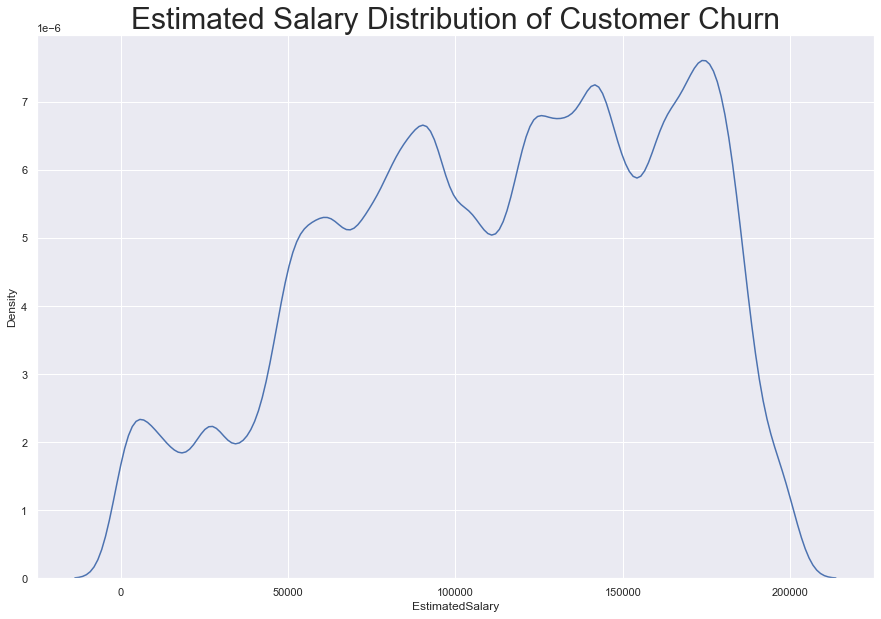

In [25]:
plt.figure(figsize=(15,10))
sns.kdeplot(df_train, x='EstimatedSalary')
plt.title("Estimated Salary Distribution of Customer Churn", fontdict={'family': 'Arial','weight': 'normal','size': 30,})
plt.show()

In [26]:
iso_code = []
for country in df_train.Geography:
    cc = countries.get(country).alpha3
    iso_code.append(cc)

In [27]:
df_train['ISO_Code'] = iso_code

In [28]:

yes_churn=df_train[df_train['Exited']==1].groupby(['ISO_Code'], as_index=False).agg({
    "Exited":pd.Series.count})
yes_churn.rename(columns={'Exited':'Left Bank'}, inplace=True)
yes_churn

ISO_Code  Left Bank
0      DEU      13114
1      ESP       6235
2      FRA      15572

In [29]:
fig = px.choropleth(yes_churn, locations="ISO_Code",
                    color="Left Bank", # lifeExp is a column of gapminder
                    hover_name="Left Bank", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [30]:
fig = px.bar(data_frame=yes_churn, x='ISO_Code', y='Left Bank', 
             title="Bank Customer who left the bank by each Country ")
# fig.update_layout(tit)
fig.show()

In [31]:
num_col = [col for col in df_train.columns if col not in cols_object]
num_col = num_col[3:-1]
num_col

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

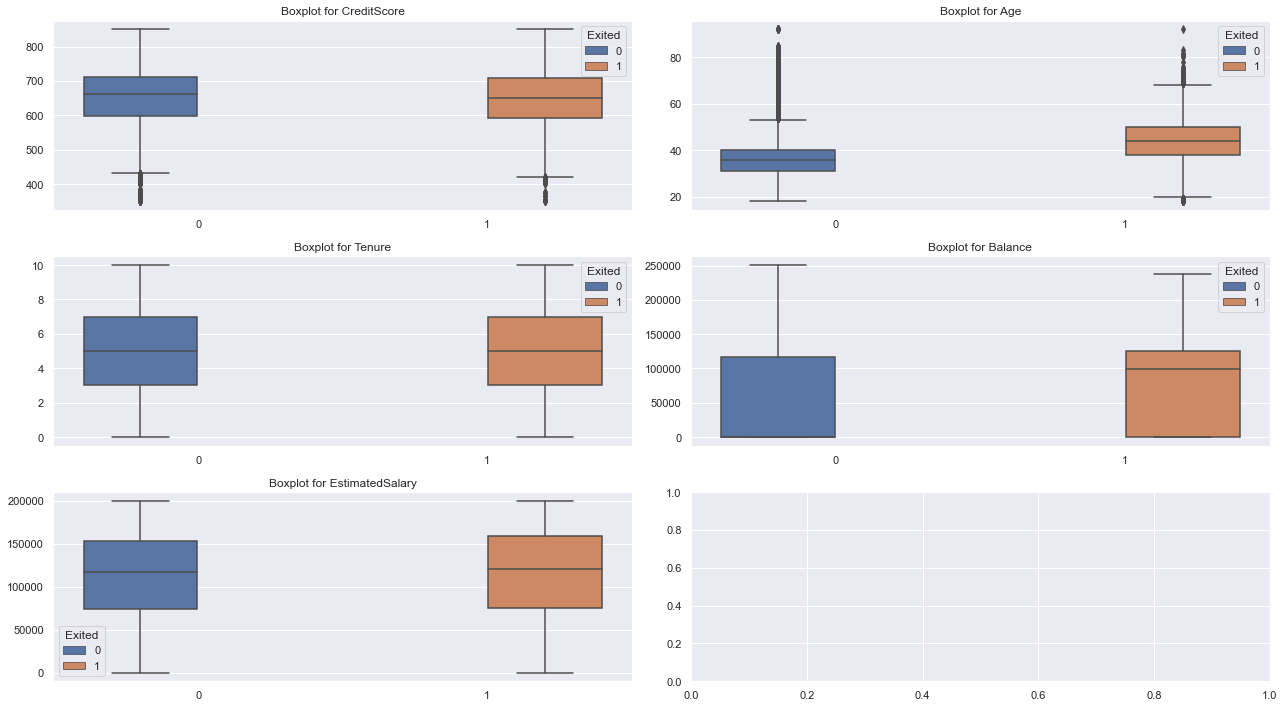

In [32]:
row = len(num_col)
col = 2
counter = 1

fig, axes = plt.subplots(3,2, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num_col):
    
    sns.boxplot(data=df_train,x="Exited", y=col, hue='Exited',ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

In [33]:
def create_numerical_boxplot(df, num_col, cat_col):
    """
    Create boxplot for numerical list on categorical variable
    
    Parameters:
    ------------------------
    df : Input dataframe to analyzed
    num_col : List of numerical columns
    cat_col : Categorical columns
    
    Returns
    Boxplot Figure
    """
    row = len(num_col)
    col = 2
    counter = 1

    fig, axes = plt.subplots(3,2, figsize=(18, 10))
    axes = axes.flatten()
    
    plt.suptitle(f"Boxplot for {cat_col} and all numerical columns",
                 fontdict={'family': 'Arial','weight': 'normal','size': 30,})

    for i, col in enumerate(num_col):

        sns.boxplot(df,x=cat_col, y=col, hue='Exited',ax=axes[i])
        axes[i].set_title(f"Boxplot for {col} and {cat_col}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    plt.tight_layout()
    plt.show()
    

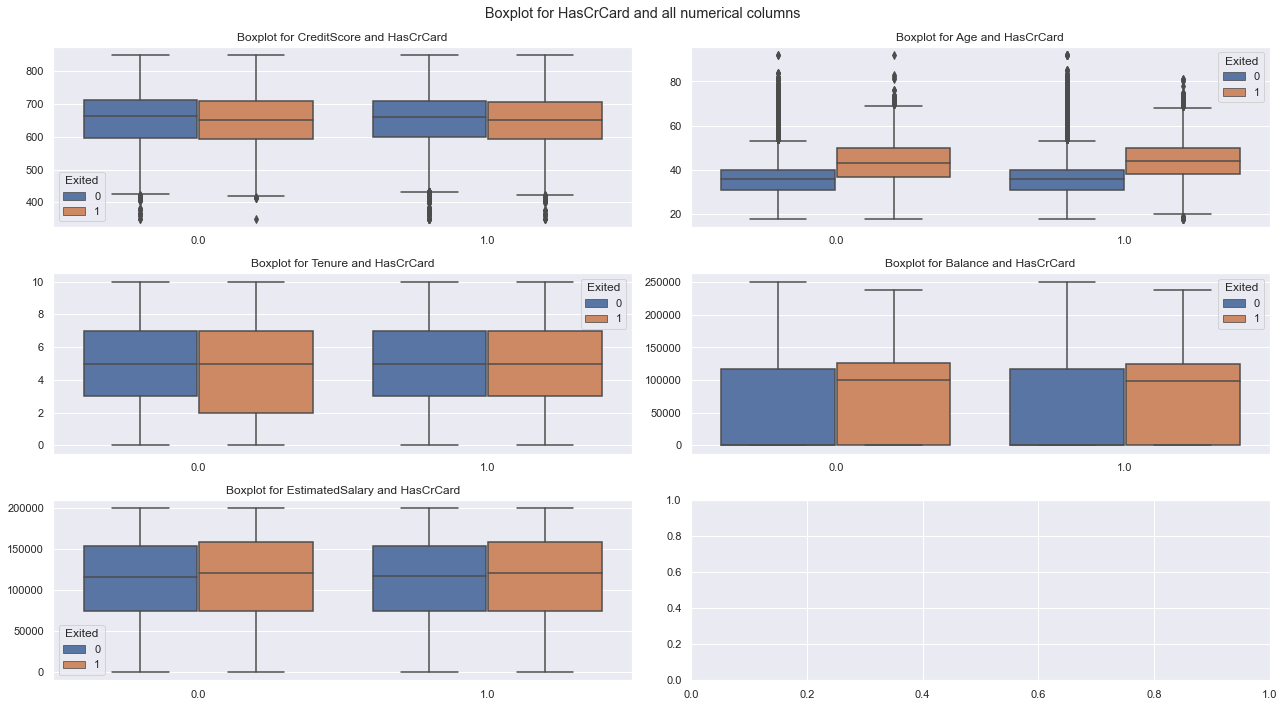

In [34]:
create_numerical_boxplot(df=df_train, num_col=num_col, cat_col='HasCrCard')

In [35]:
cols_object

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

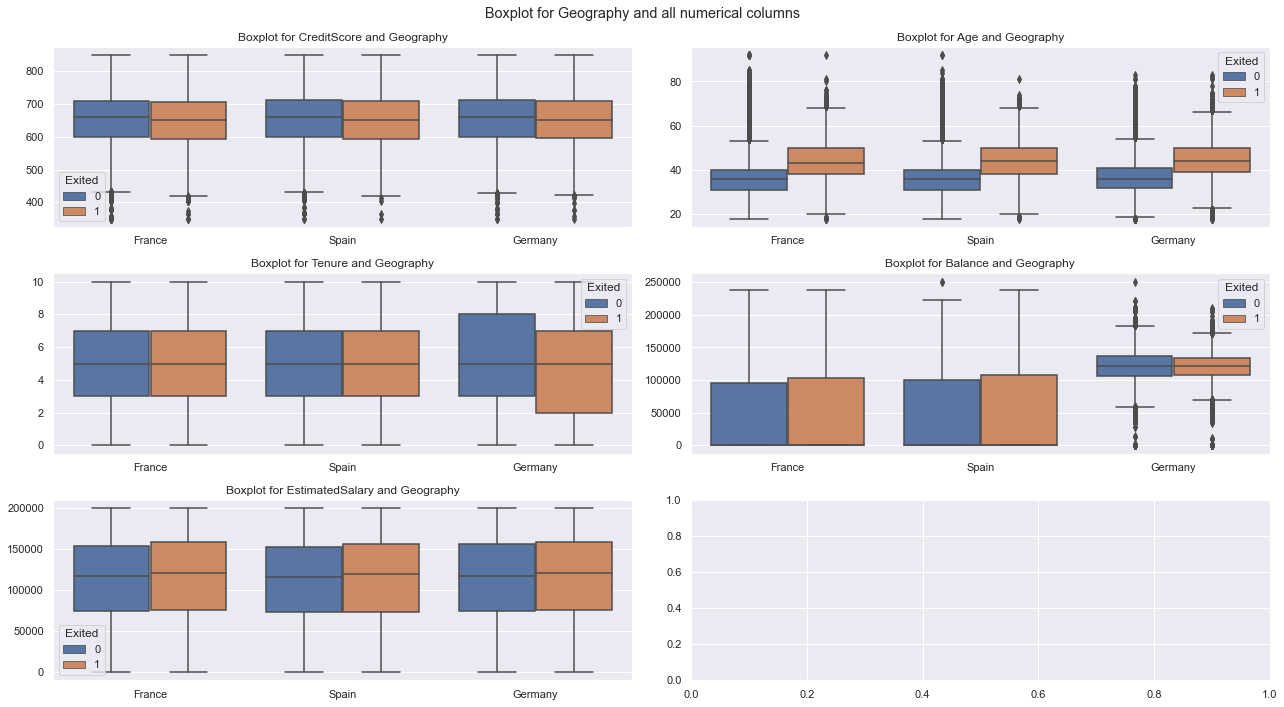

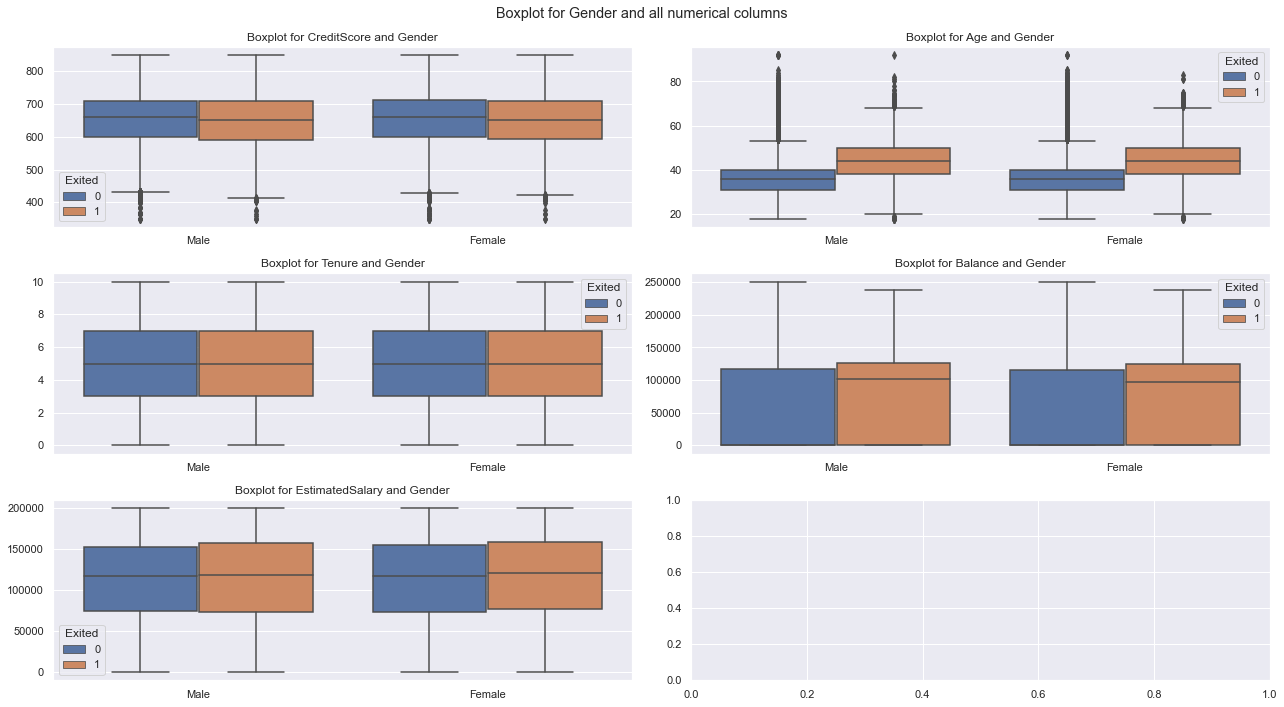

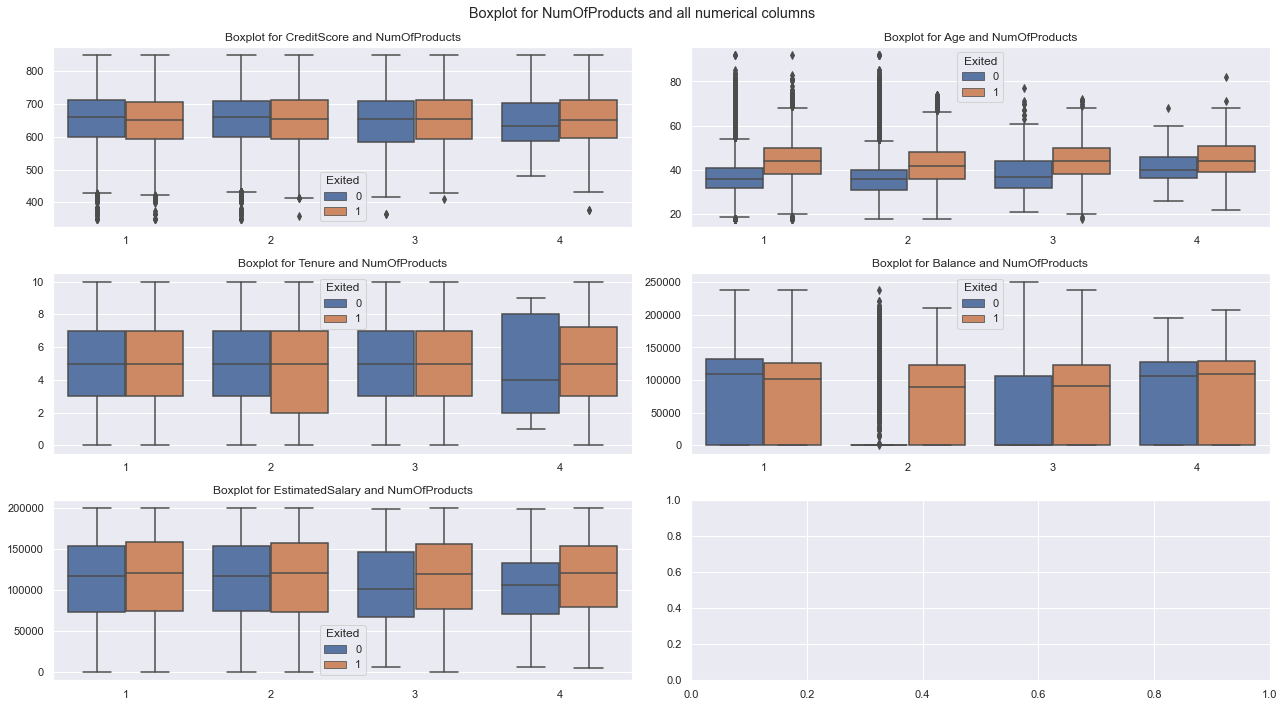

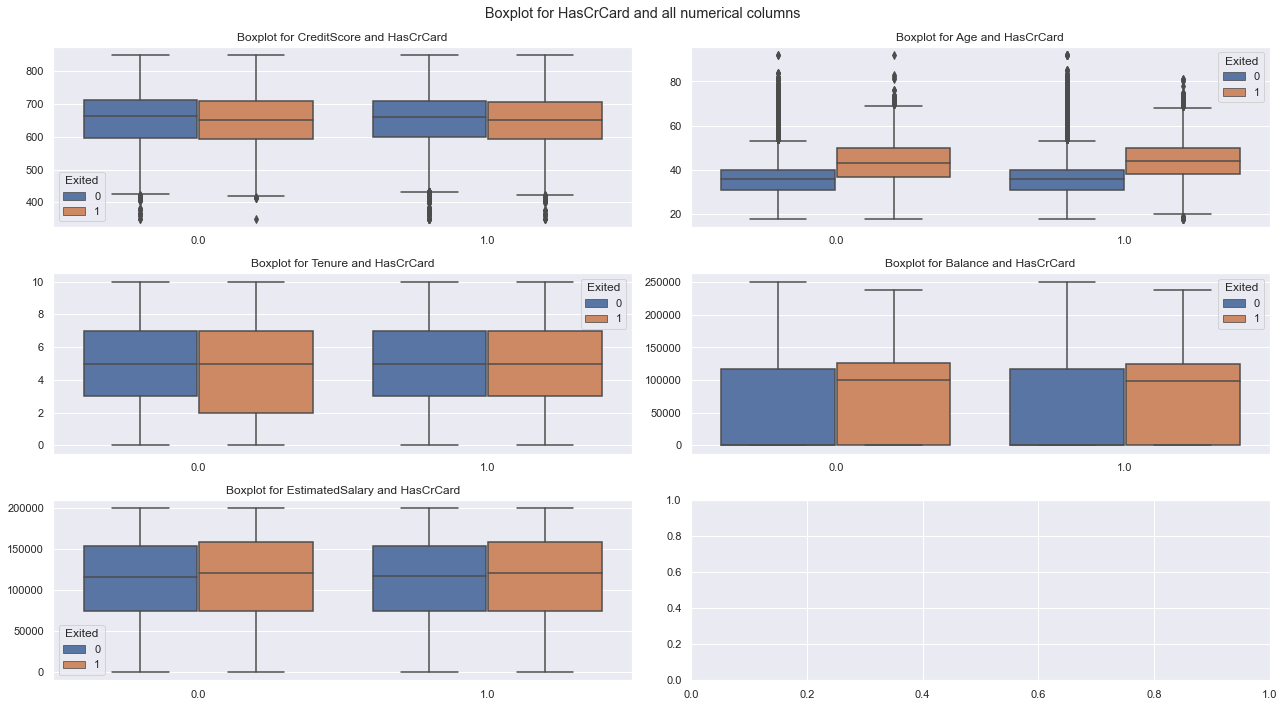

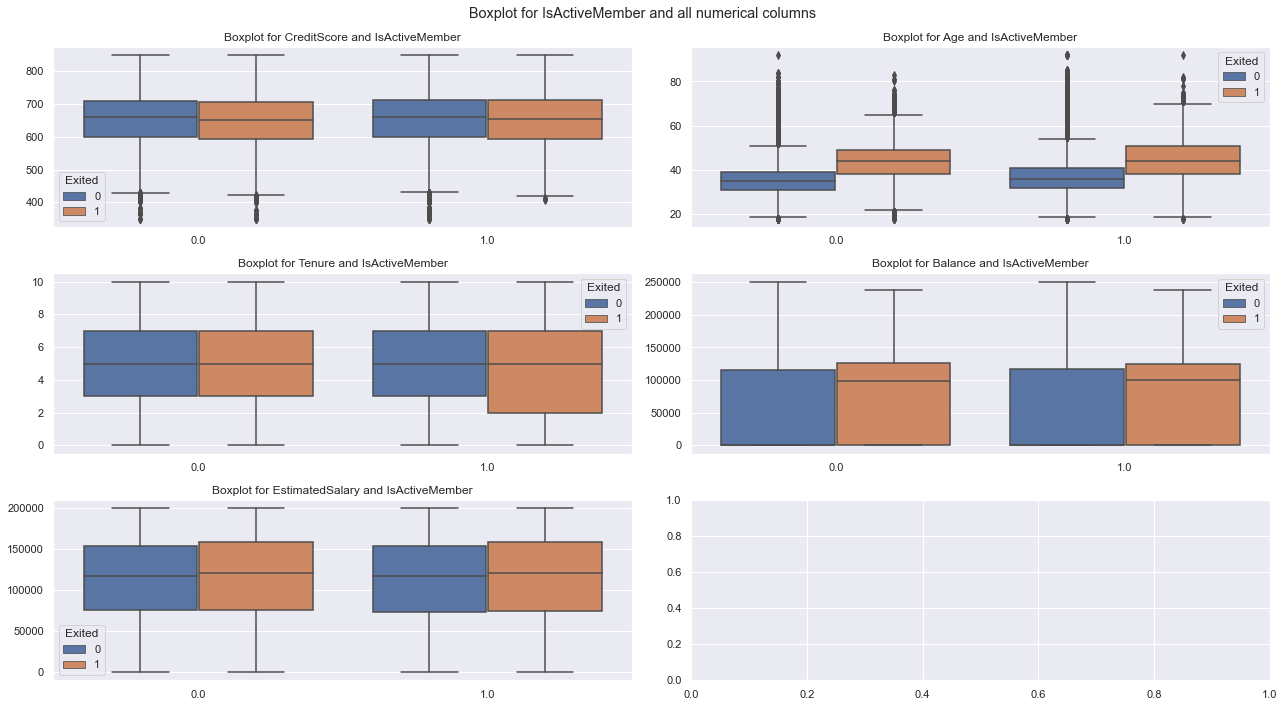

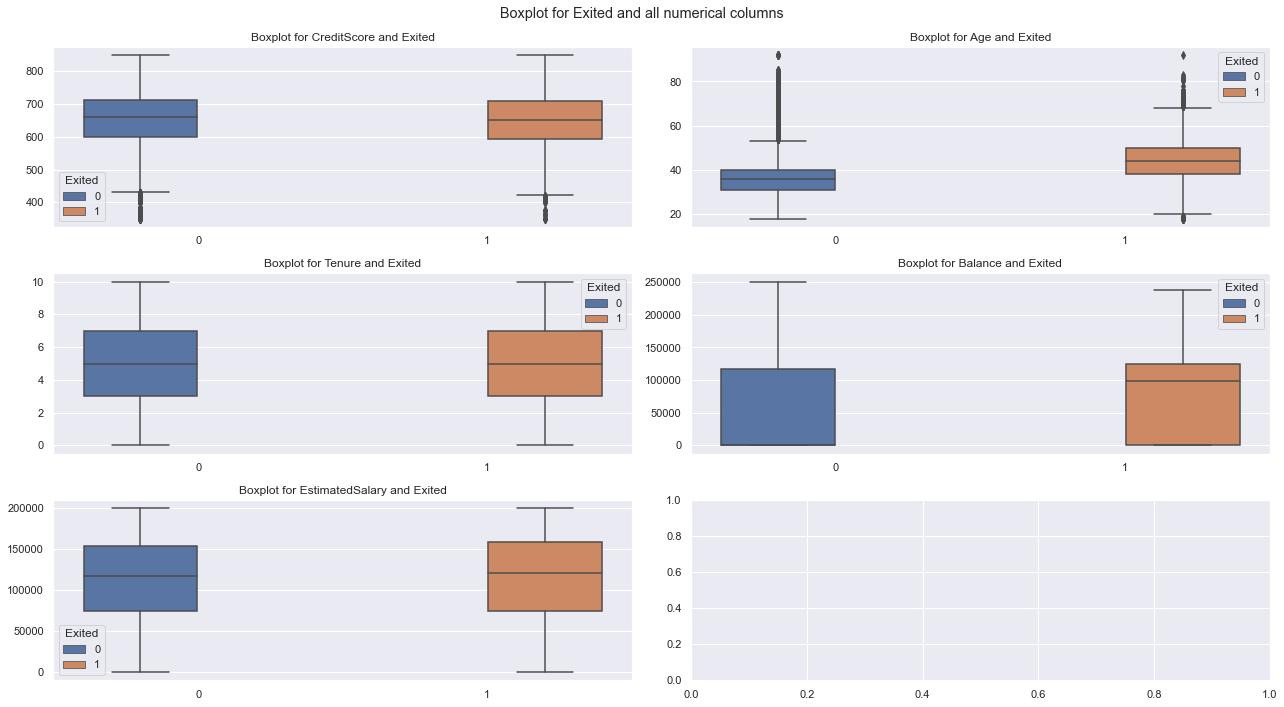

In [36]:
for col in cols_object:
    create_numerical_boxplot(df_train, num_col, col)

In [37]:
df_train.Tenure.value_counts()

2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: Tenure, dtype: int64

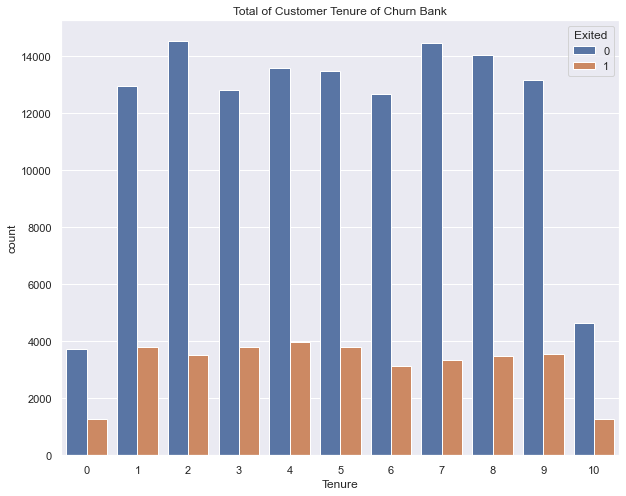

In [38]:
plt.figure(figsize=(10,8))
plt.title("Total of Customer Tenure of Churn Bank")
sns.countplot(df_train, x='Tenure', hue='Exited')
plt.show();

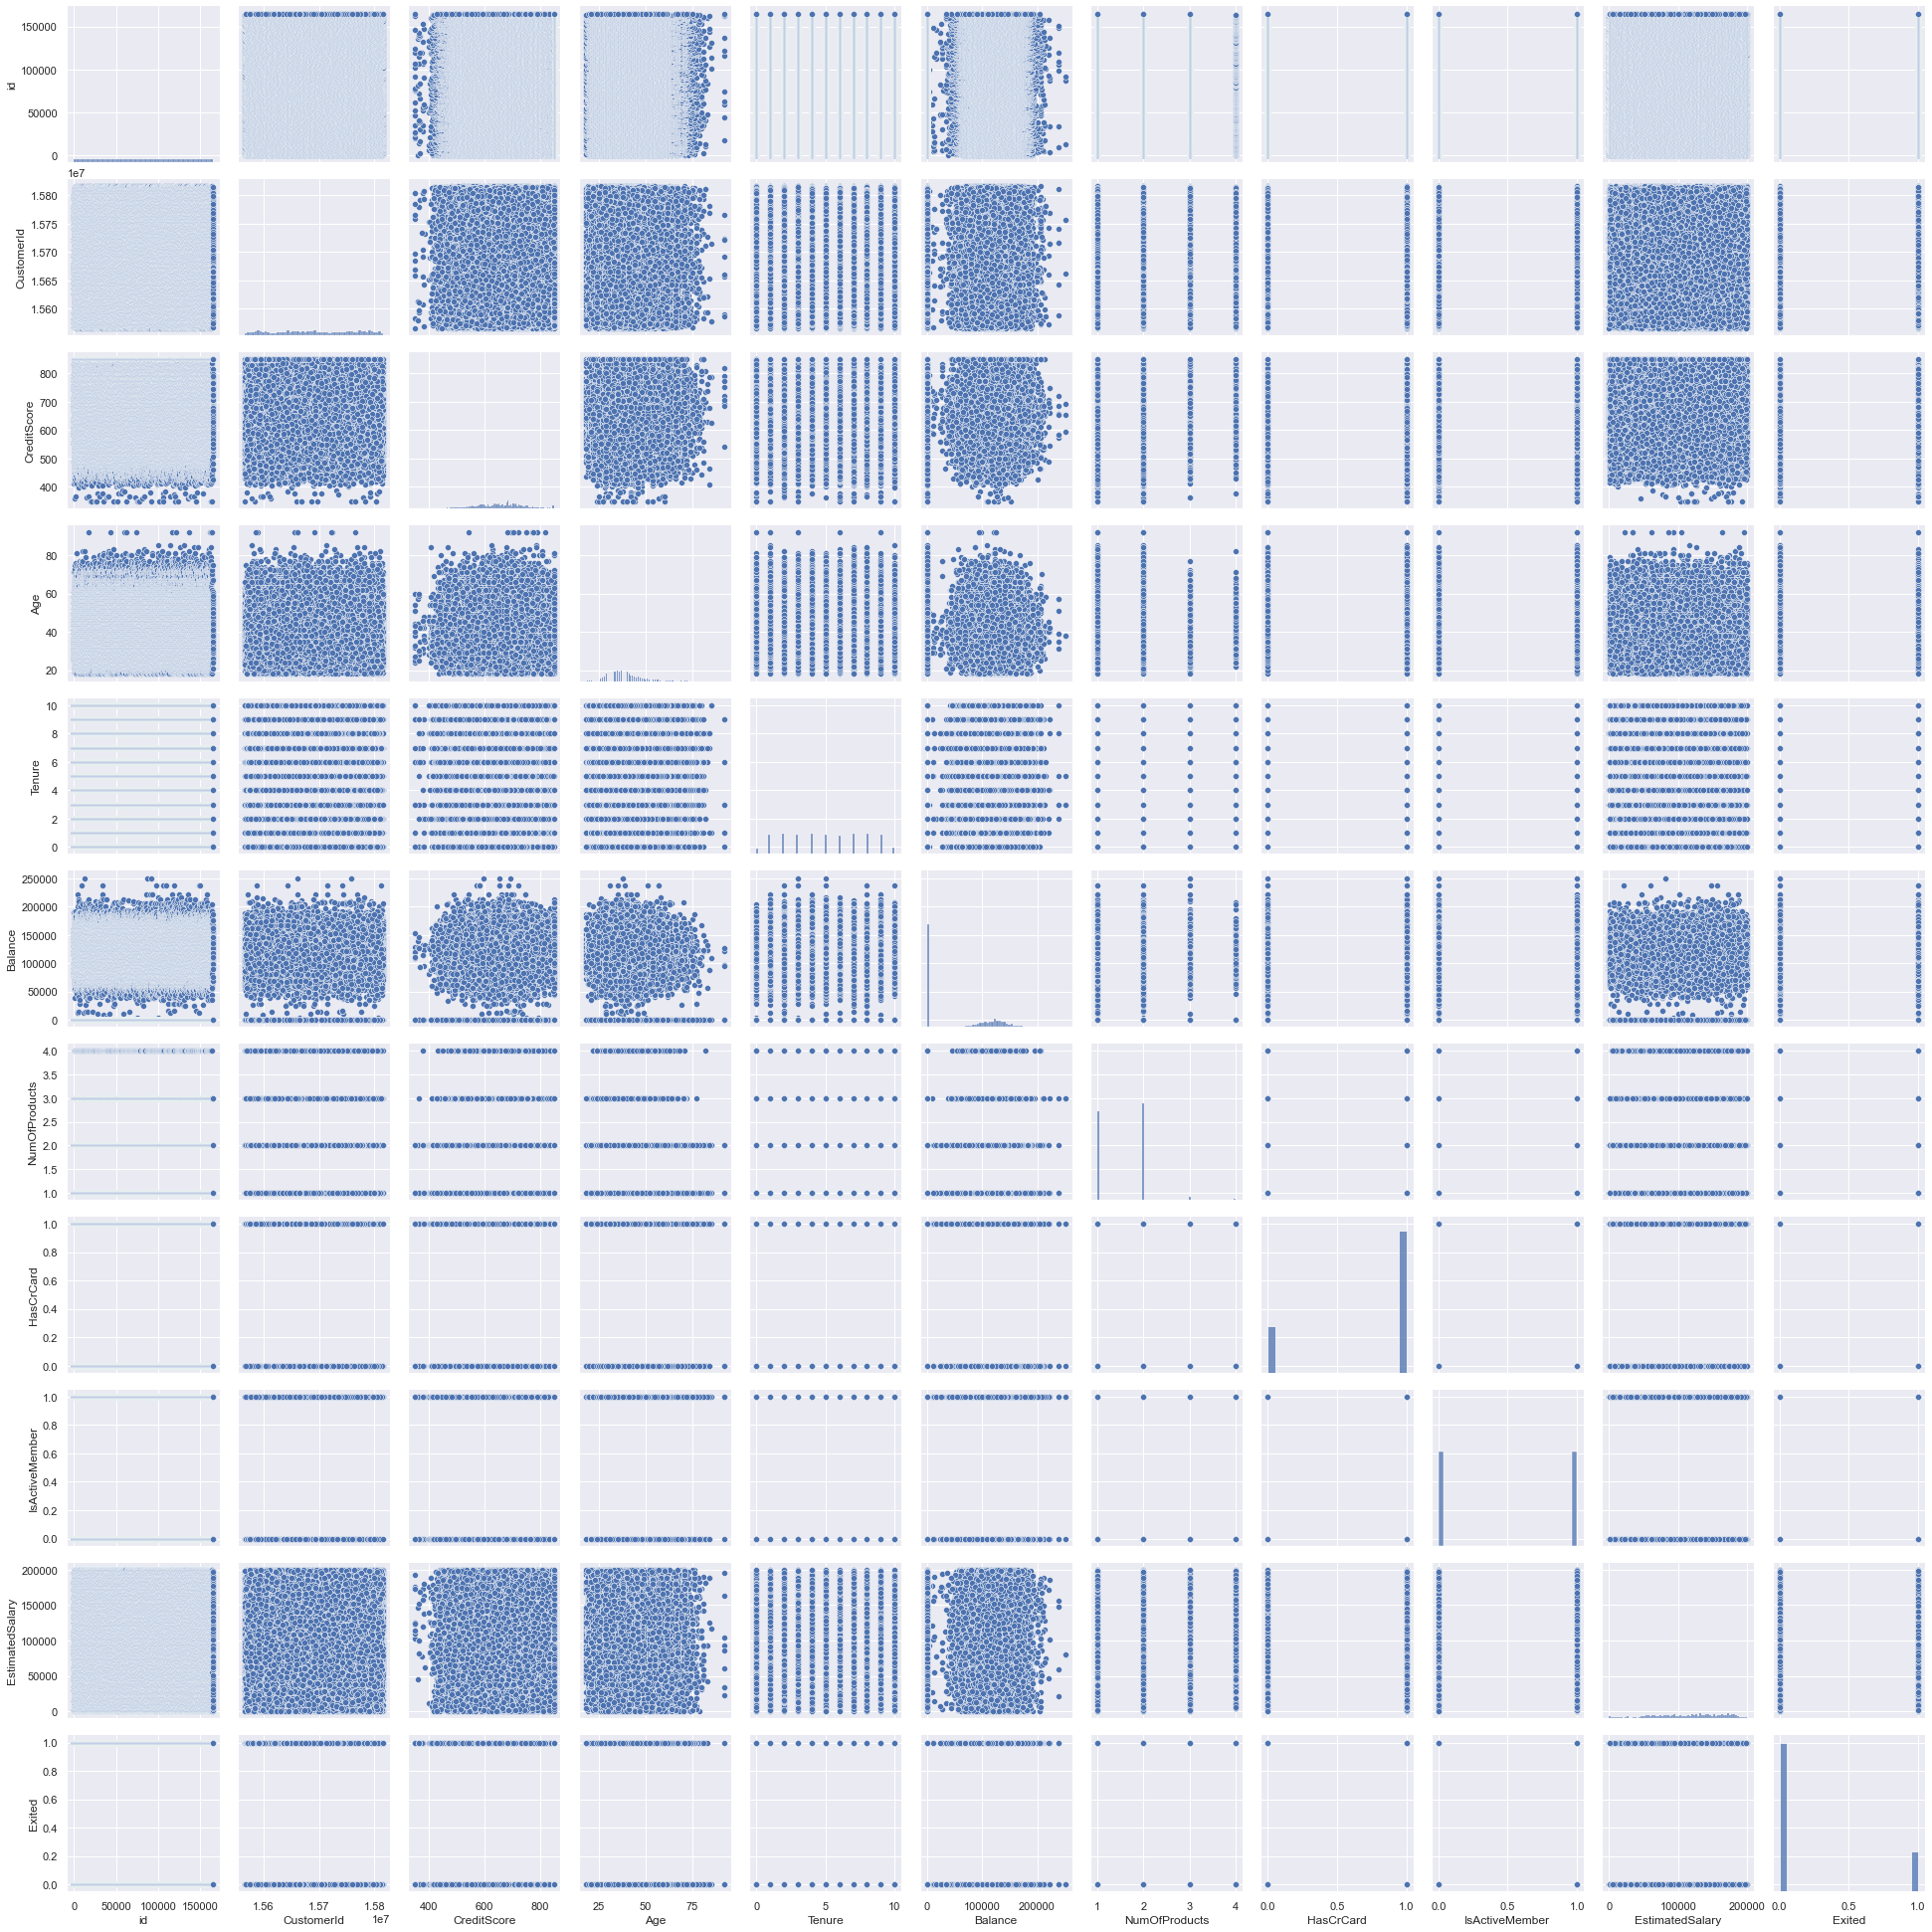

CPU times: total: 13.9 s
Wall time: 35.8 s


In [39]:
%%time
sns.pairplot(df_train)
plt.show()

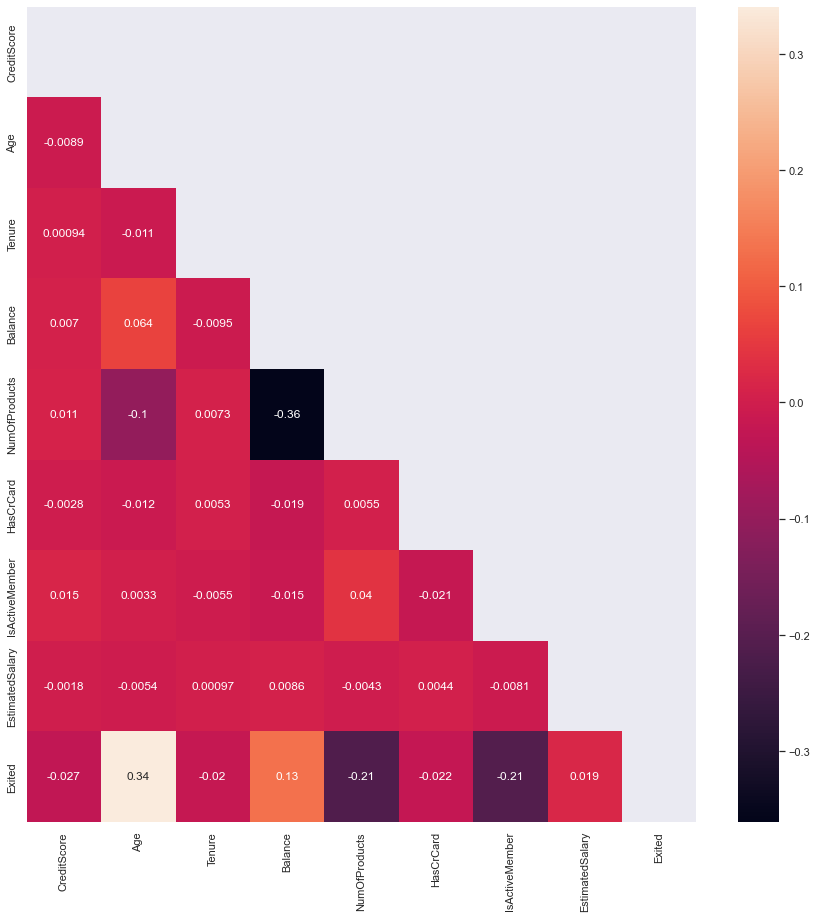

In [40]:
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(df_train.iloc[:, 2:-1].corr()))
cor_heatmap = sns.heatmap(df_train.iloc[:, 2:-1].corr(), mask=mask, annot=True)
plt.show()

# <div style="width:500px; background-color:#0d1b2a; margin-left: 150px; text-align:center; padding:10px; font: bold 5rem 'Fira Sans', sans-serif; border-radius:25px">Machine Learning</div>

In [41]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, PowerTransformer, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [42]:
df_train

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited ISO_Code  
0             181449.97       0      FRA  
1              49503.50       0      FRA  
2             184866.69       0      FRA  
3              84560.88       0      FRA  
4              15068.83       0      ESP  
...                 ...     ...      ...  
165029        131834.75       0      ESP  
165030        131834.45       0      FRA  
165031        127429.56       0      FRA  
165032         71173.03       0      ESP  
165033         61581.79       1      FRA  

[165034 rows x 15 columns]

In [43]:
df_train.CreditScore.min()

350

In [44]:
for i in df_train.CreditScore:
    if i >= 300 and i <400:
        print('good')
    elif i >= 400 and i <500:
        print(i)

413
488
461
494
494
431
471
434
479
good
469
431
470
449
452
484
477
443
447
497
428
488
453
434
437
496
415
487
479
492
477
484
472
451
489
450
468
493
479
487
427
497
488
459
459
471
496
489
484
488
466
485
493
477
489
467
438
473
458
479
458
453
473
444
439
479
464
good
477
496
487
473
466
473
474
438
492
488
420
490
477
472
461
452
466
496
451
459
482
489
452
428
477
411
472
493
456
467
489
429
493
484
471
497
486
455
498
453
485
466
429
489
498
495
476
476
484
479
492
486
468
461
451
463
492
461
494
472
461
489
463
494
471
463
475
452
485
479
494
476
479
486
494
488
477
497
439
482
467
452
487
496
424
476
441
498
452
443
498
496
484
478
444
437
488
449
466
479
498
482
430
479
479
good
481
489
459
492
476
468
476
438
477
488
438
484
493
498
462
495
471
438
493
439
442
466
446
411
496
459
496
426
491
479
494
491
455
494
425
495
477
434
498
447
431
481
496
434
485
479
435
431
476
487
497
459
458
437
408
439
481
483
492
462
495
481
494
496
463
479
493
479
405
485
489
496
486
477
469
4

405
490
439
414
479
489
462
498
492
461
486
496
434
489
488
431
412
492
437
468
476
497
497
443
437
497
466
474
479
461
490
474
481
479
479
471
460
479
498
431
479
492
476
444
452
471
495
468
498
496
467
486
477
473
492
474
471
495
447
492
464
472
498
498
439
474
486
476
473
468
411
454
494
494
487
477
494
447
473
473
426
480
461
478
445
477
493
472
487
498
467
472
438
431
449
438
461
496
477
476
431
463
497
461
459
469
481
445
485
439
454
454
449
498
474
499
459
471
434
469
496
477
493
443
good
481
427
good
464
479
438
434
496
473
427
495
485
465
430
431
468
472
477
479
472
449
443
482
468
495
444
494
475
489
469
439
468
489
489
472
472
428
462
447
482
444
499
437
498
478
468
496
494
489
466
467
474
496
474
498
472
466
489
493
431
474
472
467
439
493
493
480
459
483
434
478
494
471
479
483
486
493
493
472
488
488
466
462
485
496
good
481
487
490
495
494
486
494
484
444
489
494
437
449
420
484
485
497
411
489
498
468
464
439
476
472
468
485
494
446
498
492
497
477
498
420
479
468
473
4

In [45]:
def range_credit_score(data, col):
    """
    Transform credit score to range of credit score
    """
    credit = []
    for i in data[col]:
        if i >= 800:
            credit.append("800-900")
        elif i >= 700 and i <800:
            credit.append("700-800")
        elif i >= 600 and i <700:
            credit.append("600-700")
        elif i >= 500 and i < 600:
            credit.append("500-600")
        elif i >= 400 and i < 500:
            credit.append("400-500")
        elif i >= 300 and i < 400:
            credit.append("300-400")
        else:
            credit.append("None")
    return credit

def age_generation(age):
    """
    Tranform age based on their Generation
    """
    if age >= 12 and age <= 27:
        return "Gen Z"
    elif age >= 28 and age <= 43:
        return "Millenials"
    elif age >= 44 and age <= 59:
        return "Gen X"
    elif age >= 60 and age <= 69:
        return "Boomers II"
    elif age >= 70 and age <= 78:
        return "Boomers I"
    elif age >= 79 and age <= 96:
        return "Post War"

In [46]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()
df_train_copy

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited ISO_Code  
0             181449.97       0      FRA  
1              49503.50       0      FRA  
2             184866.69       0      FRA  
3              84560.88       0      FRA  
4              15068.83       0      ESP  
...                 ...     ...      ...  
165029        131834.75       0      ESP  
165030        131834.45       0      FRA  
165031        127429.56       0      FRA  
165032         71173.03       0      ESP  
165033         61581.79       1      FRA  

[165034 rows x 15 columns]

In [47]:
df_train_copy['RangeCrScore'] = range_credit_score(data=df_train_copy ,col='CreditScore')
df_train_copy

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited ISO_Code RangeCrScore  
0             181449.97       0      FRA      600-700  
1              49503.50       0      FRA      600-700  
2             184866.69       0      FRA      600-700  
3              84560.88       0      FRA      500-600  
4              15068.83       0      ESP      700-800  
...                 ...     ...      ...          ...  
165029        131834.75       0      ESP      600-700  
165030        131834.45       0      FRA      700-800  
165031        127429.56       0      FRA      500-600  
165032         71173.03       0      ESP      500-600  
165033         61581.79       1      FRA      800-900  

[165034 rows x 16 columns]

In [48]:
df_train_copy['Age_Gen'] = df_train_copy['Age'].apply(age_generation)
df_train_copy

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited ISO_Code RangeCrScore     Age_Gen  
0             181449.97       0      FRA      600-700  Millenials  
1              49503.50       0      FRA      600-700  Millenials  
2             184866.69       0      FRA      600-700  Millenials  
3              84560.88       0      FRA      500-600  Millenials  
4              15068.83       0      ESP      700-800  Millenials  
...                 ...     ...      ...          ...         ...  
165029        131834.75       0      ESP      600-700  Millenials  
165030        131834.45       0      FRA      700-800  Millenials  
165031        127429.56       0      FRA      500-600  Millenials  
165032         71173.03       0      ESP      500-600  Millenials  
165033         61581.79       1      FRA      800-900  Millenials  

[165034 rows x 17 columns]

In [49]:
df_train_copy = df_train_copy.drop(['id', 'CustomerId', 'Surname', 'ISO_Code'], axis=1)
df_train_copy

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0               668    France    Male  33.0       3       0.00              2   
1               627    France    Male  33.0       1       0.00              2   
2               678    France    Male  40.0      10       0.00              2   
3               581    France    Male  34.0       2  148882.54              1   
4               716     Spain    Male  33.0       5       0.00              2   
...             ...       ...     ...   ...     ...        ...            ...   
165029          667     Spain  Female  33.0       2       0.00              1   
165030          792    France    Male  35.0       3       0.00              1   
165031          565    France    Male  31.0       5       0.00              1   
165032          554     Spain  Female  30.0       7  161533.00              1   
165033          850    France    Male  31.0       1       0.00              1   

        HasCrCard  IsActiveMember  EstimatedSalary  Exited RangeCrScore  \
0             1.0             0.0        181449.97       0      600-700   
1             1.0             1.0         49503.50       0      600-700   
2             1.0             0.0        184866.69       0      600-700   
3             1.0             1.0         84560.88       0      500-600   
4             1.0             1.0         15068.83       0      700-800   
...           ...             ...              ...     ...          ...   
165029        1.0             1.0        131834.75       0      600-700   
165030        0.0             0.0        131834.45       0      700-800   
165031        1.0             1.0        127429.56       0      500-600   
165032        0.0             1.0         71173.03       0      500-600   
165033        1.0             0.0         61581.79       1      800-900   

           Age_Gen  
0       Millenials  
1       Millenials  
2       Millenials  
3       Millenials  
4       Millenials  
...            ...  
165029  Millenials  
165030  Millenials  
165031  Millenials  
165032  Millenials  
165033  Millenials  

[165034 rows x 13 columns]

In [50]:
# Female = 1, Male = 0
df_train_copy['Gender'] = df_train_copy['Gender'].apply(lambda x: 1 if x=='Female' else 0)

In [51]:
abt = pd.get_dummies(df_train_copy)
abt

CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  \
0               668       0  33.0       3       0.00              2   
1               627       0  33.0       1       0.00              2   
2               678       0  40.0      10       0.00              2   
3               581       0  34.0       2  148882.54              1   
4               716       0  33.0       5       0.00              2   
...             ...     ...   ...     ...        ...            ...   
165029          667       1  33.0       2       0.00              1   
165030          792       0  35.0       3       0.00              1   
165031          565       0  31.0       5       0.00              1   
165032          554       1  30.0       7  161533.00              1   
165033          850       0  31.0       1       0.00              1   

        HasCrCard  IsActiveMember  EstimatedSalary  Exited  ...  \
0             1.0             0.0        181449.97       0  ...   
1             1.0             1.0         49503.50       0  ...   
2             1.0             0.0        184866.69       0  ...   
3             1.0             1.0         84560.88       0  ...   
4             1.0             1.0         15068.83       0  ...   
...           ...             ...              ...     ...  ...   
165029        1.0             1.0        131834.75       0  ...   
165030        0.0             0.0        131834.45       0  ...   
165031        1.0             1.0        127429.56       0  ...   
165032        0.0             1.0         71173.03       0  ...   
165033        1.0             0.0         61581.79       1  ...   

        RangeCrScore_500-600  RangeCrScore_600-700  RangeCrScore_700-800  \
0                          0                     1                     0   
1                          0                     1                     0   
2                          0                     1                     0   
3                          1                     0                     0   
4                          0                     0                     1   
...                      ...                   ...                   ...   
165029                     0                     1                     0   
165030                     0                     0                     1   
165031                     1                     0                     0   
165032                     1                     0                     0   
165033                     0                     0                     0   

        RangeCrScore_800-900  Age_Gen_Boomers I  Age_Gen_Boomers II  \
0                          0                  0                   0   
1                          0                  0                   0   
2                          0                  0                   0   
3                          0                  0                   0   
4                          0                  0                   0   
...                      ...                ...                 ...   
165029                     0                  0                   0   
165030                     0                  0                   0   
165031                     0                  0                   0   
165032                     0                  0                   0   
165033                     1                  0                   0   

        Age_Gen_Gen X  Age_Gen_Gen Z  Age_Gen_Millenials  Age_Gen_Post War  
0                   0              0                   1                 0  
1                   0              0                   1                 0  
2                   0              0                   1                 0  
3                   0              0                   1                 0  
4                   0              0                   1                 0  
...               ...            ...                 ...               ...  
165029              0              0         

In [52]:
X = abt.drop('Exited', axis=1)
y = abt['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=2701)

In [53]:
print(len(X_train), len(X_val), len(y_train), len(y_val))

115523 49511 115523 49511


In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [55]:
yhat = rf.predict(X_val)
roc = roc_auc_score(y_val, yhat)
roc

0.7356701815123998

In [56]:
rf.feature_importances_

array([1.40542201e-01, 2.00766712e-02, 1.64175329e-01, 8.38630869e-02,
       1.09316727e-01, 1.30650822e-01, 1.35366239e-02, 4.64661016e-02,
       1.57167982e-01, 9.35281281e-03, 1.88271835e-02, 6.21660052e-03,
       1.09718839e-04, 2.36026734e-03, 5.20385618e-03, 6.40252035e-03,
       5.26012165e-03, 2.76536653e-03, 6.77727047e-04, 3.02472833e-03,
       4.50579338e-02, 5.34060238e-03, 2.35041182e-02, 1.00897767e-04])

In [57]:
feature_dict = dict(zip(abt.columns, list(rf.feature_importances_)))
feature_dict

{'CreditScore': 0.14054220053747526,
 'Gender': 0.020076671235214286,
 'Age': 0.16417532872922938,
 'Tenure': 0.08386308694090885,
 'Balance': 0.10931672729404564,
 'NumOfProducts': 0.1306508223477766,
 'HasCrCard': 0.013536623880820189,
 'IsActiveMember': 0.04646610164944682,
 'EstimatedSalary': 0.1571679821210653,
 'Exited': 0.009352812810071758,
 'Geography_France': 0.01882718353616321,
 'Geography_Germany': 0.006216600518414071,
 'Geography_Spain': 0.00010971883913835687,
 'RangeCrScore_300-400': 0.0023602673409976096,
 'RangeCrScore_400-500': 0.005203856184989597,
 'RangeCrScore_500-600': 0.006402520345617101,
 'RangeCrScore_600-700': 0.005260121649470146,
 'RangeCrScore_700-800': 0.0027653665266669574,
 'RangeCrScore_800-900': 0.0006777270471290966,
 'Age_Gen_Boomers I': 0.0030247283251090035,
 'Age_Gen_Boomers II': 0.045057933784120596,
 'Age_Gen_Gen X': 0.00534060238363637,
 'Age_Gen_Gen Z': 0.023504118205570322,
 'Age_Gen_Millenials': 0.00010089776692346405}

<AxesSubplot:title={'center':'Feature Importance'}>

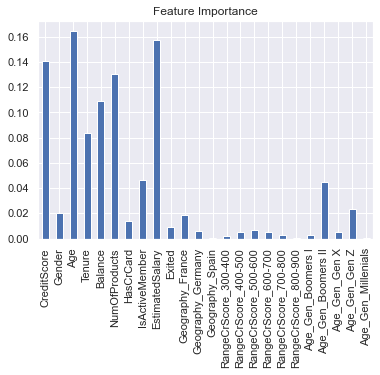

In [58]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)

In [59]:
abt = abt.drop(['Geography_Spain', 'RangeCrScore_800-900', 'Age_Gen_Millenials'], axis=1)
X = abt.drop('Exited', axis=1)
y = abt['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=900)

In [60]:
pipelines = {
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'log_reg':make_pipeline(StandardScaler(), LogisticRegression())
}

grid = {
    'rf':{'randomforestclassifier__n_estimators':[n*10 for n in range(1,11)],
         'randomforestclassifier__class_weight':['balanced', 'balanced_subsample'],
         'randomforestclassifier__max_features':['auto', 'sqrt', 'log2']},
    'log_reg':{'logisticregression__C':[0.1,0.5,1.0],
              'logisticregression__penalty':['l1', 'l2', 'elasticnet'],
              }
}

In [61]:
fit_models = {}
for algo, pipeline in pipelines.items():
    # 4.1 Create a Grid Search CV instance
    model = GridSearchCV(pipeline, grid[algo], cv=5, n_jobs=-1)
    # 4.2 Fit the model
    model.fit(X_train, y_train)
    # 4.3 Save it to the fit models dictionary
    fit_models[algo] = model
    print(algo, 'model has been fit.')

rf model has been fit.


C:\Users\bayu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bayu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bayu\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bayu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, sel

log_reg model has been fit.


In [62]:
for algo, model in fit_models.items():
    yhat = model.predict(X_val)
    print('ROC score for', algo, 'is', roc_auc_score(y_val, yhat))

ROC score for rf is 0.7296746163417063
ROC score for log_reg is 0.6851703066799172


In [63]:
yhat = fit_models['rf'].predict(X_val)

In [64]:
def roc_auc_plot_score(y_test,y_pred_proba):
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    return roc_auc

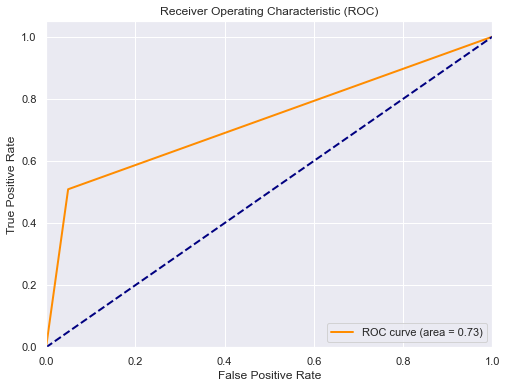

0.7296746163417063

In [65]:
roc_auc_plot_score(y_val, yhat)

In [66]:
df_train_copy

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0               668    France       0  33.0       3       0.00              2   
1               627    France       0  33.0       1       0.00              2   
2               678    France       0  40.0      10       0.00              2   
3               581    France       0  34.0       2  148882.54              1   
4               716     Spain       0  33.0       5       0.00              2   
...             ...       ...     ...   ...     ...        ...            ...   
165029          667     Spain       1  33.0       2       0.00              1   
165030          792    France       0  35.0       3       0.00              1   
165031          565    France       0  31.0       5       0.00              1   
165032          554     Spain       1  30.0       7  161533.00              1   
165033          850    France       0  31.0       1       0.00              1   

        HasCrCard  IsActiveMember  EstimatedSalary  Exited RangeCrScore  \
0             1.0             0.0        181449.97       0      600-700   
1             1.0             1.0         49503.50       0      600-700   
2             1.0             0.0        184866.69       0      600-700   
3             1.0             1.0         84560.88       0      500-600   
4             1.0             1.0         15068.83       0      700-800   
...           ...             ...              ...     ...          ...   
165029        1.0             1.0        131834.75       0      600-700   
165030        0.0             0.0        131834.45       0      700-800   
165031        1.0             1.0        127429.56       0      500-600   
165032        0.0             1.0         71173.03       0      500-600   
165033        1.0             0.0         61581.79       1      800-900   

           Age_Gen  
0       Millenials  
1       Millenials  
2       Millenials  
3       Millenials  
4       Millenials  
...            ...  
165029  Millenials  
165030  Millenials  
165031  Millenials  
165032  Millenials  
165033  Millenials  

[165034 rows x 13 columns]

In [67]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
import optuna

In [68]:
X = abt.drop('Exited', axis=1)
y = abt['Exited']

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=45)

# Oversampling
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [69]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0))) 

Before OverSampling, counts of label '1': 24448
Before OverSampling, counts of label '0': 91075 

After OverSampling, the shape of train_X: (182150, 21)
After OverSampling, the shape of train_y: (182150,) 

After OverSampling, counts of label '1': 91075
After OverSampling, counts of label '0': 91075


In [70]:
fit_models = {}
for algo, pipeline in pipelines.items():
    # 4.1 Create a Grid Search CV instance
    model = GridSearchCV(pipeline, grid[algo], cv=5, n_jobs=-1)
    # 4.2 Fit the model
    model.fit(X_train_smote, y_train_smote)
    # 4.3 Save it to the fit models dictionary
    fit_models[algo] = model
    print(algo, 'model has been fit.')

rf model has been fit.


C:\Users\bayu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bayu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bayu\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bayu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, sel

log_reg model has been fit.


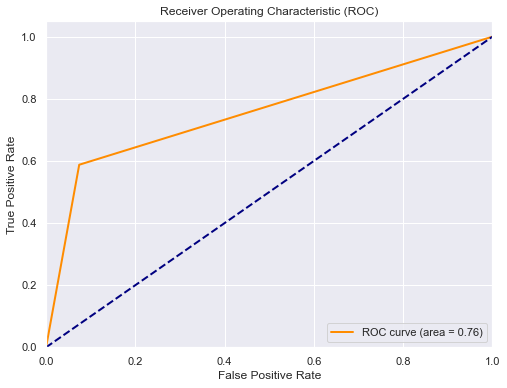

0.7567331743694126

In [71]:
yhat = fit_models['rf'].predict(X_val)
roc_auc_plot_score(y_val, yhat)

In [72]:
def lgbm_objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'is_unbalance': True,
    }
    lgbm_model = LGBMClassifier(**params)  
    lgbm_model.fit(X_train_smote, y_train_smote)
    lgbm_preds = lgbm_model.predict(X_val)
    
    return roc_auc_score(y_val, lgbm_preds)

def xgb_objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'auc',
        'scale_pos_weight': 3.74, # to change depending on the target imbalance
    }
    xgb_model = XGBClassifier(**params)  
    xgb_model.fit(X_train_smote, y_train_smote, verbose=0)   
    xgb_preds = xgb_model.predict(X_val)
    
    return roc_auc_score(y_val, xgb_preds)

# Function for CatBoostClassifier parameters search
def cat_objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.00000001, 100.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 0.00000001, 10.0, log=True),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.01, 0.1, log=True),
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
        'bootstrap_type': 'Bayesian',
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 10),
        'loss_function': 'Logloss',
        'eval_metric': 'AUC:hints=skip_train~false',
        'verbose': False,
        'auto_class_weights': 'Balanced',
    }
    cat_model = CatBoostClassifier(**params)    
    cat_model.fit(X_train_smote, y_train_smote, verbose=0,)
    cat_preds = cat_model.predict(X_val)
    
    return roc_auc_score(y_val, cat_preds)

# Function for VotingClassifier parameters search
def voting_objective(trial):
    lgbm_model = LGBMClassifier(**lgbm_params)
    xgb_model = XGBClassifier(**xgb_params)
    cat_model = CatBoostClassifier(**cat_params)
    
    lgbm_weight = trial.suggest_float('LGBM_Weight', 0.01, 1.0)
    xgb_weight = trial.suggest_float('XGB_Weight', 0.01, 1.0)
    cat_weight = trial.suggest_float('Cat_Weight', 0.01, 1.0)
    
    voting_classifier = VotingClassifier(
        [('lgbm', lgbm_model),
         ('xgb', xgb_model),
         ('cat', cat_model)],
        weights=[lgbm_weight, xgb_weight, cat_weight],
        voting='soft',
    )
    voting_preds = voting_classifier.fit(X_train, y_train).predict(X_val)
    
    return roc_auc_score(y_val, voting_preds)


In [73]:
# # # Optuna study
# objective = lgbm_objective

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=200)

# # Show best results
# trial = study.best_trial

# print('Number of finished trials: ', len(study.trials))
# print('Best trial:')
# print('Value:', trial.value)
# print('Params:')

# for key, value in trial.params.items():
#     print('{}: {}'.format(key, value))

In [74]:
# objective = xgb_objective

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=200)

# # Show best results
# trial = study.best_trial

# print('Number of finished trials: ', len(study.trials))
# print('Best trial:')
# print('Value:', trial.value)
# print('Params:')

# for key, value in trial.params.items():
#     print('{}: {}'.format(key, value))

In [75]:
# objective = cat_objective

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=200)

# # Show best results
# trial = study.best_trial

# print('Number of finished trials: ', len(study.trials))
# print('Best trial:')
# print('Value:', trial.value)
# print('Params:')

# for key, value in trial.params.items():
#     print('{}: {}'.format(key, value))

In [76]:
# Params
lgbm_params = {
    "learning_rate": 0.0015484289629316376,
    "lambda_l1": 0.0022858115422095364,
    "lambda_l2": 0.00016800389902859656,
    "num_leaves": 17,
    "feature_fraction": 0.9765596298967504,
    "bagging_fraction": 0.6523070887150516,
    "bagging_freq": 5,
    "min_child_samples": 10,
    'objective': 'binary',
    'metric': 'auc',
    'verbosity': -1,
}

xgb_params = {
    "max_depth": 6,
    "learning_rate": 0.10811156124044738,
    "n_estimators": 687,
    "min_child_weight": 3,
    "gamma": 0.45022395926255654,
    "subsample": 0.8214793843742807,
    "colsample_bytree": 0.21045509077172406,
    "reg_alpha": 0.26998197157930415,
    "reg_lambda": 0.3906866743897333,
    
}

cat_params = {
    "iterations": 1490,
    "learning_rate": 0.06486333684359602,
    "depth": 9,
    "l2_leaf_reg": 22.942581484487746,
    "random_strength": 3.129061820413112,
    "od_type": "IncToDec",
    "od_wait": 12,
    "colsample_bylevel": 0.02397075200572873,
    "boosting_type": "Ordered",
    "bagging_temperature": 0.22055372561581793,
    
}

In [77]:
%%time

# Create models
lgbm_model = LGBMClassifier(**lgbm_params)
xgb_model = XGBClassifier(**xgb_params)
cat_model = CatBoostClassifier(**cat_params)

models_to_test = [lgbm_model, xgb_model, cat_model]

# Cross validation
def cross_val(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv)
    print(f'/nModel {type(model).__name__}:')
    print(pd.Series(scores).describe())
    return scores
    
for model in models_to_test:
    model.fit(X_train, y_train)
    cross_val(model, X_val, y_val)



/nModel LGBMClassifier:
count    5.000000
mean     0.872379
std      0.002564
min      0.869649
25%      0.869902
50%      0.872619
75%      0.874474
max      0.875253
dtype: float64
/nModel XGBClassifier:
count    5.000000
mean     0.880913
std      0.004392
min      0.876161
25%      0.876808
50%      0.881167
75%      0.884636
max      0.885791
dtype: float64
0:	learn: 0.6694573	total: 193ms	remaining: 4m 47s
1:	learn: 0.6489467	total: 219ms	remaining: 2m 43s
2:	learn: 0.6311960	total: 245ms	remaining: 2m 1s
3:	learn: 0.6157825	total: 271ms	remaining: 1m 40s
4:	learn: 0.6024971	total: 295ms	remaining: 1m 27s
5:	learn: 0.5806963	total: 318ms	remaining: 1m 18s
6:	learn: 0.5710395	total: 344ms	remaining: 1m 12s
7:	learn: 0.5626855	total: 368ms	remaining: 1m 8s
8:	learn: 0.5525235	total: 393ms	remaining: 1m 4s
9:	learn: 0.5463269	total: 416ms	remaining: 1m 1s
10:	learn: 0.5409588	total: 439ms	remaining: 59s
11:	learn: 0.5363068	total: 460ms	remaining: 56.7s
12:	learn: 0.5322739	total: 4

156:	learn: 0.4313891	total: 3.7s	remaining: 31.4s
157:	learn: 0.4312055	total: 3.72s	remaining: 31.4s
158:	learn: 0.4312052	total: 3.74s	remaining: 31.3s
159:	learn: 0.4312051	total: 3.76s	remaining: 31.3s
160:	learn: 0.4312050	total: 3.78s	remaining: 31.2s
161:	learn: 0.4312050	total: 3.8s	remaining: 31.2s
162:	learn: 0.4209570	total: 3.83s	remaining: 31.2s
163:	learn: 0.4209531	total: 3.85s	remaining: 31.1s
164:	learn: 0.4193210	total: 3.88s	remaining: 31.1s
165:	learn: 0.4187019	total: 3.9s	remaining: 31.1s
166:	learn: 0.4186981	total: 3.92s	remaining: 31.1s
167:	learn: 0.4186947	total: 3.94s	remaining: 31s
168:	learn: 0.4183418	total: 3.97s	remaining: 31s
169:	learn: 0.4183391	total: 3.99s	remaining: 31s
170:	learn: 0.4183368	total: 4.01s	remaining: 30.9s
171:	learn: 0.4183221	total: 4.03s	remaining: 30.9s
172:	learn: 0.4182026	total: 4.05s	remaining: 30.9s
173:	learn: 0.4182010	total: 4.08s	remaining: 30.8s
174:	learn: 0.4181996	total: 4.1s	remaining: 30.8s
175:	learn: 0.4181983	

315:	learn: 0.3856708	total: 7.88s	remaining: 29.3s
316:	learn: 0.3856700	total: 7.92s	remaining: 29.3s
317:	learn: 0.3856700	total: 7.95s	remaining: 29.3s
318:	learn: 0.3848843	total: 7.99s	remaining: 29.3s
319:	learn: 0.3846730	total: 8.03s	remaining: 29.4s
320:	learn: 0.3835737	total: 8.08s	remaining: 29.4s
321:	learn: 0.3814822	total: 8.12s	remaining: 29.5s
322:	learn: 0.3813243	total: 8.16s	remaining: 29.5s
323:	learn: 0.3813238	total: 8.19s	remaining: 29.5s
324:	learn: 0.3813235	total: 8.23s	remaining: 29.5s
325:	learn: 0.3813175	total: 8.27s	remaining: 29.5s
326:	learn: 0.3813142	total: 8.3s	remaining: 29.5s
327:	learn: 0.3813139	total: 8.34s	remaining: 29.6s
328:	learn: 0.3813137	total: 8.38s	remaining: 29.6s
329:	learn: 0.3811667	total: 8.42s	remaining: 29.6s
330:	learn: 0.3811665	total: 8.46s	remaining: 29.6s
331:	learn: 0.3811664	total: 8.49s	remaining: 29.6s
332:	learn: 0.3811662	total: 8.52s	remaining: 29.6s
333:	learn: 0.3811662	total: 8.56s	remaining: 29.6s
334:	learn: 0

476:	learn: 0.3660175	total: 17.2s	remaining: 36.5s
477:	learn: 0.3653545	total: 17.2s	remaining: 36.5s
478:	learn: 0.3653544	total: 17.3s	remaining: 36.5s
479:	learn: 0.3653540	total: 17.3s	remaining: 36.4s
480:	learn: 0.3653540	total: 17.4s	remaining: 36.4s
481:	learn: 0.3643770	total: 17.4s	remaining: 36.4s
482:	learn: 0.3643770	total: 17.5s	remaining: 36.4s
483:	learn: 0.3638384	total: 17.5s	remaining: 36.4s
484:	learn: 0.3636109	total: 17.6s	remaining: 36.4s
485:	learn: 0.3636109	total: 17.6s	remaining: 36.3s
486:	learn: 0.3636099	total: 17.6s	remaining: 36.3s
487:	learn: 0.3636099	total: 17.7s	remaining: 36.3s
488:	learn: 0.3636098	total: 17.7s	remaining: 36.3s
489:	learn: 0.3607228	total: 17.8s	remaining: 36.3s
490:	learn: 0.3607208	total: 17.9s	remaining: 36.3s
491:	learn: 0.3607206	total: 17.9s	remaining: 36.3s
492:	learn: 0.3607173	total: 18s	remaining: 36.3s
493:	learn: 0.3607171	total: 18s	remaining: 36.3s
494:	learn: 0.3607170	total: 18s	remaining: 36.3s
495:	learn: 0.3596

635:	learn: 0.3521993	total: 23.3s	remaining: 31.3s
636:	learn: 0.3521965	total: 23.3s	remaining: 31.2s
637:	learn: 0.3521304	total: 23.4s	remaining: 31.2s
638:	learn: 0.3521303	total: 23.4s	remaining: 31.2s
639:	learn: 0.3521302	total: 23.4s	remaining: 31.1s
640:	learn: 0.3520742	total: 23.5s	remaining: 31.1s
641:	learn: 0.3520742	total: 23.5s	remaining: 31s
642:	learn: 0.3520741	total: 23.5s	remaining: 31s
643:	learn: 0.3520740	total: 23.6s	remaining: 31s
644:	learn: 0.3520740	total: 23.6s	remaining: 30.9s
645:	learn: 0.3520732	total: 23.6s	remaining: 30.9s
646:	learn: 0.3520731	total: 23.7s	remaining: 30.8s
647:	learn: 0.3520731	total: 23.7s	remaining: 30.8s
648:	learn: 0.3510820	total: 23.8s	remaining: 30.8s
649:	learn: 0.3510820	total: 23.8s	remaining: 30.7s
650:	learn: 0.3510778	total: 23.8s	remaining: 30.7s
651:	learn: 0.3507651	total: 23.9s	remaining: 30.7s
652:	learn: 0.3502355	total: 23.9s	remaining: 30.6s
653:	learn: 0.3502310	total: 23.9s	remaining: 30.6s
654:	learn: 0.3502

800:	learn: 0.3443038	total: 27.9s	remaining: 24s
801:	learn: 0.3442828	total: 27.9s	remaining: 24s
802:	learn: 0.3442828	total: 28s	remaining: 23.9s
803:	learn: 0.3442828	total: 28s	remaining: 23.9s
804:	learn: 0.3442828	total: 28s	remaining: 23.8s
805:	learn: 0.3442828	total: 28s	remaining: 23.8s
806:	learn: 0.3442827	total: 28s	remaining: 23.7s
807:	learn: 0.3442787	total: 28.1s	remaining: 23.7s
808:	learn: 0.3442787	total: 28.1s	remaining: 23.6s
809:	learn: 0.3442787	total: 28.1s	remaining: 23.6s
810:	learn: 0.3442757	total: 28.1s	remaining: 23.6s
811:	learn: 0.3442757	total: 28.2s	remaining: 23.5s
812:	learn: 0.3442503	total: 28.2s	remaining: 23.5s
813:	learn: 0.3442503	total: 28.2s	remaining: 23.4s
814:	learn: 0.3442488	total: 28.2s	remaining: 23.4s
815:	learn: 0.3442313	total: 28.3s	remaining: 23.3s
816:	learn: 0.3442313	total: 28.3s	remaining: 23.3s
817:	learn: 0.3442055	total: 28.3s	remaining: 23.2s
818:	learn: 0.3441008	total: 28.3s	remaining: 23.2s
819:	learn: 0.3441008	tota

967:	learn: 0.3397167	total: 31.6s	remaining: 17.1s
968:	learn: 0.3397167	total: 31.6s	remaining: 17s
969:	learn: 0.3397167	total: 31.7s	remaining: 17s
970:	learn: 0.3397153	total: 31.7s	remaining: 16.9s
971:	learn: 0.3397139	total: 31.7s	remaining: 16.9s
972:	learn: 0.3397139	total: 31.7s	remaining: 16.9s
973:	learn: 0.3397139	total: 31.7s	remaining: 16.8s
974:	learn: 0.3397139	total: 31.8s	remaining: 16.8s
975:	learn: 0.3396287	total: 31.8s	remaining: 16.7s
976:	learn: 0.3396287	total: 31.8s	remaining: 16.7s
977:	learn: 0.3396287	total: 31.8s	remaining: 16.7s
978:	learn: 0.3396287	total: 31.9s	remaining: 16.6s
979:	learn: 0.3396287	total: 31.9s	remaining: 16.6s
980:	learn: 0.3396287	total: 31.9s	remaining: 16.5s
981:	learn: 0.3395306	total: 31.9s	remaining: 16.5s
982:	learn: 0.3395306	total: 31.9s	remaining: 16.5s
983:	learn: 0.3395306	total: 32s	remaining: 16.4s
984:	learn: 0.3392668	total: 32s	remaining: 16.4s
985:	learn: 0.3392498	total: 32s	remaining: 16.4s
986:	learn: 0.3392498	

1125:	learn: 0.3359732	total: 35.1s	remaining: 11.3s
1126:	learn: 0.3359671	total: 35.1s	remaining: 11.3s
1127:	learn: 0.3359671	total: 35.1s	remaining: 11.3s
1128:	learn: 0.3359671	total: 35.1s	remaining: 11.2s
1129:	learn: 0.3359671	total: 35.1s	remaining: 11.2s
1130:	learn: 0.3359671	total: 35.2s	remaining: 11.2s
1131:	learn: 0.3359671	total: 35.2s	remaining: 11.1s
1132:	learn: 0.3359555	total: 35.2s	remaining: 11.1s
1133:	learn: 0.3359555	total: 35.2s	remaining: 11.1s
1134:	learn: 0.3359555	total: 35.2s	remaining: 11s
1135:	learn: 0.3358955	total: 35.3s	remaining: 11s
1136:	learn: 0.3358861	total: 35.3s	remaining: 11s
1137:	learn: 0.3358861	total: 35.3s	remaining: 10.9s
1138:	learn: 0.3358861	total: 35.3s	remaining: 10.9s
1139:	learn: 0.3358547	total: 35.4s	remaining: 10.9s
1140:	learn: 0.3358547	total: 35.4s	remaining: 10.8s
1141:	learn: 0.3358494	total: 35.4s	remaining: 10.8s
1142:	learn: 0.3358490	total: 35.4s	remaining: 10.8s
1143:	learn: 0.3358490	total: 35.4s	remaining: 10.7s

1282:	learn: 0.3335258	total: 38.5s	remaining: 6.21s
1283:	learn: 0.3335258	total: 38.5s	remaining: 6.18s
1284:	learn: 0.3334778	total: 38.5s	remaining: 6.15s
1285:	learn: 0.3334619	total: 38.6s	remaining: 6.12s
1286:	learn: 0.3334495	total: 38.6s	remaining: 6.09s
1287:	learn: 0.3334495	total: 38.6s	remaining: 6.05s
1288:	learn: 0.3334495	total: 38.6s	remaining: 6.02s
1289:	learn: 0.3334495	total: 38.6s	remaining: 5.99s
1290:	learn: 0.3334495	total: 38.7s	remaining: 5.96s
1291:	learn: 0.3334440	total: 38.7s	remaining: 5.93s
1292:	learn: 0.3334302	total: 38.7s	remaining: 5.9s
1293:	learn: 0.3334302	total: 38.7s	remaining: 5.87s
1294:	learn: 0.3334280	total: 38.8s	remaining: 5.84s
1295:	learn: 0.3334280	total: 38.8s	remaining: 5.81s
1296:	learn: 0.3334280	total: 38.8s	remaining: 5.78s
1297:	learn: 0.3334278	total: 38.9s	remaining: 5.75s
1298:	learn: 0.3334278	total: 38.9s	remaining: 5.72s
1299:	learn: 0.3334278	total: 38.9s	remaining: 5.69s
1300:	learn: 0.3333633	total: 39s	remaining: 5.

1442:	learn: 0.3326422	total: 43.8s	remaining: 1.43s
1443:	learn: 0.3326358	total: 43.9s	remaining: 1.4s
1444:	learn: 0.3326358	total: 43.9s	remaining: 1.37s
1445:	learn: 0.3326358	total: 44s	remaining: 1.34s
1446:	learn: 0.3326358	total: 44s	remaining: 1.31s
1447:	learn: 0.3326358	total: 44s	remaining: 1.28s
1448:	learn: 0.3326357	total: 44.1s	remaining: 1.25s
1449:	learn: 0.3326357	total: 44.1s	remaining: 1.22s
1450:	learn: 0.3326357	total: 44.2s	remaining: 1.19s
1451:	learn: 0.3326135	total: 44.2s	remaining: 1.16s
1452:	learn: 0.3326135	total: 44.2s	remaining: 1.13s
1453:	learn: 0.3326135	total: 44.3s	remaining: 1.1s
1454:	learn: 0.3324815	total: 44.3s	remaining: 1.07s
1455:	learn: 0.3324809	total: 44.4s	remaining: 1.04s
1456:	learn: 0.3324755	total: 44.4s	remaining: 1s
1457:	learn: 0.3324755	total: 44.4s	remaining: 975ms
1458:	learn: 0.3324631	total: 44.5s	remaining: 945ms
1459:	learn: 0.3324524	total: 44.5s	remaining: 915ms
1460:	learn: 0.3324524	total: 44.6s	remaining: 885ms
1461

113:	learn: 0.4412475	total: 2.66s	remaining: 32.1s
114:	learn: 0.4412457	total: 2.69s	remaining: 32.2s
115:	learn: 0.4412441	total: 2.71s	remaining: 32.1s
116:	learn: 0.4412399	total: 2.73s	remaining: 32s
117:	learn: 0.4412387	total: 2.75s	remaining: 32s
118:	learn: 0.4412377	total: 2.77s	remaining: 31.9s
119:	learn: 0.4376758	total: 2.79s	remaining: 31.9s
120:	learn: 0.4376702	total: 2.81s	remaining: 31.8s
121:	learn: 0.4376685	total: 2.83s	remaining: 31.7s
122:	learn: 0.4376670	total: 2.84s	remaining: 31.6s
123:	learn: 0.4376643	total: 2.87s	remaining: 31.6s
124:	learn: 0.4376538	total: 2.89s	remaining: 31.5s
125:	learn: 0.4376528	total: 2.91s	remaining: 31.5s
126:	learn: 0.4349078	total: 2.93s	remaining: 31.4s
127:	learn: 0.4349063	total: 2.94s	remaining: 31.3s
128:	learn: 0.4349037	total: 2.97s	remaining: 31.3s
129:	learn: 0.4339173	total: 2.98s	remaining: 31.2s
130:	learn: 0.4330622	total: 3.01s	remaining: 31.2s
131:	learn: 0.4312558	total: 3.03s	remaining: 31.1s
132:	learn: 0.43

283:	learn: 0.4026028	total: 5.78s	remaining: 24.6s
284:	learn: 0.4026013	total: 5.8s	remaining: 24.5s
285:	learn: 0.4026008	total: 5.82s	remaining: 24.5s
286:	learn: 0.4013045	total: 5.84s	remaining: 24.5s
287:	learn: 0.4013039	total: 5.85s	remaining: 24.4s
288:	learn: 0.4013033	total: 5.87s	remaining: 24.4s
289:	learn: 0.4013028	total: 5.88s	remaining: 24.3s
290:	learn: 0.4013024	total: 5.9s	remaining: 24.3s
291:	learn: 0.4013020	total: 5.92s	remaining: 24.3s
292:	learn: 0.4013004	total: 5.93s	remaining: 24.2s
293:	learn: 0.4009666	total: 5.95s	remaining: 24.2s
294:	learn: 0.4009663	total: 5.97s	remaining: 24.2s
295:	learn: 0.4004186	total: 5.99s	remaining: 24.1s
296:	learn: 0.3982342	total: 6s	remaining: 24.1s
297:	learn: 0.3982191	total: 6.02s	remaining: 24.1s
298:	learn: 0.3978998	total: 6.04s	remaining: 24.1s
299:	learn: 0.3978996	total: 6.06s	remaining: 24s
300:	learn: 0.3953820	total: 6.08s	remaining: 24s
301:	learn: 0.3941810	total: 6.1s	remaining: 24s
302:	learn: 0.3941801	to

449:	learn: 0.3686578	total: 8.59s	remaining: 19.8s
450:	learn: 0.3686577	total: 8.6s	remaining: 19.8s
451:	learn: 0.3686489	total: 8.62s	remaining: 19.8s
452:	learn: 0.3686489	total: 8.64s	remaining: 19.8s
453:	learn: 0.3686381	total: 8.66s	remaining: 19.8s
454:	learn: 0.3686380	total: 8.67s	remaining: 19.7s
455:	learn: 0.3685672	total: 8.69s	remaining: 19.7s
456:	learn: 0.3685617	total: 8.7s	remaining: 19.7s
457:	learn: 0.3685617	total: 8.72s	remaining: 19.6s
458:	learn: 0.3685536	total: 8.74s	remaining: 19.6s
459:	learn: 0.3685438	total: 8.75s	remaining: 19.6s
460:	learn: 0.3685437	total: 8.77s	remaining: 19.6s
461:	learn: 0.3685437	total: 8.79s	remaining: 19.5s
462:	learn: 0.3685437	total: 8.8s	remaining: 19.5s
463:	learn: 0.3685437	total: 8.81s	remaining: 19.5s
464:	learn: 0.3684729	total: 8.83s	remaining: 19.5s
465:	learn: 0.3684728	total: 8.84s	remaining: 19.4s
466:	learn: 0.3684639	total: 8.86s	remaining: 19.4s
467:	learn: 0.3684639	total: 8.87s	remaining: 19.4s
468:	learn: 0.3

610:	learn: 0.3564668	total: 11s	remaining: 15.8s
611:	learn: 0.3564667	total: 11s	remaining: 15.8s
612:	learn: 0.3564667	total: 11s	remaining: 15.8s
613:	learn: 0.3564520	total: 11s	remaining: 15.7s
614:	learn: 0.3564520	total: 11s	remaining: 15.7s
615:	learn: 0.3564519	total: 11.1s	remaining: 15.7s
616:	learn: 0.3564262	total: 11.1s	remaining: 15.7s
617:	learn: 0.3564262	total: 11.1s	remaining: 15.6s
618:	learn: 0.3564262	total: 11.1s	remaining: 15.6s
619:	learn: 0.3564261	total: 11.1s	remaining: 15.6s
620:	learn: 0.3564261	total: 11.1s	remaining: 15.5s
621:	learn: 0.3564224	total: 11.1s	remaining: 15.5s
622:	learn: 0.3564224	total: 11.1s	remaining: 15.5s
623:	learn: 0.3564224	total: 11.1s	remaining: 15.5s
624:	learn: 0.3564208	total: 11.2s	remaining: 15.4s
625:	learn: 0.3564208	total: 11.2s	remaining: 15.4s
626:	learn: 0.3564165	total: 11.2s	remaining: 15.4s
627:	learn: 0.3564165	total: 11.2s	remaining: 15.4s
628:	learn: 0.3564164	total: 11.2s	remaining: 15.3s
629:	learn: 0.3564164	

778:	learn: 0.3481507	total: 12.9s	remaining: 11.8s
779:	learn: 0.3481413	total: 12.9s	remaining: 11.8s
780:	learn: 0.3481413	total: 12.9s	remaining: 11.8s
781:	learn: 0.3481413	total: 13s	remaining: 11.7s
782:	learn: 0.3481413	total: 13s	remaining: 11.7s
783:	learn: 0.3481413	total: 13s	remaining: 11.7s
784:	learn: 0.3481400	total: 13s	remaining: 11.7s
785:	learn: 0.3481222	total: 13s	remaining: 11.6s
786:	learn: 0.3481222	total: 13s	remaining: 11.6s
787:	learn: 0.3481222	total: 13s	remaining: 11.6s
788:	learn: 0.3481222	total: 13s	remaining: 11.6s
789:	learn: 0.3481210	total: 13s	remaining: 11.6s
790:	learn: 0.3481186	total: 13.1s	remaining: 11.5s
791:	learn: 0.3480243	total: 13.1s	remaining: 11.5s
792:	learn: 0.3480243	total: 13.1s	remaining: 11.5s
793:	learn: 0.3480243	total: 13.1s	remaining: 11.5s
794:	learn: 0.3480243	total: 13.1s	remaining: 11.5s
795:	learn: 0.3480243	total: 13.1s	remaining: 11.4s
796:	learn: 0.3479700	total: 13.1s	remaining: 11.4s
797:	learn: 0.3479700	total: 1

948:	learn: 0.3461932	total: 14.9s	remaining: 8.48s
949:	learn: 0.3461932	total: 14.9s	remaining: 8.46s
950:	learn: 0.3461230	total: 14.9s	remaining: 8.45s
951:	learn: 0.3461148	total: 14.9s	remaining: 8.43s
952:	learn: 0.3461148	total: 14.9s	remaining: 8.41s
953:	learn: 0.3460475	total: 14.9s	remaining: 8.4s
954:	learn: 0.3460469	total: 15s	remaining: 8.38s
955:	learn: 0.3460469	total: 15s	remaining: 8.36s
956:	learn: 0.3460469	total: 15s	remaining: 8.35s
957:	learn: 0.3460445	total: 15s	remaining: 8.33s
958:	learn: 0.3460445	total: 15s	remaining: 8.31s
959:	learn: 0.3460445	total: 15s	remaining: 8.29s
960:	learn: 0.3460445	total: 15s	remaining: 8.27s
961:	learn: 0.3460416	total: 15s	remaining: 8.26s
962:	learn: 0.3460416	total: 15.1s	remaining: 8.24s
963:	learn: 0.3460416	total: 15.1s	remaining: 8.22s
964:	learn: 0.3460416	total: 15.1s	remaining: 8.2s
965:	learn: 0.3460416	total: 15.1s	remaining: 8.18s
966:	learn: 0.3460392	total: 15.1s	remaining: 8.17s
967:	learn: 0.3460392	total: 1

1117:	learn: 0.3394781	total: 16.8s	remaining: 5.61s
1118:	learn: 0.3394781	total: 16.9s	remaining: 5.59s
1119:	learn: 0.3394765	total: 16.9s	remaining: 5.57s
1120:	learn: 0.3394765	total: 16.9s	remaining: 5.55s
1121:	learn: 0.3394765	total: 16.9s	remaining: 5.54s
1122:	learn: 0.3394556	total: 16.9s	remaining: 5.52s
1123:	learn: 0.3394556	total: 16.9s	remaining: 5.51s
1124:	learn: 0.3389729	total: 16.9s	remaining: 5.49s
1125:	learn: 0.3389729	total: 16.9s	remaining: 5.47s
1126:	learn: 0.3389635	total: 16.9s	remaining: 5.46s
1127:	learn: 0.3389635	total: 17s	remaining: 5.44s
1128:	learn: 0.3389635	total: 17s	remaining: 5.42s
1129:	learn: 0.3389635	total: 17s	remaining: 5.41s
1130:	learn: 0.3389565	total: 17s	remaining: 5.39s
1131:	learn: 0.3389565	total: 17s	remaining: 5.38s
1132:	learn: 0.3389565	total: 17s	remaining: 5.36s
1133:	learn: 0.3389565	total: 17s	remaining: 5.34s
1134:	learn: 0.3389565	total: 17s	remaining: 5.33s
1135:	learn: 0.3389541	total: 17s	remaining: 5.31s
1136:	learn

1273:	learn: 0.3371029	total: 18.6s	remaining: 3.15s
1274:	learn: 0.3371029	total: 18.6s	remaining: 3.13s
1275:	learn: 0.3371029	total: 18.6s	remaining: 3.12s
1276:	learn: 0.3371029	total: 18.6s	remaining: 3.1s
1277:	learn: 0.3371029	total: 18.6s	remaining: 3.09s
1278:	learn: 0.3371029	total: 18.6s	remaining: 3.07s
1279:	learn: 0.3371029	total: 18.6s	remaining: 3.06s
1280:	learn: 0.3371015	total: 18.6s	remaining: 3.04s
1281:	learn: 0.3366019	total: 18.7s	remaining: 3.03s
1282:	learn: 0.3365999	total: 18.7s	remaining: 3.01s
1283:	learn: 0.3365999	total: 18.7s	remaining: 3s
1284:	learn: 0.3365999	total: 18.7s	remaining: 2.98s
1285:	learn: 0.3365999	total: 18.7s	remaining: 2.97s
1286:	learn: 0.3362401	total: 18.7s	remaining: 2.95s
1287:	learn: 0.3362401	total: 18.7s	remaining: 2.94s
1288:	learn: 0.3362401	total: 18.7s	remaining: 2.92s
1289:	learn: 0.3362401	total: 18.8s	remaining: 2.91s
1290:	learn: 0.3362401	total: 18.8s	remaining: 2.89s
1291:	learn: 0.3362401	total: 18.8s	remaining: 2.8

1430:	learn: 0.3334819	total: 20.3s	remaining: 837ms
1431:	learn: 0.3334819	total: 20.3s	remaining: 823ms
1432:	learn: 0.3334819	total: 20.3s	remaining: 808ms
1433:	learn: 0.3334746	total: 20.3s	remaining: 794ms
1434:	learn: 0.3334746	total: 20.3s	remaining: 780ms
1435:	learn: 0.3334746	total: 20.4s	remaining: 765ms
1436:	learn: 0.3334745	total: 20.4s	remaining: 751ms
1437:	learn: 0.3334745	total: 20.4s	remaining: 737ms
1438:	learn: 0.3334745	total: 20.4s	remaining: 722ms
1439:	learn: 0.3334725	total: 20.4s	remaining: 708ms
1440:	learn: 0.3334725	total: 20.4s	remaining: 694ms
1441:	learn: 0.3334725	total: 20.4s	remaining: 680ms
1442:	learn: 0.3334617	total: 20.4s	remaining: 665ms
1443:	learn: 0.3334617	total: 20.4s	remaining: 651ms
1444:	learn: 0.3334528	total: 20.5s	remaining: 637ms
1445:	learn: 0.3334500	total: 20.5s	remaining: 623ms
1446:	learn: 0.3334500	total: 20.5s	remaining: 608ms
1447:	learn: 0.3334465	total: 20.5s	remaining: 594ms
1448:	learn: 0.3334348	total: 20.5s	remaining:

109:	learn: 0.4475736	total: 1.22s	remaining: 15.3s
110:	learn: 0.4475734	total: 1.23s	remaining: 15.3s
111:	learn: 0.4475733	total: 1.24s	remaining: 15.2s
112:	learn: 0.4473454	total: 1.25s	remaining: 15.3s
113:	learn: 0.4473452	total: 1.26s	remaining: 15.3s
114:	learn: 0.4417084	total: 1.28s	remaining: 15.3s
115:	learn: 0.4416800	total: 1.29s	remaining: 15.3s
116:	learn: 0.4409693	total: 1.3s	remaining: 15.3s
117:	learn: 0.4409682	total: 1.31s	remaining: 15.3s
118:	learn: 0.4409451	total: 1.32s	remaining: 15.2s
119:	learn: 0.4409140	total: 1.34s	remaining: 15.3s
120:	learn: 0.4409132	total: 1.35s	remaining: 15.2s
121:	learn: 0.4409125	total: 1.36s	remaining: 15.2s
122:	learn: 0.4409115	total: 1.37s	remaining: 15.2s
123:	learn: 0.4409110	total: 1.38s	remaining: 15.2s
124:	learn: 0.4406163	total: 1.39s	remaining: 15.2s
125:	learn: 0.4348475	total: 1.41s	remaining: 15.3s
126:	learn: 0.4348460	total: 1.43s	remaining: 15.3s
127:	learn: 0.4348451	total: 1.44s	remaining: 15.3s
128:	learn: 0

269:	learn: 0.3883497	total: 2.98s	remaining: 13.5s
270:	learn: 0.3883496	total: 2.99s	remaining: 13.4s
271:	learn: 0.3879533	total: 3s	remaining: 13.4s
272:	learn: 0.3879532	total: 3.01s	remaining: 13.4s
273:	learn: 0.3876412	total: 3.02s	remaining: 13.4s
274:	learn: 0.3876410	total: 3.03s	remaining: 13.4s
275:	learn: 0.3876410	total: 3.04s	remaining: 13.4s
276:	learn: 0.3876409	total: 3.05s	remaining: 13.4s
277:	learn: 0.3876361	total: 3.06s	remaining: 13.3s
278:	learn: 0.3876360	total: 3.07s	remaining: 13.3s
279:	learn: 0.3876360	total: 3.08s	remaining: 13.3s
280:	learn: 0.3876359	total: 3.09s	remaining: 13.3s
281:	learn: 0.3876237	total: 3.1s	remaining: 13.3s
282:	learn: 0.3876236	total: 3.11s	remaining: 13.3s
283:	learn: 0.3866938	total: 3.13s	remaining: 13.3s
284:	learn: 0.3866549	total: 3.14s	remaining: 13.3s
285:	learn: 0.3866548	total: 3.15s	remaining: 13.3s
286:	learn: 0.3866547	total: 3.16s	remaining: 13.2s
287:	learn: 0.3866524	total: 3.17s	remaining: 13.3s
288:	learn: 0.38

434:	learn: 0.3641914	total: 4.75s	remaining: 11.5s
435:	learn: 0.3641914	total: 4.76s	remaining: 11.5s
436:	learn: 0.3641913	total: 4.77s	remaining: 11.5s
437:	learn: 0.3641913	total: 4.78s	remaining: 11.5s
438:	learn: 0.3641912	total: 4.79s	remaining: 11.5s
439:	learn: 0.3641912	total: 4.8s	remaining: 11.5s
440:	learn: 0.3638743	total: 4.81s	remaining: 11.5s
441:	learn: 0.3638743	total: 4.83s	remaining: 11.4s
442:	learn: 0.3638475	total: 4.84s	remaining: 11.4s
443:	learn: 0.3637849	total: 4.85s	remaining: 11.4s
444:	learn: 0.3637849	total: 4.86s	remaining: 11.4s
445:	learn: 0.3637840	total: 4.87s	remaining: 11.4s
446:	learn: 0.3637840	total: 4.88s	remaining: 11.4s
447:	learn: 0.3637840	total: 4.89s	remaining: 11.4s
448:	learn: 0.3637839	total: 4.9s	remaining: 11.4s
449:	learn: 0.3636770	total: 4.91s	remaining: 11.4s
450:	learn: 0.3636755	total: 4.92s	remaining: 11.3s
451:	learn: 0.3636754	total: 4.93s	remaining: 11.3s
452:	learn: 0.3636754	total: 4.95s	remaining: 11.3s
453:	learn: 0.

594:	learn: 0.3504605	total: 6.5s	remaining: 9.78s
595:	learn: 0.3504236	total: 6.51s	remaining: 9.77s
596:	learn: 0.3504236	total: 6.52s	remaining: 9.75s
597:	learn: 0.3504236	total: 6.53s	remaining: 9.74s
598:	learn: 0.3504235	total: 6.54s	remaining: 9.73s
599:	learn: 0.3498185	total: 6.55s	remaining: 9.72s
600:	learn: 0.3497329	total: 6.57s	remaining: 9.71s
601:	learn: 0.3496484	total: 6.58s	remaining: 9.7s
602:	learn: 0.3496484	total: 6.59s	remaining: 9.69s
603:	learn: 0.3496484	total: 6.6s	remaining: 9.68s
604:	learn: 0.3496484	total: 6.61s	remaining: 9.67s
605:	learn: 0.3496484	total: 6.62s	remaining: 9.65s
606:	learn: 0.3496477	total: 6.63s	remaining: 9.64s
607:	learn: 0.3492828	total: 6.64s	remaining: 9.63s
608:	learn: 0.3492828	total: 6.65s	remaining: 9.62s
609:	learn: 0.3492828	total: 6.66s	remaining: 9.61s
610:	learn: 0.3492828	total: 6.67s	remaining: 9.6s
611:	learn: 0.3492828	total: 6.68s	remaining: 9.59s
612:	learn: 0.3492828	total: 6.69s	remaining: 9.57s
613:	learn: 0.34

754:	learn: 0.3435624	total: 8.24s	remaining: 8.02s
755:	learn: 0.3435623	total: 8.25s	remaining: 8.01s
756:	learn: 0.3435623	total: 8.26s	remaining: 8s
757:	learn: 0.3435617	total: 8.27s	remaining: 7.99s
758:	learn: 0.3435617	total: 8.28s	remaining: 7.97s
759:	learn: 0.3435514	total: 8.29s	remaining: 7.96s
760:	learn: 0.3435514	total: 8.3s	remaining: 7.95s
761:	learn: 0.3435514	total: 8.31s	remaining: 7.94s
762:	learn: 0.3435514	total: 8.32s	remaining: 7.93s
763:	learn: 0.3435514	total: 8.33s	remaining: 7.92s
764:	learn: 0.3435507	total: 8.34s	remaining: 7.91s
765:	learn: 0.3435507	total: 8.35s	remaining: 7.89s
766:	learn: 0.3430413	total: 8.36s	remaining: 7.88s
767:	learn: 0.3430413	total: 8.37s	remaining: 7.87s
768:	learn: 0.3430412	total: 8.38s	remaining: 7.86s
769:	learn: 0.3430412	total: 8.39s	remaining: 7.85s
770:	learn: 0.3430411	total: 8.4s	remaining: 7.84s
771:	learn: 0.3430389	total: 8.41s	remaining: 7.83s
772:	learn: 0.3430389	total: 8.42s	remaining: 7.81s
773:	learn: 0.343

916:	learn: 0.3407076	total: 9.98s	remaining: 6.24s
917:	learn: 0.3406874	total: 10s	remaining: 6.23s
918:	learn: 0.3406874	total: 10s	remaining: 6.22s
919:	learn: 0.3406874	total: 10s	remaining: 6.21s
920:	learn: 0.3406861	total: 10s	remaining: 6.2s
921:	learn: 0.3406861	total: 10s	remaining: 6.18s
922:	learn: 0.3406684	total: 10.1s	remaining: 6.17s
923:	learn: 0.3406673	total: 10.1s	remaining: 6.16s
924:	learn: 0.3406472	total: 10.1s	remaining: 6.15s
925:	learn: 0.3406472	total: 10.1s	remaining: 6.14s
926:	learn: 0.3406467	total: 10.1s	remaining: 6.13s
927:	learn: 0.3406467	total: 10.1s	remaining: 6.12s
928:	learn: 0.3406467	total: 10.1s	remaining: 6.11s
929:	learn: 0.3406467	total: 10.1s	remaining: 6.1s
930:	learn: 0.3406467	total: 10.1s	remaining: 6.09s
931:	learn: 0.3406467	total: 10.1s	remaining: 6.07s
932:	learn: 0.3406467	total: 10.2s	remaining: 6.06s
933:	learn: 0.3406459	total: 10.2s	remaining: 6.05s
934:	learn: 0.3406391	total: 10.2s	remaining: 6.04s
935:	learn: 0.3406391	to

1074:	learn: 0.3386069	total: 11.7s	remaining: 4.52s
1075:	learn: 0.3385768	total: 11.7s	remaining: 4.51s
1076:	learn: 0.3385768	total: 11.7s	remaining: 4.5s
1077:	learn: 0.3385449	total: 11.8s	remaining: 4.49s
1078:	learn: 0.3385449	total: 11.8s	remaining: 4.48s
1079:	learn: 0.3385428	total: 11.8s	remaining: 4.47s
1080:	learn: 0.3385428	total: 11.8s	remaining: 4.46s
1081:	learn: 0.3385428	total: 11.8s	remaining: 4.45s
1082:	learn: 0.3385400	total: 11.8s	remaining: 4.44s
1083:	learn: 0.3385400	total: 11.8s	remaining: 4.43s
1084:	learn: 0.3384943	total: 11.8s	remaining: 4.42s
1085:	learn: 0.3384939	total: 11.8s	remaining: 4.41s
1086:	learn: 0.3384939	total: 11.9s	remaining: 4.39s
1087:	learn: 0.3384939	total: 11.9s	remaining: 4.38s
1088:	learn: 0.3384939	total: 11.9s	remaining: 4.37s
1089:	learn: 0.3384939	total: 11.9s	remaining: 4.36s
1090:	learn: 0.3384939	total: 11.9s	remaining: 4.35s
1091:	learn: 0.3384939	total: 11.9s	remaining: 4.34s
1092:	learn: 0.3384939	total: 11.9s	remaining: 

1230:	learn: 0.3375666	total: 13.9s	remaining: 2.93s
1231:	learn: 0.3375665	total: 13.9s	remaining: 2.92s
1232:	learn: 0.3375665	total: 14s	remaining: 2.91s
1233:	learn: 0.3375665	total: 14s	remaining: 2.9s
1234:	learn: 0.3375665	total: 14s	remaining: 2.89s
1235:	learn: 0.3375665	total: 14s	remaining: 2.88s
1236:	learn: 0.3375537	total: 14s	remaining: 2.87s
1237:	learn: 0.3375537	total: 14s	remaining: 2.86s
1238:	learn: 0.3375537	total: 14.1s	remaining: 2.85s
1239:	learn: 0.3375537	total: 14.1s	remaining: 2.84s
1240:	learn: 0.3375537	total: 14.1s	remaining: 2.83s
1241:	learn: 0.3375533	total: 14.1s	remaining: 2.81s
1242:	learn: 0.3375288	total: 14.1s	remaining: 2.81s
1243:	learn: 0.3374927	total: 14.1s	remaining: 2.8s
1244:	learn: 0.3374878	total: 14.2s	remaining: 2.79s
1245:	learn: 0.3374878	total: 14.2s	remaining: 2.77s
1246:	learn: 0.3374878	total: 14.2s	remaining: 2.76s
1247:	learn: 0.3374854	total: 14.2s	remaining: 2.75s
1248:	learn: 0.3374741	total: 14.2s	remaining: 2.74s
1249:	l

1388:	learn: 0.3352050	total: 16.8s	remaining: 1.22s
1389:	learn: 0.3352050	total: 16.8s	remaining: 1.21s
1390:	learn: 0.3352050	total: 16.8s	remaining: 1.2s
1391:	learn: 0.3352017	total: 16.9s	remaining: 1.19s
1392:	learn: 0.3352017	total: 16.9s	remaining: 1.18s
1393:	learn: 0.3351492	total: 16.9s	remaining: 1.16s
1394:	learn: 0.3351492	total: 16.9s	remaining: 1.15s
1395:	learn: 0.3351492	total: 16.9s	remaining: 1.14s
1396:	learn: 0.3349190	total: 17s	remaining: 1.13s
1397:	learn: 0.3349190	total: 17s	remaining: 1.12s
1398:	learn: 0.3349190	total: 17s	remaining: 1.11s
1399:	learn: 0.3349190	total: 17s	remaining: 1.09s
1400:	learn: 0.3349190	total: 17s	remaining: 1.08s
1401:	learn: 0.3349190	total: 17.1s	remaining: 1.07s
1402:	learn: 0.3349190	total: 17.1s	remaining: 1.06s
1403:	learn: 0.3349190	total: 17.1s	remaining: 1.05s
1404:	learn: 0.3349190	total: 17.1s	remaining: 1.03s
1405:	learn: 0.3349187	total: 17.1s	remaining: 1.02s
1406:	learn: 0.3346954	total: 17.2s	remaining: 1.01s
1407

63:	learn: 0.4637259	total: 1.86s	remaining: 41.5s
64:	learn: 0.4637259	total: 1.89s	remaining: 41.4s
65:	learn: 0.4590550	total: 1.92s	remaining: 41.4s
66:	learn: 0.4549796	total: 1.95s	remaining: 41.4s
67:	learn: 0.4549737	total: 1.98s	remaining: 41.5s
68:	learn: 0.4547142	total: 2.02s	remaining: 41.6s
69:	learn: 0.4547116	total: 2.04s	remaining: 41.4s
70:	learn: 0.4547106	total: 2.06s	remaining: 41.2s
71:	learn: 0.4543687	total: 2.09s	remaining: 41.1s
72:	learn: 0.4543679	total: 2.11s	remaining: 40.9s
73:	learn: 0.4541404	total: 2.13s	remaining: 40.8s
74:	learn: 0.4510705	total: 2.15s	remaining: 40.6s
75:	learn: 0.4510693	total: 2.17s	remaining: 40.4s
76:	learn: 0.4510683	total: 2.19s	remaining: 40.2s
77:	learn: 0.4510576	total: 2.21s	remaining: 40s
78:	learn: 0.4510469	total: 2.23s	remaining: 39.8s
79:	learn: 0.4510462	total: 2.25s	remaining: 39.7s
80:	learn: 0.4510456	total: 2.27s	remaining: 39.5s
81:	learn: 0.4510450	total: 2.29s	remaining: 39.3s
82:	learn: 0.4510445	total: 2.31s

230:	learn: 0.4027883	total: 5.39s	remaining: 29.4s
231:	learn: 0.4024195	total: 5.41s	remaining: 29.4s
232:	learn: 0.4024015	total: 5.43s	remaining: 29.3s
233:	learn: 0.4024015	total: 5.45s	remaining: 29.3s
234:	learn: 0.4023772	total: 5.47s	remaining: 29.2s
235:	learn: 0.4023762	total: 5.5s	remaining: 29.2s
236:	learn: 0.3998625	total: 5.52s	remaining: 29.2s
237:	learn: 0.3998622	total: 5.54s	remaining: 29.1s
238:	learn: 0.3995508	total: 5.56s	remaining: 29.1s
239:	learn: 0.3995496	total: 5.59s	remaining: 29.1s
240:	learn: 0.3995493	total: 5.61s	remaining: 29.1s
241:	learn: 0.3995491	total: 5.63s	remaining: 29s
242:	learn: 0.3995488	total: 5.64s	remaining: 29s
243:	learn: 0.3995487	total: 5.66s	remaining: 28.9s
244:	learn: 0.3995486	total: 5.68s	remaining: 28.9s
245:	learn: 0.3995485	total: 5.7s	remaining: 28.8s
246:	learn: 0.3958957	total: 5.73s	remaining: 28.8s
247:	learn: 0.3958950	total: 5.74s	remaining: 28.8s
248:	learn: 0.3957855	total: 5.77s	remaining: 28.7s
249:	learn: 0.3957

400:	learn: 0.3667921	total: 8.76s	remaining: 23.8s
401:	learn: 0.3667913	total: 8.78s	remaining: 23.8s
402:	learn: 0.3666123	total: 8.79s	remaining: 23.7s
403:	learn: 0.3666117	total: 8.81s	remaining: 23.7s
404:	learn: 0.3666111	total: 8.83s	remaining: 23.7s
405:	learn: 0.3655439	total: 8.85s	remaining: 23.6s
406:	learn: 0.3654782	total: 8.87s	remaining: 23.6s
407:	learn: 0.3654779	total: 8.88s	remaining: 23.6s
408:	learn: 0.3654777	total: 8.9s	remaining: 23.5s
409:	learn: 0.3654732	total: 8.92s	remaining: 23.5s
410:	learn: 0.3654157	total: 8.94s	remaining: 23.5s
411:	learn: 0.3654156	total: 8.96s	remaining: 23.5s
412:	learn: 0.3654155	total: 8.98s	remaining: 23.4s
413:	learn: 0.3654154	total: 9s	remaining: 23.4s
414:	learn: 0.3654153	total: 9.02s	remaining: 23.4s
415:	learn: 0.3654152	total: 9.03s	remaining: 23.3s
416:	learn: 0.3654152	total: 9.05s	remaining: 23.3s
417:	learn: 0.3654152	total: 9.07s	remaining: 23.3s
418:	learn: 0.3654152	total: 9.09s	remaining: 23.2s
419:	learn: 0.36

559:	learn: 0.3531871	total: 11.6s	remaining: 19.3s
560:	learn: 0.3531222	total: 11.7s	remaining: 19.3s
561:	learn: 0.3524841	total: 11.7s	remaining: 19.3s
562:	learn: 0.3524821	total: 11.7s	remaining: 19.3s
563:	learn: 0.3524821	total: 11.7s	remaining: 19.2s
564:	learn: 0.3524288	total: 11.7s	remaining: 19.2s
565:	learn: 0.3524288	total: 11.7s	remaining: 19.2s
566:	learn: 0.3522109	total: 11.7s	remaining: 19.1s
567:	learn: 0.3522108	total: 11.8s	remaining: 19.1s
568:	learn: 0.3522107	total: 11.8s	remaining: 19.1s
569:	learn: 0.3521796	total: 11.8s	remaining: 19s
570:	learn: 0.3521795	total: 11.8s	remaining: 19s
571:	learn: 0.3521795	total: 11.8s	remaining: 19s
572:	learn: 0.3521794	total: 11.8s	remaining: 18.9s
573:	learn: 0.3521340	total: 11.9s	remaining: 18.9s
574:	learn: 0.3521339	total: 11.9s	remaining: 18.9s
575:	learn: 0.3521339	total: 11.9s	remaining: 18.9s
576:	learn: 0.3521339	total: 11.9s	remaining: 18.8s
577:	learn: 0.3517102	total: 11.9s	remaining: 18.8s
578:	learn: 0.3511

718:	learn: 0.3470601	total: 14.1s	remaining: 15.1s
719:	learn: 0.3470601	total: 14.1s	remaining: 15s
720:	learn: 0.3470601	total: 14.1s	remaining: 15s
721:	learn: 0.3470522	total: 14.1s	remaining: 15s
722:	learn: 0.3470248	total: 14.1s	remaining: 15s
723:	learn: 0.3469375	total: 14.1s	remaining: 14.9s
724:	learn: 0.3469374	total: 14.1s	remaining: 14.9s
725:	learn: 0.3469374	total: 14.2s	remaining: 14.9s
726:	learn: 0.3469355	total: 14.2s	remaining: 14.9s
727:	learn: 0.3469355	total: 14.2s	remaining: 14.8s
728:	learn: 0.3467963	total: 14.2s	remaining: 14.8s
729:	learn: 0.3467963	total: 14.2s	remaining: 14.8s
730:	learn: 0.3467963	total: 14.2s	remaining: 14.8s
731:	learn: 0.3467962	total: 14.2s	remaining: 14.7s
732:	learn: 0.3467962	total: 14.2s	remaining: 14.7s
733:	learn: 0.3467962	total: 14.3s	remaining: 14.7s
734:	learn: 0.3467962	total: 14.3s	remaining: 14.7s
735:	learn: 0.3467962	total: 14.3s	remaining: 14.6s
736:	learn: 0.3467722	total: 14.3s	remaining: 14.6s
737:	learn: 0.346772

890:	learn: 0.3442788	total: 16.4s	remaining: 11s
891:	learn: 0.3442744	total: 16.5s	remaining: 11s
892:	learn: 0.3442744	total: 16.5s	remaining: 11s
893:	learn: 0.3442744	total: 16.5s	remaining: 11s
894:	learn: 0.3441640	total: 16.5s	remaining: 11s
895:	learn: 0.3441135	total: 16.5s	remaining: 10.9s
896:	learn: 0.3441135	total: 16.5s	remaining: 10.9s
897:	learn: 0.3441135	total: 16.5s	remaining: 10.9s
898:	learn: 0.3441135	total: 16.5s	remaining: 10.9s
899:	learn: 0.3441135	total: 16.6s	remaining: 10.9s
900:	learn: 0.3440984	total: 16.6s	remaining: 10.8s
901:	learn: 0.3440817	total: 16.6s	remaining: 10.8s
902:	learn: 0.3440817	total: 16.6s	remaining: 10.8s
903:	learn: 0.3440817	total: 16.6s	remaining: 10.8s
904:	learn: 0.3440817	total: 16.6s	remaining: 10.7s
905:	learn: 0.3440817	total: 16.6s	remaining: 10.7s
906:	learn: 0.3440817	total: 16.6s	remaining: 10.7s
907:	learn: 0.3440817	total: 16.7s	remaining: 10.7s
908:	learn: 0.3440817	total: 16.7s	remaining: 10.7s
909:	learn: 0.3440817	

1054:	learn: 0.3406114	total: 18.4s	remaining: 7.58s
1055:	learn: 0.3406114	total: 18.4s	remaining: 7.56s
1056:	learn: 0.3405708	total: 18.4s	remaining: 7.54s
1057:	learn: 0.3405708	total: 18.4s	remaining: 7.52s
1058:	learn: 0.3405653	total: 18.4s	remaining: 7.5s
1059:	learn: 0.3405633	total: 18.4s	remaining: 7.48s
1060:	learn: 0.3405146	total: 18.5s	remaining: 7.46s
1061:	learn: 0.3400309	total: 18.5s	remaining: 7.45s
1062:	learn: 0.3400302	total: 18.5s	remaining: 7.42s
1063:	learn: 0.3400302	total: 18.5s	remaining: 7.41s
1064:	learn: 0.3400302	total: 18.5s	remaining: 7.38s
1065:	learn: 0.3400302	total: 18.5s	remaining: 7.36s
1066:	learn: 0.3399902	total: 18.5s	remaining: 7.34s
1067:	learn: 0.3399902	total: 18.5s	remaining: 7.32s
1068:	learn: 0.3399902	total: 18.5s	remaining: 7.3s
1069:	learn: 0.3399902	total: 18.6s	remaining: 7.28s
1070:	learn: 0.3399902	total: 18.6s	remaining: 7.26s
1071:	learn: 0.3395705	total: 18.6s	remaining: 7.24s
1072:	learn: 0.3395705	total: 18.6s	remaining: 7

1226:	learn: 0.3374311	total: 20.3s	remaining: 4.36s
1227:	learn: 0.3374306	total: 20.3s	remaining: 4.34s
1228:	learn: 0.3374306	total: 20.4s	remaining: 4.32s
1229:	learn: 0.3370580	total: 20.4s	remaining: 4.3s
1230:	learn: 0.3370564	total: 20.4s	remaining: 4.29s
1231:	learn: 0.3370564	total: 20.4s	remaining: 4.27s
1232:	learn: 0.3370564	total: 20.4s	remaining: 4.25s
1233:	learn: 0.3370564	total: 20.4s	remaining: 4.23s
1234:	learn: 0.3370564	total: 20.4s	remaining: 4.22s
1235:	learn: 0.3370564	total: 20.4s	remaining: 4.2s
1236:	learn: 0.3370319	total: 20.4s	remaining: 4.18s
1237:	learn: 0.3370319	total: 20.5s	remaining: 4.16s
1238:	learn: 0.3370319	total: 20.5s	remaining: 4.14s
1239:	learn: 0.3370319	total: 20.5s	remaining: 4.13s
1240:	learn: 0.3370319	total: 20.5s	remaining: 4.11s
1241:	learn: 0.3370319	total: 20.5s	remaining: 4.09s
1242:	learn: 0.3370193	total: 20.5s	remaining: 4.07s
1243:	learn: 0.3370193	total: 20.5s	remaining: 4.06s
1244:	learn: 0.3370193	total: 20.5s	remaining: 4

1382:	learn: 0.3343337	total: 22.1s	remaining: 1.71s
1383:	learn: 0.3343337	total: 22.1s	remaining: 1.69s
1384:	learn: 0.3343324	total: 22.1s	remaining: 1.67s
1385:	learn: 0.3343323	total: 22.1s	remaining: 1.66s
1386:	learn: 0.3343322	total: 22.1s	remaining: 1.64s
1387:	learn: 0.3343322	total: 22.1s	remaining: 1.63s
1388:	learn: 0.3343055	total: 22.1s	remaining: 1.61s
1389:	learn: 0.3343053	total: 22.1s	remaining: 1.59s
1390:	learn: 0.3343053	total: 22.2s	remaining: 1.58s
1391:	learn: 0.3340882	total: 22.2s	remaining: 1.56s
1392:	learn: 0.3340882	total: 22.2s	remaining: 1.54s
1393:	learn: 0.3340882	total: 22.2s	remaining: 1.53s
1394:	learn: 0.3340882	total: 22.2s	remaining: 1.51s
1395:	learn: 0.3340826	total: 22.2s	remaining: 1.5s
1396:	learn: 0.3340826	total: 22.2s	remaining: 1.48s
1397:	learn: 0.3340825	total: 22.2s	remaining: 1.46s
1398:	learn: 0.3340825	total: 22.2s	remaining: 1.45s
1399:	learn: 0.3340825	total: 22.3s	remaining: 1.43s
1400:	learn: 0.3340825	total: 22.3s	remaining: 

60:	learn: 0.4762675	total: 691ms	remaining: 16.2s
61:	learn: 0.4690835	total: 706ms	remaining: 16.3s
62:	learn: 0.4690754	total: 720ms	remaining: 16.3s
63:	learn: 0.4634414	total: 731ms	remaining: 16.3s
64:	learn: 0.4626690	total: 742ms	remaining: 16.3s
65:	learn: 0.4626677	total: 752ms	remaining: 16.2s
66:	learn: 0.4626647	total: 763ms	remaining: 16.2s
67:	learn: 0.4626637	total: 773ms	remaining: 16.2s
68:	learn: 0.4626628	total: 784ms	remaining: 16.1s
69:	learn: 0.4621939	total: 795ms	remaining: 16.1s
70:	learn: 0.4621931	total: 804ms	remaining: 16.1s
71:	learn: 0.4621924	total: 814ms	remaining: 16s
72:	learn: 0.4621918	total: 825ms	remaining: 16s
73:	learn: 0.4621913	total: 836ms	remaining: 16s
74:	learn: 0.4621908	total: 845ms	remaining: 15.9s
75:	learn: 0.4621904	total: 855ms	remaining: 15.9s
76:	learn: 0.4621900	total: 867ms	remaining: 15.9s
77:	learn: 0.4621898	total: 877ms	remaining: 15.9s
78:	learn: 0.4621896	total: 888ms	remaining: 15.9s
79:	learn: 0.4621894	total: 898ms	rem

235:	learn: 0.3954166	total: 2.62s	remaining: 13.9s
236:	learn: 0.3954166	total: 2.63s	remaining: 13.9s
237:	learn: 0.3954166	total: 2.64s	remaining: 13.9s
238:	learn: 0.3953675	total: 2.65s	remaining: 13.9s
239:	learn: 0.3953675	total: 2.66s	remaining: 13.9s
240:	learn: 0.3946108	total: 2.67s	remaining: 13.9s
241:	learn: 0.3936850	total: 2.69s	remaining: 13.9s
242:	learn: 0.3936849	total: 2.7s	remaining: 13.8s
243:	learn: 0.3936848	total: 2.71s	remaining: 13.8s
244:	learn: 0.3936847	total: 2.72s	remaining: 13.8s
245:	learn: 0.3936847	total: 2.73s	remaining: 13.8s
246:	learn: 0.3928777	total: 2.74s	remaining: 13.8s
247:	learn: 0.3928775	total: 2.75s	remaining: 13.8s
248:	learn: 0.3928774	total: 2.76s	remaining: 13.7s
249:	learn: 0.3928627	total: 2.77s	remaining: 13.7s
250:	learn: 0.3922043	total: 2.78s	remaining: 13.7s
251:	learn: 0.3922041	total: 2.79s	remaining: 13.7s
252:	learn: 0.3922041	total: 2.8s	remaining: 13.7s
253:	learn: 0.3921931	total: 2.81s	remaining: 13.7s
254:	learn: 0.

399:	learn: 0.3737552	total: 4.37s	remaining: 11.9s
400:	learn: 0.3737552	total: 4.38s	remaining: 11.9s
401:	learn: 0.3737552	total: 4.39s	remaining: 11.9s
402:	learn: 0.3737551	total: 4.4s	remaining: 11.9s
403:	learn: 0.3737551	total: 4.41s	remaining: 11.9s
404:	learn: 0.3736848	total: 4.43s	remaining: 11.9s
405:	learn: 0.3736460	total: 4.44s	remaining: 11.9s
406:	learn: 0.3736460	total: 4.45s	remaining: 11.8s
407:	learn: 0.3736438	total: 4.46s	remaining: 11.8s
408:	learn: 0.3736438	total: 4.47s	remaining: 11.8s
409:	learn: 0.3736438	total: 4.48s	remaining: 11.8s
410:	learn: 0.3736438	total: 4.49s	remaining: 11.8s
411:	learn: 0.3736438	total: 4.5s	remaining: 11.8s
412:	learn: 0.3734899	total: 4.51s	remaining: 11.8s
413:	learn: 0.3734899	total: 4.52s	remaining: 11.8s
414:	learn: 0.3734899	total: 4.53s	remaining: 11.7s
415:	learn: 0.3734894	total: 4.54s	remaining: 11.7s
416:	learn: 0.3734874	total: 4.55s	remaining: 11.7s
417:	learn: 0.3734874	total: 4.57s	remaining: 11.7s
418:	learn: 0.

576:	learn: 0.3561755	total: 6.3s	remaining: 9.97s
577:	learn: 0.3561741	total: 6.31s	remaining: 9.96s
578:	learn: 0.3561741	total: 6.32s	remaining: 9.95s
579:	learn: 0.3561741	total: 6.33s	remaining: 9.94s
580:	learn: 0.3561741	total: 6.34s	remaining: 9.92s
581:	learn: 0.3556356	total: 6.37s	remaining: 9.94s
582:	learn: 0.3556356	total: 6.38s	remaining: 9.93s
583:	learn: 0.3556356	total: 6.39s	remaining: 9.92s
584:	learn: 0.3556356	total: 6.4s	remaining: 9.9s
585:	learn: 0.3555884	total: 6.41s	remaining: 9.89s
586:	learn: 0.3555879	total: 6.42s	remaining: 9.88s
587:	learn: 0.3555879	total: 6.43s	remaining: 9.87s
588:	learn: 0.3555878	total: 6.45s	remaining: 9.86s
589:	learn: 0.3555878	total: 6.46s	remaining: 9.85s
590:	learn: 0.3555878	total: 6.46s	remaining: 9.83s
591:	learn: 0.3555878	total: 6.47s	remaining: 9.82s
592:	learn: 0.3555878	total: 6.48s	remaining: 9.81s
593:	learn: 0.3555878	total: 6.49s	remaining: 9.79s
594:	learn: 0.3555878	total: 6.5s	remaining: 9.78s
595:	learn: 0.35

741:	learn: 0.3499165	total: 8.07s	remaining: 8.14s
742:	learn: 0.3499164	total: 8.08s	remaining: 8.12s
743:	learn: 0.3499163	total: 8.09s	remaining: 8.11s
744:	learn: 0.3499163	total: 8.1s	remaining: 8.1s
745:	learn: 0.3499163	total: 8.11s	remaining: 8.09s
746:	learn: 0.3498412	total: 8.12s	remaining: 8.08s
747:	learn: 0.3498412	total: 8.13s	remaining: 8.06s
748:	learn: 0.3498412	total: 8.14s	remaining: 8.05s
749:	learn: 0.3498412	total: 8.15s	remaining: 8.04s
750:	learn: 0.3498204	total: 8.16s	remaining: 8.03s
751:	learn: 0.3498204	total: 8.17s	remaining: 8.02s
752:	learn: 0.3497951	total: 8.18s	remaining: 8.01s
753:	learn: 0.3497933	total: 8.19s	remaining: 8s
754:	learn: 0.3497933	total: 8.2s	remaining: 7.99s
755:	learn: 0.3497164	total: 8.22s	remaining: 7.98s
756:	learn: 0.3497164	total: 8.23s	remaining: 7.97s
757:	learn: 0.3497164	total: 8.24s	remaining: 7.95s
758:	learn: 0.3496503	total: 8.25s	remaining: 7.94s
759:	learn: 0.3496503	total: 8.26s	remaining: 7.93s
760:	learn: 0.3496

912:	learn: 0.3449140	total: 10.3s	remaining: 6.48s
913:	learn: 0.3449140	total: 10.3s	remaining: 6.47s
914:	learn: 0.3449068	total: 10.3s	remaining: 6.46s
915:	learn: 0.3449068	total: 10.3s	remaining: 6.45s
916:	learn: 0.3449062	total: 10.3s	remaining: 6.44s
917:	learn: 0.3449060	total: 10.3s	remaining: 6.43s
918:	learn: 0.3449060	total: 10.3s	remaining: 6.43s
919:	learn: 0.3449055	total: 10.4s	remaining: 6.42s
920:	learn: 0.3449022	total: 10.4s	remaining: 6.41s
921:	learn: 0.3448152	total: 10.4s	remaining: 6.4s
922:	learn: 0.3448152	total: 10.4s	remaining: 6.39s
923:	learn: 0.3448152	total: 10.4s	remaining: 6.38s
924:	learn: 0.3448152	total: 10.4s	remaining: 6.37s
925:	learn: 0.3448152	total: 10.4s	remaining: 6.36s
926:	learn: 0.3448150	total: 10.5s	remaining: 6.35s
927:	learn: 0.3447704	total: 10.5s	remaining: 6.34s
928:	learn: 0.3447704	total: 10.5s	remaining: 6.33s
929:	learn: 0.3447672	total: 10.5s	remaining: 6.33s
930:	learn: 0.3447672	total: 10.5s	remaining: 6.32s
931:	learn: 0

1076:	learn: 0.3399250	total: 12.9s	remaining: 4.93s
1077:	learn: 0.3399152	total: 12.9s	remaining: 4.93s
1078:	learn: 0.3399152	total: 12.9s	remaining: 4.92s
1079:	learn: 0.3399152	total: 12.9s	remaining: 4.91s
1080:	learn: 0.3399033	total: 13s	remaining: 4.9s
1081:	learn: 0.3399033	total: 13s	remaining: 4.89s
1082:	learn: 0.3399028	total: 13s	remaining: 4.88s
1083:	learn: 0.3398395	total: 13s	remaining: 4.87s
1084:	learn: 0.3398395	total: 13s	remaining: 4.86s
1085:	learn: 0.3394239	total: 13s	remaining: 4.85s
1086:	learn: 0.3393684	total: 13.1s	remaining: 4.84s
1087:	learn: 0.3393671	total: 13.1s	remaining: 4.83s
1088:	learn: 0.3393671	total: 13.1s	remaining: 4.82s
1089:	learn: 0.3393671	total: 13.1s	remaining: 4.81s
1090:	learn: 0.3393150	total: 13.1s	remaining: 4.8s
1091:	learn: 0.3393150	total: 13.1s	remaining: 4.79s
1092:	learn: 0.3393145	total: 13.2s	remaining: 4.78s
1093:	learn: 0.3392285	total: 13.2s	remaining: 4.77s
1094:	learn: 0.3392285	total: 13.2s	remaining: 4.76s
1095:	l

1232:	learn: 0.3362121	total: 15.8s	remaining: 3.29s
1233:	learn: 0.3362121	total: 15.8s	remaining: 3.28s
1234:	learn: 0.3361631	total: 15.8s	remaining: 3.27s
1235:	learn: 0.3361618	total: 15.9s	remaining: 3.26s
1236:	learn: 0.3361618	total: 15.9s	remaining: 3.25s
1237:	learn: 0.3361618	total: 15.9s	remaining: 3.23s
1238:	learn: 0.3361618	total: 15.9s	remaining: 3.22s
1239:	learn: 0.3361618	total: 15.9s	remaining: 3.21s
1240:	learn: 0.3361618	total: 16s	remaining: 3.2s
1241:	learn: 0.3361618	total: 16s	remaining: 3.19s
1242:	learn: 0.3361618	total: 16s	remaining: 3.18s
1243:	learn: 0.3361618	total: 16s	remaining: 3.17s
1244:	learn: 0.3361618	total: 16s	remaining: 3.15s
1245:	learn: 0.3361618	total: 16.1s	remaining: 3.14s
1246:	learn: 0.3361450	total: 16.1s	remaining: 3.13s
1247:	learn: 0.3361127	total: 16.1s	remaining: 3.12s
1248:	learn: 0.3361127	total: 16.1s	remaining: 3.11s
1249:	learn: 0.3361124	total: 16.1s	remaining: 3.1s
1250:	learn: 0.3360615	total: 16.2s	remaining: 3.09s
1251:

1396:	learn: 0.3332985	total: 18.9s	remaining: 1.26s
1397:	learn: 0.3332815	total: 18.9s	remaining: 1.24s
1398:	learn: 0.3332806	total: 18.9s	remaining: 1.23s
1399:	learn: 0.3332801	total: 18.9s	remaining: 1.22s
1400:	learn: 0.3332800	total: 18.9s	remaining: 1.2s
1401:	learn: 0.3332800	total: 19s	remaining: 1.19s
1402:	learn: 0.3332800	total: 19s	remaining: 1.18s
1403:	learn: 0.3332800	total: 19s	remaining: 1.16s
1404:	learn: 0.3332800	total: 19s	remaining: 1.15s
1405:	learn: 0.3332792	total: 19s	remaining: 1.14s
1406:	learn: 0.3332792	total: 19s	remaining: 1.12s
1407:	learn: 0.3332595	total: 19.1s	remaining: 1.11s
1408:	learn: 0.3332595	total: 19.1s	remaining: 1.1s
1409:	learn: 0.3332595	total: 19.1s	remaining: 1.08s
1410:	learn: 0.3332595	total: 19.1s	remaining: 1.07s
1411:	learn: 0.3332395	total: 19.1s	remaining: 1.06s
1412:	learn: 0.3332395	total: 19.1s	remaining: 1.04s
1413:	learn: 0.3332350	total: 19.2s	remaining: 1.03s
1414:	learn: 0.3332236	total: 19.2s	remaining: 1.02s
1415:	l

75:	learn: 0.4585813	total: 1.23s	remaining: 22.9s
76:	learn: 0.4585795	total: 1.24s	remaining: 22.8s
77:	learn: 0.4548429	total: 1.26s	remaining: 22.8s
78:	learn: 0.4548384	total: 1.27s	remaining: 22.8s
79:	learn: 0.4548360	total: 1.29s	remaining: 22.8s
80:	learn: 0.4548340	total: 1.31s	remaining: 22.7s
81:	learn: 0.4548322	total: 1.32s	remaining: 22.7s
82:	learn: 0.4548305	total: 1.34s	remaining: 22.7s
83:	learn: 0.4548291	total: 1.35s	remaining: 22.6s
84:	learn: 0.4524267	total: 1.37s	remaining: 22.7s
85:	learn: 0.4524246	total: 1.39s	remaining: 22.7s
86:	learn: 0.4524118	total: 1.41s	remaining: 22.7s
87:	learn: 0.4521956	total: 1.42s	remaining: 22.6s
88:	learn: 0.4521941	total: 1.44s	remaining: 22.6s
89:	learn: 0.4521891	total: 1.45s	remaining: 22.6s
90:	learn: 0.4521880	total: 1.47s	remaining: 22.5s
91:	learn: 0.4521869	total: 1.48s	remaining: 22.5s
92:	learn: 0.4521860	total: 1.5s	remaining: 22.5s
93:	learn: 0.4519292	total: 1.51s	remaining: 22.5s
94:	learn: 0.4519284	total: 1.53

247:	learn: 0.4096032	total: 3.84s	remaining: 19.2s
248:	learn: 0.4086234	total: 3.85s	remaining: 19.2s
249:	learn: 0.4086232	total: 3.87s	remaining: 19.2s
250:	learn: 0.4086205	total: 3.88s	remaining: 19.1s
251:	learn: 0.4086205	total: 3.89s	remaining: 19.1s
252:	learn: 0.4086204	total: 3.9s	remaining: 19.1s
253:	learn: 0.4064502	total: 3.92s	remaining: 19.1s
254:	learn: 0.4064500	total: 3.93s	remaining: 19s
255:	learn: 0.4064499	total: 3.94s	remaining: 19s
256:	learn: 0.4064499	total: 3.96s	remaining: 19s
257:	learn: 0.4064493	total: 3.97s	remaining: 19s
258:	learn: 0.4064493	total: 3.98s	remaining: 18.9s
259:	learn: 0.4061628	total: 4s	remaining: 18.9s
260:	learn: 0.4061628	total: 4.01s	remaining: 18.9s
261:	learn: 0.4061618	total: 4.03s	remaining: 18.9s
262:	learn: 0.4061618	total: 4.04s	remaining: 18.8s
263:	learn: 0.4049561	total: 4.05s	remaining: 18.8s
264:	learn: 0.4049560	total: 4.07s	remaining: 18.8s
265:	learn: 0.4045769	total: 4.09s	remaining: 18.8s
266:	learn: 0.4045757	to

411:	learn: 0.3746613	total: 6.18s	remaining: 16.2s
412:	learn: 0.3746613	total: 6.19s	remaining: 16.1s
413:	learn: 0.3746613	total: 6.2s	remaining: 16.1s
414:	learn: 0.3746612	total: 6.21s	remaining: 16.1s
415:	learn: 0.3746612	total: 6.23s	remaining: 16.1s
416:	learn: 0.3746612	total: 6.24s	remaining: 16s
417:	learn: 0.3746612	total: 6.25s	remaining: 16s
418:	learn: 0.3746612	total: 6.26s	remaining: 16s
419:	learn: 0.3746611	total: 6.27s	remaining: 16s
420:	learn: 0.3746611	total: 6.28s	remaining: 16s
421:	learn: 0.3746519	total: 6.3s	remaining: 15.9s
422:	learn: 0.3738782	total: 6.31s	remaining: 15.9s
423:	learn: 0.3738782	total: 6.32s	remaining: 15.9s
424:	learn: 0.3738781	total: 6.34s	remaining: 15.9s
425:	learn: 0.3738705	total: 6.35s	remaining: 15.9s
426:	learn: 0.3738705	total: 6.36s	remaining: 15.8s
427:	learn: 0.3738447	total: 6.37s	remaining: 15.8s
428:	learn: 0.3726840	total: 6.39s	remaining: 15.8s
429:	learn: 0.3726081	total: 6.4s	remaining: 15.8s
430:	learn: 0.3726081	tot

571:	learn: 0.3612670	total: 8.1s	remaining: 13s
572:	learn: 0.3612670	total: 8.11s	remaining: 13s
573:	learn: 0.3609527	total: 8.12s	remaining: 13s
574:	learn: 0.3609527	total: 8.13s	remaining: 12.9s
575:	learn: 0.3609527	total: 8.14s	remaining: 12.9s
576:	learn: 0.3609527	total: 8.15s	remaining: 12.9s
577:	learn: 0.3609219	total: 8.16s	remaining: 12.9s
578:	learn: 0.3609219	total: 8.17s	remaining: 12.9s
579:	learn: 0.3609219	total: 8.18s	remaining: 12.8s
580:	learn: 0.3608572	total: 8.2s	remaining: 12.8s
581:	learn: 0.3608032	total: 8.21s	remaining: 12.8s
582:	learn: 0.3608032	total: 8.22s	remaining: 12.8s
583:	learn: 0.3608032	total: 8.23s	remaining: 12.8s
584:	learn: 0.3608032	total: 8.24s	remaining: 12.8s
585:	learn: 0.3608019	total: 8.26s	remaining: 12.7s
586:	learn: 0.3608019	total: 8.27s	remaining: 12.7s
587:	learn: 0.3608019	total: 8.27s	remaining: 12.7s
588:	learn: 0.3606264	total: 8.29s	remaining: 12.7s
589:	learn: 0.3606264	total: 8.3s	remaining: 12.7s
590:	learn: 0.3606264

744:	learn: 0.3536208	total: 10s	remaining: 10s
745:	learn: 0.3536208	total: 10.1s	remaining: 10s
746:	learn: 0.3536208	total: 10.1s	remaining: 10s
747:	learn: 0.3536208	total: 10.1s	remaining: 9.99s
748:	learn: 0.3536192	total: 10.1s	remaining: 9.98s
749:	learn: 0.3536192	total: 10.1s	remaining: 9.96s
750:	learn: 0.3536192	total: 10.1s	remaining: 9.94s
751:	learn: 0.3527860	total: 10.1s	remaining: 9.93s
752:	learn: 0.3527860	total: 10.1s	remaining: 9.91s
753:	learn: 0.3527860	total: 10.1s	remaining: 9.89s
754:	learn: 0.3527692	total: 10.2s	remaining: 9.88s
755:	learn: 0.3527692	total: 10.2s	remaining: 9.86s
756:	learn: 0.3527692	total: 10.2s	remaining: 9.85s
757:	learn: 0.3527692	total: 10.2s	remaining: 9.83s
758:	learn: 0.3527547	total: 10.2s	remaining: 9.81s
759:	learn: 0.3527547	total: 10.2s	remaining: 9.8s
760:	learn: 0.3527401	total: 10.2s	remaining: 9.79s
761:	learn: 0.3527401	total: 10.2s	remaining: 9.77s
762:	learn: 0.3527401	total: 10.2s	remaining: 9.76s
763:	learn: 0.3527401

916:	learn: 0.3480956	total: 12s	remaining: 7.47s
917:	learn: 0.3480884	total: 12s	remaining: 7.46s
918:	learn: 0.3480245	total: 12s	remaining: 7.45s
919:	learn: 0.3480245	total: 12s	remaining: 7.43s
920:	learn: 0.3480245	total: 12s	remaining: 7.42s
921:	learn: 0.3480245	total: 12s	remaining: 7.4s
922:	learn: 0.3479182	total: 12s	remaining: 7.39s
923:	learn: 0.3478394	total: 12s	remaining: 7.37s
924:	learn: 0.3478382	total: 12s	remaining: 7.36s
925:	learn: 0.3478382	total: 12.1s	remaining: 7.34s
926:	learn: 0.3478382	total: 12.1s	remaining: 7.33s
927:	learn: 0.3478382	total: 12.1s	remaining: 7.31s
928:	learn: 0.3478314	total: 12.1s	remaining: 7.3s
929:	learn: 0.3478314	total: 12.1s	remaining: 7.29s
930:	learn: 0.3473302	total: 12.1s	remaining: 7.27s
931:	learn: 0.3473302	total: 12.1s	remaining: 7.26s
932:	learn: 0.3473302	total: 12.1s	remaining: 7.24s
933:	learn: 0.3473302	total: 12.1s	remaining: 7.23s
934:	learn: 0.3472730	total: 12.2s	remaining: 7.21s
935:	learn: 0.3472200	total: 12.

1087:	learn: 0.3433971	total: 13.9s	remaining: 5.12s
1088:	learn: 0.3433941	total: 13.9s	remaining: 5.11s
1089:	learn: 0.3433941	total: 13.9s	remaining: 5.09s
1090:	learn: 0.3433941	total: 13.9s	remaining: 5.08s
1091:	learn: 0.3433941	total: 13.9s	remaining: 5.07s
1092:	learn: 0.3433941	total: 13.9s	remaining: 5.05s
1093:	learn: 0.3433941	total: 13.9s	remaining: 5.04s
1094:	learn: 0.3433941	total: 13.9s	remaining: 5.03s
1095:	learn: 0.3433941	total: 13.9s	remaining: 5.01s
1096:	learn: 0.3433941	total: 14s	remaining: 5s
1097:	learn: 0.3433456	total: 14s	remaining: 4.99s
1098:	learn: 0.3433456	total: 14s	remaining: 4.97s
1099:	learn: 0.3433456	total: 14s	remaining: 4.96s
1100:	learn: 0.3433456	total: 14s	remaining: 4.95s
1101:	learn: 0.3433456	total: 14s	remaining: 4.93s
1102:	learn: 0.3433456	total: 14s	remaining: 4.92s
1103:	learn: 0.3433456	total: 14s	remaining: 4.91s
1104:	learn: 0.3433447	total: 14s	remaining: 4.89s
1105:	learn: 0.3433447	total: 14.1s	remaining: 4.88s
1106:	learn: 0

1251:	learn: 0.3389254	total: 15.6s	remaining: 2.97s
1252:	learn: 0.3389254	total: 15.6s	remaining: 2.96s
1253:	learn: 0.3389197	total: 15.7s	remaining: 2.94s
1254:	learn: 0.3389155	total: 15.7s	remaining: 2.93s
1255:	learn: 0.3389155	total: 15.7s	remaining: 2.92s
1256:	learn: 0.3388205	total: 15.7s	remaining: 2.91s
1257:	learn: 0.3388205	total: 15.7s	remaining: 2.9s
1258:	learn: 0.3388205	total: 15.7s	remaining: 2.88s
1259:	learn: 0.3388205	total: 15.7s	remaining: 2.87s
1260:	learn: 0.3388205	total: 15.7s	remaining: 2.85s
1261:	learn: 0.3388205	total: 15.7s	remaining: 2.84s
1262:	learn: 0.3388204	total: 15.7s	remaining: 2.83s
1263:	learn: 0.3388204	total: 15.8s	remaining: 2.82s
1264:	learn: 0.3388204	total: 15.8s	remaining: 2.8s
1265:	learn: 0.3388194	total: 15.8s	remaining: 2.79s
1266:	learn: 0.3387902	total: 15.8s	remaining: 2.78s
1267:	learn: 0.3387759	total: 15.8s	remaining: 2.77s
1268:	learn: 0.3387759	total: 15.8s	remaining: 2.75s
1269:	learn: 0.3387759	total: 15.8s	remaining: 2

1412:	learn: 0.3358285	total: 17.3s	remaining: 945ms
1413:	learn: 0.3358285	total: 17.3s	remaining: 932ms
1414:	learn: 0.3358285	total: 17.4s	remaining: 920ms
1415:	learn: 0.3358285	total: 17.4s	remaining: 908ms
1416:	learn: 0.3358285	total: 17.4s	remaining: 895ms
1417:	learn: 0.3357570	total: 17.4s	remaining: 883ms
1418:	learn: 0.3357570	total: 17.4s	remaining: 871ms
1419:	learn: 0.3357570	total: 17.4s	remaining: 858ms
1420:	learn: 0.3357570	total: 17.4s	remaining: 846ms
1421:	learn: 0.3357570	total: 17.4s	remaining: 834ms
1422:	learn: 0.3357570	total: 17.4s	remaining: 821ms
1423:	learn: 0.3357570	total: 17.5s	remaining: 809ms
1424:	learn: 0.3357570	total: 17.5s	remaining: 796ms
1425:	learn: 0.3357307	total: 17.5s	remaining: 784ms
1426:	learn: 0.3357280	total: 17.5s	remaining: 772ms
1427:	learn: 0.3357280	total: 17.5s	remaining: 760ms
1428:	learn: 0.3357280	total: 17.5s	remaining: 747ms
1429:	learn: 0.3357280	total: 17.5s	remaining: 735ms
1430:	learn: 0.3357039	total: 17.5s	remaining:

In [78]:
df_test

id  CustomerId    Surname  CreditScore Geography  Gender   Age  \
0       165034    15773898   Lucchese          586    France  Female  23.0   
1       165035    15782418       Nott          683    France  Female  46.0   
2       165036    15807120         K?          656    France  Female  34.0   
3       165037    15808905  O'Donnell          681    France    Male  36.0   
4       165038    15607314    Higgins          752   Germany    Male  38.0   
...        ...         ...        ...          ...       ...     ...   ...   
110018  275052    15662091      P'eng          570     Spain    Male  29.0   
110019  275053    15774133        Cox          575    France  Female  36.0   
110020  275054    15728456      Ch'iu          712    France    Male  31.0   
110021  275055    15687541   Yegorova          709    France  Female  32.0   
110022  275056    15663942       Tuan          621    France  Female  37.0   

        Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0            2       0.00              2        0.0             1.0   
1            2       0.00              1        1.0             0.0   
2            7       0.00              2        1.0             0.0   
3            8       0.00              1        1.0             0.0   
4           10  121263.62              1        1.0             0.0   
...        ...        ...            ...        ...             ...   
110018       7  116099.82              1        1.0             1.0   
110019       4  178032.53              1        1.0             1.0   
110020       2       0.00              2        1.0             0.0   
110021       3       0.00              1        1.0             1.0   
110022       7   87848.39              1        1.0             0.0   

        EstimatedSalary  
0             160976.75  
1              72549.27  
2             138882.09  
3             113931.57  
4             139431.00  
...                 ...  
110018        148087.62  
110019         42181.68  
110020         16287.38  
110021        158816.58  
110022         24210.56  

[110023 rows x 13 columns]

In [79]:
X_scaled

CreditScore    Gender       Age    Tenure   Balance  NumOfProducts  \
0          0.144135 -0.878465 -0.578074 -0.719973 -0.883163       0.814298   
1         -0.367706 -0.878465 -0.578074 -1.432694 -0.883163       0.814298   
2          0.268974 -0.878465  0.211354  1.774548 -0.883163       0.814298   
3         -0.941966 -0.878465 -0.465299 -1.076334  1.486918      -1.013348   
4          0.743362 -0.878465 -0.578074 -0.007253 -0.883163       0.814298   
...             ...       ...       ...       ...       ...            ...   
165029     0.131651  1.138349 -0.578074 -1.076334 -0.883163      -1.013348   
165030     1.692140 -0.878465 -0.352523 -0.719973 -0.883163      -1.013348   
165031    -1.141708 -0.878465 -0.803625 -0.007253 -0.883163      -1.013348   
165032    -1.279031  1.138349 -0.916401  0.705467  1.688303      -1.013348   
165033     2.416207 -0.878465 -0.803625 -1.432694 -0.883163      -1.013348   

        HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  ...  \
0        0.571263        -0.99555         1.369486          0.866992  ...   
1        0.571263         1.00447        -1.254085          0.866992  ...   
2        0.571263        -0.99555         1.437422          0.866992  ...   
3        0.571263         1.00447        -0.557018          0.866992  ...   
4        0.571263         1.00447        -1.938770         -1.153414  ...   
...           ...             ...              ...               ...  ...   
165029   0.571263         1.00447         0.382957         -1.153414  ...   
165030  -1.750507        -0.99555         0.382951          0.866992  ...   
165031   0.571263         1.00447         0.295366          0.866992  ...   
165032  -1.750507         1.00447        -0.823217         -1.153414  ...   
165033   0.571263        -0.99555        -1.013925          0.866992  ...   

        RangeCrScore_300-400  RangeCrScore_400-500  RangeCrScore_500-600  \
0                  -0.018424             -0.170762             -0.547940   
1                  -0.018424             -0.170762             -0.547940   
2                  -0.018424             -0.170762             -0.547940   
3                  -0.018424             -0.170762              1.825018   
4                  -0.018424             -0.170762             -0.547940   
...                      ...                   ...                   ...   
165029             -0.018424             -0.170762             -0.547940   
165030             -0.018424             -0.170762             -0.547940   
165031             -0.018424             -0.170762              1.825018   
165032             -0.018424             -0.170762              1.825018   
165033             -0.018424             -0.170762             -0.547940   

        RangeCrScore_600-700  RangeCrScore_700-800  Age_Gen_Boomers I  \
0                   1.132727             -0.596167           -0.06734   
1                   1.132727             -0.596167           -0.06734   
2                   1.132727             -0.596167           -0.06734   
3                  -0.882825             -0.596167           -0.06734   
4                  -0.882825              1.677382           -0.06734   
...                      ...                   ...                ...   
165029              1.132727             -0.596167           -0.06734   
165030             -0.882825              1.677382           -0.06734   
165031             -0.882825             -0.596167           -0.06734   
165032             -0.882825             -0.596167           -0.06734   
165033             -0.882825             -0.596167           -0.06734   

        Age_Gen_Boomers II  Age_Gen_Gen X  Age_Gen_Gen Z  Age_Gen_Post War  
0                -0.155983      -0.481198      -0.288528         -0.021605  
1                -0.155983      -0.481198      -0.288528         -0.021605  
2                -0.155983      -0.481198      -0.288528         -0.021605  
3                -0.155983      -0.481198      -

In [80]:
y

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165034, dtype: int64

In [81]:
X_test = df_test_copy
X_test

id  CustomerId    Surname  CreditScore Geography  Gender   Age  \
0       165034    15773898   Lucchese          586    France  Female  23.0   
1       165035    15782418       Nott          683    France  Female  46.0   
2       165036    15807120         K?          656    France  Female  34.0   
3       165037    15808905  O'Donnell          681    France    Male  36.0   
4       165038    15607314    Higgins          752   Germany    Male  38.0   
...        ...         ...        ...          ...       ...     ...   ...   
110018  275052    15662091      P'eng          570     Spain    Male  29.0   
110019  275053    15774133        Cox          575    France  Female  36.0   
110020  275054    15728456      Ch'iu          712    France    Male  31.0   
110021  275055    15687541   Yegorova          709    France  Female  32.0   
110022  275056    15663942       Tuan          621    France  Female  37.0   

        Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0            2       0.00              2        0.0             1.0   
1            2       0.00              1        1.0             0.0   
2            7       0.00              2        1.0             0.0   
3            8       0.00              1        1.0             0.0   
4           10  121263.62              1        1.0             0.0   
...        ...        ...            ...        ...             ...   
110018       7  116099.82              1        1.0             1.0   
110019       4  178032.53              1        1.0             1.0   
110020       2       0.00              2        1.0             0.0   
110021       3       0.00              1        1.0             1.0   
110022       7   87848.39              1        1.0             0.0   

        EstimatedSalary  
0             160976.75  
1              72549.27  
2             138882.09  
3             113931.57  
4             139431.00  
...                 ...  
110018        148087.62  
110019         42181.68  
110020         16287.38  
110021        158816.58  
110022         24210.56  

[110023 rows x 13 columns]

In [82]:
X_test['Gender'] = X_test['Gender'].apply(lambda x: 1 if x=='Female' else 0)
X_test['RangeCrScore'] = range_credit_score(X_test, col='CreditScore')
X_test['Age_Gen'] = X_test['Age'].apply(age_generation)
X_test = X_test.drop(['id', 'CustomerId', 'Surname',], axis=1)
X_test = pd.get_dummies(X_test)

In [83]:
X_test

CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  \
0               586       1  23.0       2       0.00              2   
1               683       1  46.0       2       0.00              1   
2               656       1  34.0       7       0.00              2   
3               681       0  36.0       8       0.00              1   
4               752       0  38.0      10  121263.62              1   
...             ...     ...   ...     ...        ...            ...   
110018          570       0  29.0       7  116099.82              1   
110019          575       1  36.0       4  178032.53              1   
110020          712       0  31.0       2       0.00              2   
110021          709       1  32.0       3       0.00              1   
110022          621       1  37.0       7   87848.39              1   

        HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  ...  \
0             0.0             1.0        160976.75                 1  ...   
1             1.0             0.0         72549.27                 1  ...   
2             1.0             0.0        138882.09                 1  ...   
3             1.0             0.0        113931.57                 1  ...   
4             1.0             0.0        139431.00                 0  ...   
...           ...             ...              ...               ...  ...   
110018        1.0             1.0        148087.62                 0  ...   
110019        1.0             1.0         42181.68                 1  ...   
110020        1.0             0.0         16287.38                 1  ...   
110021        1.0             1.0        158816.58                 1  ...   
110022        1.0             0.0         24210.56                 1  ...   

        RangeCrScore_500-600  RangeCrScore_600-700  RangeCrScore_700-800  \
0                          1                     0                     0   
1                          0                     1                     0   
2                          0                     1                     0   
3                          0                     1                     0   
4                          0                     0                     1   
...                      ...                   ...                   ...   
110018                     1                     0                     0   
110019                     1                     0                     0   
110020                     0                     0                     1   
110021                     0                     0                     1   
110022                     0                     1                     0   

        RangeCrScore_800-900  Age_Gen_Boomers I  Age_Gen_Boomers II  \
0                          0                  0                   0   
1                          0                  0                   0   
2                          0                  0                   0   
3                          0                  0                   0   
4                          0                  0                   0   
...                      ...                ...                 ...   
110018                     0                  0                   0   
110019                     0                  0                   0   
110020                     0                  0                   0   
110021                     0                  0                   0   
110022                     0                  0                   0   

        Age_Gen_Gen X  Age_Gen_Gen Z  Age_Gen_Millenials  Age_Gen_Post War  
0                   0              1                   0                 0  
1                   1              0                   0                 0  
2                   0              0                   1                 0  
3                   0              0                   1                 0  
4                   0              0                   1                 0  
..

In [84]:
X_test = X_test.drop(['Geography_Spain', 'RangeCrScore_800-900', 'Age_Gen_Millenials'], axis=1)

In [85]:
X_scaled.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'RangeCrScore_300-400', 'RangeCrScore_400-500',
       'RangeCrScore_500-600', 'RangeCrScore_600-700', 'RangeCrScore_700-800',
       'Age_Gen_Boomers I', 'Age_Gen_Boomers II', 'Age_Gen_Gen X',
       'Age_Gen_Gen Z', 'Age_Gen_Post War'],
      dtype='object')

In [86]:
X_test.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'RangeCrScore_300-400', 'RangeCrScore_400-500',
       'RangeCrScore_500-600', 'RangeCrScore_600-700', 'RangeCrScore_700-800',
       'Age_Gen_Boomers I', 'Age_Gen_Boomers II', 'Age_Gen_Gen X',
       'Age_Gen_Gen Z', 'Age_Gen_Post War'],
      dtype='object')

In [87]:
lgbm_model = lgbm_model.fit(X_scaled, y)
xgb_model = xgb_model.fit(X_scaled, y)
cat_model = cat_model.fit(X_scaled, y)

# Predict 
lgbm_preds = lgbm_model.predict_proba(X_test)[:,1]
xgb_preds = xgb_model.predict_proba(X_test)[:,1]
cat_preds = cat_model.predict_proba(X_test)[:,1]

0:	learn: 0.6694516	total: 31.3ms	remaining: 46.6s
1:	learn: 0.6489328	total: 64.2ms	remaining: 47.8s
2:	learn: 0.6311780	total: 94.8ms	remaining: 47s
3:	learn: 0.6157780	total: 128ms	remaining: 47.6s
4:	learn: 0.5935744	total: 158ms	remaining: 47s
5:	learn: 0.5730450	total: 191ms	remaining: 47.3s
6:	learn: 0.5635592	total: 221ms	remaining: 46.9s
7:	learn: 0.5553490	total: 253ms	remaining: 47s
8:	learn: 0.5482411	total: 290ms	remaining: 47.7s
9:	learn: 0.5420855	total: 320ms	remaining: 47.3s
10:	learn: 0.5367393	total: 351ms	remaining: 47.2s
11:	learn: 0.5221672	total: 388ms	remaining: 47.7s
12:	learn: 0.5183425	total: 420ms	remaining: 47.7s
13:	learn: 0.5150250	total: 454ms	remaining: 47.9s
14:	learn: 0.5120968	total: 490ms	remaining: 48.2s
15:	learn: 0.5095987	total: 524ms	remaining: 48.3s
16:	learn: 0.5042167	total: 565ms	remaining: 49s
17:	learn: 0.5023813	total: 597ms	remaining: 48.8s
18:	learn: 0.5007862	total: 634ms	remaining: 49.1s
19:	learn: 0.4993995	total: 669ms	remaining: 4

168:	learn: 0.4039202	total: 5.03s	remaining: 39.3s
169:	learn: 0.4037304	total: 5.05s	remaining: 39.2s
170:	learn: 0.4037302	total: 5.07s	remaining: 39.1s
171:	learn: 0.4037250	total: 5.1s	remaining: 39.1s
172:	learn: 0.4037249	total: 5.12s	remaining: 39s
173:	learn: 0.4035993	total: 5.15s	remaining: 38.9s
174:	learn: 0.4035991	total: 5.17s	remaining: 38.9s
175:	learn: 0.4035991	total: 5.19s	remaining: 38.8s
176:	learn: 0.4030946	total: 5.22s	remaining: 38.7s
177:	learn: 0.4008584	total: 5.25s	remaining: 38.7s
178:	learn: 0.4007680	total: 5.28s	remaining: 38.7s
179:	learn: 0.4007680	total: 5.3s	remaining: 38.6s
180:	learn: 0.4007679	total: 5.32s	remaining: 38.5s
181:	learn: 0.3997035	total: 5.35s	remaining: 38.4s
182:	learn: 0.3985631	total: 5.37s	remaining: 38.4s
183:	learn: 0.3985628	total: 5.4s	remaining: 38.3s
184:	learn: 0.3985624	total: 5.42s	remaining: 38.2s
185:	learn: 0.3976372	total: 5.45s	remaining: 38.2s
186:	learn: 0.3976369	total: 5.47s	remaining: 38.1s
187:	learn: 0.397

328:	learn: 0.3679754	total: 8.97s	remaining: 31.6s
329:	learn: 0.3679754	total: 8.99s	remaining: 31.6s
330:	learn: 0.3675770	total: 9.01s	remaining: 31.6s
331:	learn: 0.3675761	total: 9.04s	remaining: 31.5s
332:	learn: 0.3675695	total: 9.07s	remaining: 31.5s
333:	learn: 0.3675595	total: 9.09s	remaining: 31.5s
334:	learn: 0.3675594	total: 9.11s	remaining: 31.4s
335:	learn: 0.3675594	total: 9.14s	remaining: 31.4s
336:	learn: 0.3675334	total: 9.16s	remaining: 31.4s
337:	learn: 0.3675334	total: 9.19s	remaining: 31.3s
338:	learn: 0.3675334	total: 9.21s	remaining: 31.3s
339:	learn: 0.3663147	total: 9.23s	remaining: 31.2s
340:	learn: 0.3663146	total: 9.26s	remaining: 31.2s
341:	learn: 0.3663145	total: 9.28s	remaining: 31.1s
342:	learn: 0.3663144	total: 9.3s	remaining: 31.1s
343:	learn: 0.3663144	total: 9.32s	remaining: 31.1s
344:	learn: 0.3663127	total: 9.35s	remaining: 31s
345:	learn: 0.3663127	total: 9.38s	remaining: 31s
346:	learn: 0.3663126	total: 9.4s	remaining: 31s
347:	learn: 0.365437

491:	learn: 0.3515741	total: 13.1s	remaining: 26.5s
492:	learn: 0.3511530	total: 13.1s	remaining: 26.5s
493:	learn: 0.3511530	total: 13.1s	remaining: 26.4s
494:	learn: 0.3511530	total: 13.1s	remaining: 26.4s
495:	learn: 0.3511530	total: 13.2s	remaining: 26.4s
496:	learn: 0.3511525	total: 13.2s	remaining: 26.4s
497:	learn: 0.3511483	total: 13.2s	remaining: 26.3s
498:	learn: 0.3511453	total: 13.2s	remaining: 26.3s
499:	learn: 0.3511427	total: 13.3s	remaining: 26.3s
500:	learn: 0.3511404	total: 13.3s	remaining: 26.2s
501:	learn: 0.3511404	total: 13.3s	remaining: 26.2s
502:	learn: 0.3511368	total: 13.3s	remaining: 26.2s
503:	learn: 0.3511368	total: 13.4s	remaining: 26.1s
504:	learn: 0.3511368	total: 13.4s	remaining: 26.1s
505:	learn: 0.3511368	total: 13.4s	remaining: 26.1s
506:	learn: 0.3511280	total: 13.4s	remaining: 26.1s
507:	learn: 0.3511280	total: 13.5s	remaining: 26s
508:	learn: 0.3511280	total: 13.5s	remaining: 26s
509:	learn: 0.3511280	total: 13.5s	remaining: 25.9s
510:	learn: 0.35

658:	learn: 0.3455978	total: 17.2s	remaining: 21.6s
659:	learn: 0.3455978	total: 17.2s	remaining: 21.6s
660:	learn: 0.3455943	total: 17.2s	remaining: 21.6s
661:	learn: 0.3455943	total: 17.2s	remaining: 21.5s
662:	learn: 0.3451588	total: 17.2s	remaining: 21.5s
663:	learn: 0.3451588	total: 17.3s	remaining: 21.5s
664:	learn: 0.3451588	total: 17.3s	remaining: 21.5s
665:	learn: 0.3451588	total: 17.3s	remaining: 21.4s
666:	learn: 0.3451588	total: 17.3s	remaining: 21.4s
667:	learn: 0.3451588	total: 17.4s	remaining: 21.4s
668:	learn: 0.3451588	total: 17.4s	remaining: 21.3s
669:	learn: 0.3450638	total: 17.4s	remaining: 21.3s
670:	learn: 0.3450638	total: 17.4s	remaining: 21.3s
671:	learn: 0.3449795	total: 17.5s	remaining: 21.3s
672:	learn: 0.3449617	total: 17.5s	remaining: 21.2s
673:	learn: 0.3449616	total: 17.5s	remaining: 21.2s
674:	learn: 0.3449616	total: 17.5s	remaining: 21.2s
675:	learn: 0.3449615	total: 17.6s	remaining: 21.1s
676:	learn: 0.3449615	total: 17.6s	remaining: 21.1s
677:	learn: 

818:	learn: 0.3406888	total: 25.1s	remaining: 20.6s
819:	learn: 0.3406888	total: 25.2s	remaining: 20.6s
820:	learn: 0.3406888	total: 25.3s	remaining: 20.6s
821:	learn: 0.3406888	total: 25.4s	remaining: 20.6s
822:	learn: 0.3406888	total: 25.5s	remaining: 20.7s
823:	learn: 0.3406854	total: 25.6s	remaining: 20.7s
824:	learn: 0.3406851	total: 25.8s	remaining: 20.8s
825:	learn: 0.3406851	total: 25.9s	remaining: 20.8s
826:	learn: 0.3406851	total: 26s	remaining: 20.9s
827:	learn: 0.3406851	total: 26.1s	remaining: 20.9s
828:	learn: 0.3406845	total: 26.3s	remaining: 21s
829:	learn: 0.3406845	total: 26.4s	remaining: 21s
830:	learn: 0.3406845	total: 26.5s	remaining: 21s
831:	learn: 0.3406845	total: 26.6s	remaining: 21.1s
832:	learn: 0.3406845	total: 26.7s	remaining: 21.1s
833:	learn: 0.3406036	total: 26.8s	remaining: 21.1s
834:	learn: 0.3406036	total: 26.9s	remaining: 21.1s
835:	learn: 0.3406036	total: 26.9s	remaining: 21.1s
836:	learn: 0.3406036	total: 27s	remaining: 21.1s
837:	learn: 0.3406036	

981:	learn: 0.3379179	total: 35.6s	remaining: 18.4s
982:	learn: 0.3379179	total: 35.6s	remaining: 18.4s
983:	learn: 0.3379179	total: 35.7s	remaining: 18.3s
984:	learn: 0.3379179	total: 35.7s	remaining: 18.3s
985:	learn: 0.3379179	total: 35.7s	remaining: 18.3s
986:	learn: 0.3379143	total: 35.8s	remaining: 18.2s
987:	learn: 0.3377258	total: 35.9s	remaining: 18.2s
988:	learn: 0.3377258	total: 35.9s	remaining: 18.2s
989:	learn: 0.3377258	total: 35.9s	remaining: 18.1s
990:	learn: 0.3377258	total: 36s	remaining: 18.1s
991:	learn: 0.3377258	total: 36s	remaining: 18.1s
992:	learn: 0.3377257	total: 36.1s	remaining: 18s
993:	learn: 0.3377257	total: 36.1s	remaining: 18s
994:	learn: 0.3377244	total: 36.1s	remaining: 18s
995:	learn: 0.3377244	total: 36.2s	remaining: 17.9s
996:	learn: 0.3377244	total: 36.2s	remaining: 17.9s
997:	learn: 0.3377244	total: 36.3s	remaining: 17.9s
998:	learn: 0.3377244	total: 36.3s	remaining: 17.8s
999:	learn: 0.3377145	total: 36.3s	remaining: 17.8s
1000:	learn: 0.3377145

1139:	learn: 0.3345969	total: 41.9s	remaining: 12.8s
1140:	learn: 0.3345754	total: 41.9s	remaining: 12.8s
1141:	learn: 0.3345697	total: 41.9s	remaining: 12.8s
1142:	learn: 0.3345697	total: 42s	remaining: 12.7s
1143:	learn: 0.3345697	total: 42s	remaining: 12.7s
1144:	learn: 0.3345697	total: 42s	remaining: 12.7s
1145:	learn: 0.3345697	total: 42s	remaining: 12.6s
1146:	learn: 0.3345697	total: 42.1s	remaining: 12.6s
1147:	learn: 0.3345691	total: 42.1s	remaining: 12.5s
1148:	learn: 0.3345634	total: 42.2s	remaining: 12.5s
1149:	learn: 0.3345622	total: 42.2s	remaining: 12.5s
1150:	learn: 0.3345622	total: 42.2s	remaining: 12.4s
1151:	learn: 0.3344293	total: 42.3s	remaining: 12.4s
1152:	learn: 0.3344293	total: 42.3s	remaining: 12.4s
1153:	learn: 0.3344293	total: 42.3s	remaining: 12.3s
1154:	learn: 0.3342844	total: 42.4s	remaining: 12.3s
1155:	learn: 0.3342844	total: 42.4s	remaining: 12.3s
1156:	learn: 0.3342844	total: 42.4s	remaining: 12.2s
1157:	learn: 0.3342844	total: 42.5s	remaining: 12.2s
1

1296:	learn: 0.3331364	total: 46.5s	remaining: 6.91s
1297:	learn: 0.3331167	total: 46.5s	remaining: 6.88s
1298:	learn: 0.3331167	total: 46.5s	remaining: 6.84s
1299:	learn: 0.3331167	total: 46.5s	remaining: 6.8s
1300:	learn: 0.3331167	total: 46.6s	remaining: 6.76s
1301:	learn: 0.3331166	total: 46.6s	remaining: 6.73s
1302:	learn: 0.3331141	total: 46.6s	remaining: 6.69s
1303:	learn: 0.3331141	total: 46.6s	remaining: 6.65s
1304:	learn: 0.3331141	total: 46.7s	remaining: 6.61s
1305:	learn: 0.3331112	total: 46.7s	remaining: 6.58s
1306:	learn: 0.3331112	total: 46.7s	remaining: 6.54s
1307:	learn: 0.3331112	total: 46.7s	remaining: 6.5s
1308:	learn: 0.3331112	total: 46.8s	remaining: 6.46s
1309:	learn: 0.3331112	total: 46.8s	remaining: 6.43s
1310:	learn: 0.3331112	total: 46.8s	remaining: 6.39s
1311:	learn: 0.3331112	total: 46.8s	remaining: 6.35s
1312:	learn: 0.3331112	total: 46.8s	remaining: 6.32s
1313:	learn: 0.3331111	total: 46.9s	remaining: 6.28s
1314:	learn: 0.3331111	total: 46.9s	remaining: 6

1453:	learn: 0.3318904	total: 50.4s	remaining: 1.25s
1454:	learn: 0.3318904	total: 50.4s	remaining: 1.21s
1455:	learn: 0.3318904	total: 50.4s	remaining: 1.18s
1456:	learn: 0.3318904	total: 50.4s	remaining: 1.14s
1457:	learn: 0.3318273	total: 50.5s	remaining: 1.11s
1458:	learn: 0.3318273	total: 50.5s	remaining: 1.07s
1459:	learn: 0.3318273	total: 50.5s	remaining: 1.04s
1460:	learn: 0.3318273	total: 50.5s	remaining: 1s
1461:	learn: 0.3318273	total: 50.6s	remaining: 968ms
1462:	learn: 0.3318273	total: 50.6s	remaining: 934ms
1463:	learn: 0.3318273	total: 50.6s	remaining: 899ms
1464:	learn: 0.3318273	total: 50.6s	remaining: 864ms
1465:	learn: 0.3318273	total: 50.7s	remaining: 829ms
1466:	learn: 0.3318273	total: 50.7s	remaining: 795ms
1467:	learn: 0.3318273	total: 50.7s	remaining: 760ms
1468:	learn: 0.3318261	total: 50.7s	remaining: 725ms
1469:	learn: 0.3318261	total: 50.7s	remaining: 690ms
1470:	learn: 0.3318261	total: 50.8s	remaining: 656ms
1471:	learn: 0.3318261	total: 50.8s	remaining: 62

In [88]:
df_submission

id  Exited
0       165034     0.5
1       165035     0.5
2       165036     0.5
3       165037     0.5
4       165038     0.5
...        ...     ...
110018  275052     0.5
110019  275053     0.5
110020  275054     0.5
110021  275055     0.5
110022  275056     0.5

[110023 rows x 2 columns]

In [89]:
df_submission.Exited = xgb_preds
df_submission.head()

id    Exited
0  165034  0.564022
1  165035  0.174554
2  165036  0.794183
3  165037  0.041642
4  165038  0.072315

In [90]:
df_submission.to_csv("sample_submission.csv", index=False)